#  <center>Моя задача:
+ кластеризовать регионы России и определить, какие из них наиболее
  остро нуждаются в помощи малообеспеченным/неблагополучным
  слоям населения;
+ описать группы населения, сталкивающиеся с бедностью;
+ определить:
    1. влияет ли число детей, пенсионеров и других социально уязвимых
    групп на уровень бедности в регионе;
    2. связаны ли уровень бедности/социального неблагополучия с
    производством и потреблением в регионе;
    3. какие ещё зависимости можно наблюдать относительно
    социально незащищённых слоёв населения.

## <h1><center>Сбор и обработка данных</center></h1>
![alt text](Диаграммы/Earth_Mover.webp)

In [1]:
# Импортируем библиготеки
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 


In [2]:
# Загружаем датасет расходы на социальную политику из расхода бюджета региона в процентах
welfare_expense = pd.read_excel('welfare_expense_share_2015_2020.xlsx')
welfare_expense

,region,2015,2016,2017,2018,2019,2020
0,Российская Федерация,15.8,16.6,20.4,20.3,19.8,21.3
1,Центральный\n федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN
2,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1
3,Брянская область,22.0,26.6,24.7,23.7,20.7,23.1
4,Владимирская область,18.1,18.0,24.0,23.4,23.4,26.0
...,...,...,...,...,...,...,...
89,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7
90,Магаданская область,9.8,10.6,13.4,12.8,12.3,11.1
91,Сахалинская область,6.4,9.9,16.8,14.3,13.8,16.5
92,Еврейская автономная область,18.4,17.7,28.3,27.8,25.7,31.2


In [3]:
# Обрабатываем столбец регионов
mask = np.column_stack([welfare_expense[col].astype(str).str.contains(r"федеральный округ", na=False) for col in welfare_expense])
df2 = welfare_expense.loc[~mask.any(axis=1)]
welfare_expense = df2[df2['region'] != "Российская Федерация"]
welfare_expense.reset_index(drop=True, inplace=True)
welfare_expense['region'] = welfare_expense.region.str.replace('\n', ' ')
welfare_expense['region'] = welfare_expense['region'].str.replace(r"\(.*\)","")
welfare_expense.region.unique()
        
    

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2479458588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  welfare_expense['region'] = welfare_expense.region.str.replace('\n', ' ')
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2479458588.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  welfare_expense['region'] = welfare_expense['region'].str.replace(r"\(.*\)","")
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2479458588.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Вологодская область', 'Калининградская область',
       'Ленинградская область', 'Мурманская область',
       'Новгородская область', 'Псковская область', 'г. Санкт-Петербург',
       'Ненецкий автономный округ', 'Республика Адыгея',
       'Республика Калмыкия', 'Республика Крым', 'Краснодарский край',
       'Астраханская область', 'Волгоградская область',
       'Ростовская область', 'г. Севастополь', 'Республика Дагестан',
       'Республика Ингушетия', 'Кабардино-Балкарская Республика',


In [4]:
# Смотрим есть ли пропуски
welfare_expense.isna().sum().sum()

0

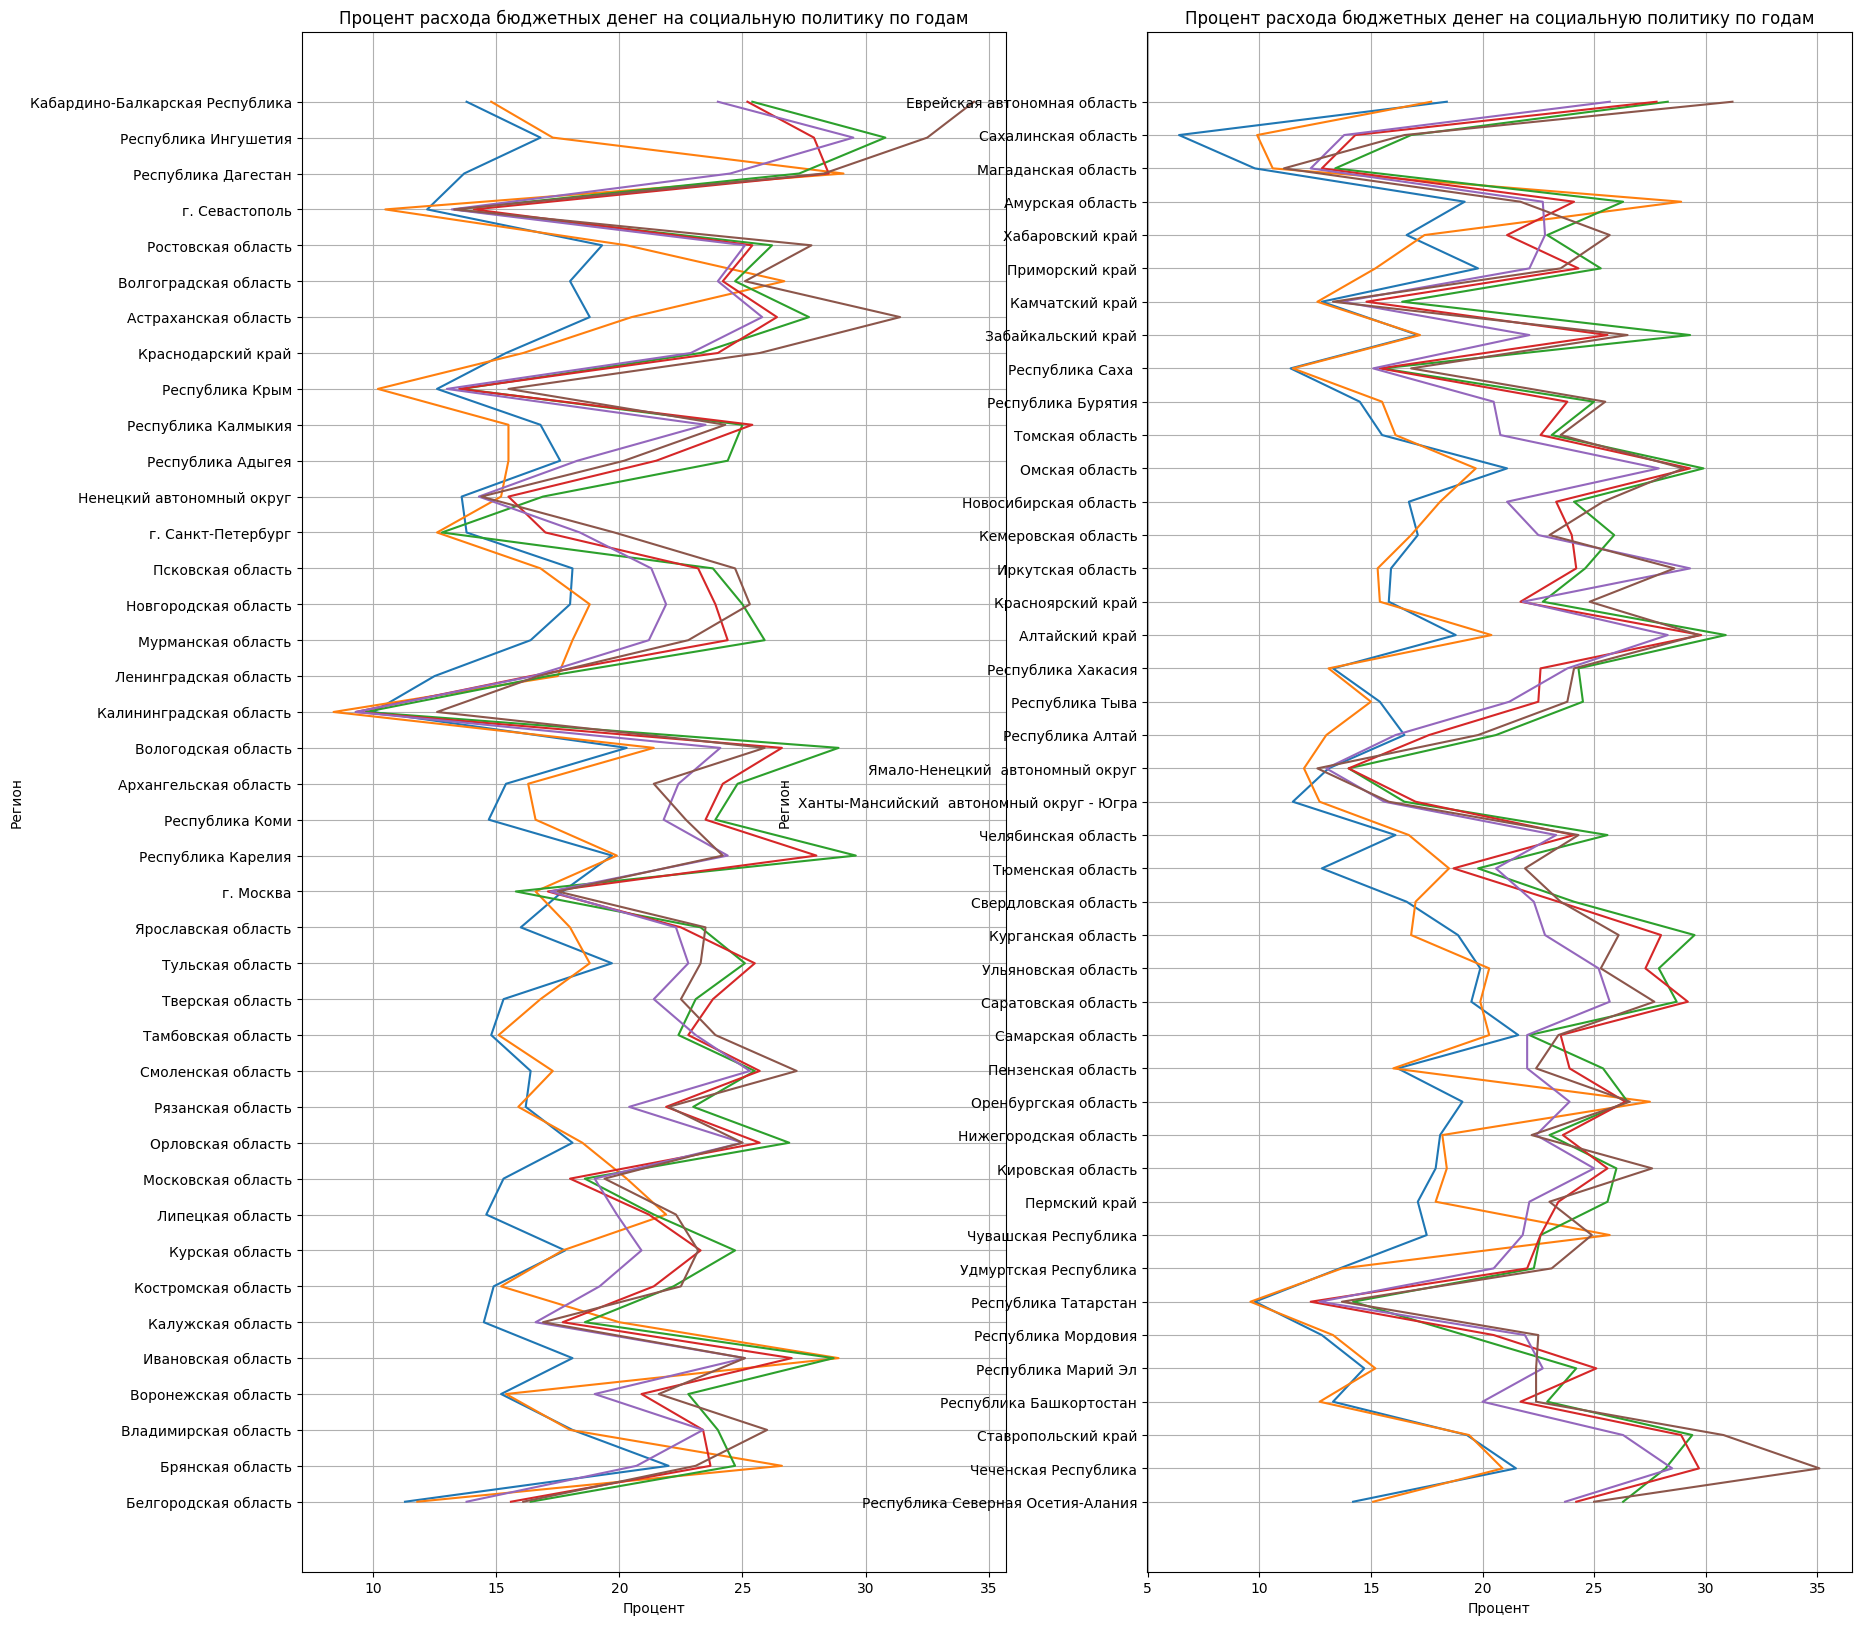

In [5]:
# Как меняется процент расхода бюджетных денег на социальную политику по годам
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].plot(welfare_expense[[2015, 2016, 2017, 2018, 2019, 2020]][0:40], welfare_expense['region'][0:40])
ax[1].plot(welfare_expense[[2015, 2016, 2017, 2018, 2019, 2020]][41:84], welfare_expense['region'][41:84])
ax[0].set(xlabel='Процент', ylabel='Регион',
       title='Процент расхода бюджетных денег на социальную политику по годам')
ax[1].set(xlabel='Процент', ylabel='Регион',
       title='Процент расхода бюджетных денег на социальную политику по годам')
ax[0].grid()
ax[1].grid()
plt.show()

Вывод: Общая тенденция по графику виден небольшой рост выделения процента бюджета на социальные политику каждый год.Но так как и сам бюджет ежегодный неизвестен я не могу сказать реальный ли это рост выделеного бюджета или только его процента 


In [6]:
# Переименовываем название колонок чтобы выделялись при обьединении с другими
welfare_expense = welfare_expense.rename(columns={2015: 'social_policy_2015', 2016: 'social_policy_2016', 2017: 'social_policy_2017'
                                                  , 2018: 'social_policy_2018', 2019: 'social_policy_2019', 2020: 'social_policy_2020'})
welfare_expense

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020
0,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1
1,Брянская область,22.0,26.6,24.7,23.7,20.7,23.1
2,Владимирская область,18.1,18.0,24.0,23.4,23.4,26.0
3,Воронежская область,15.2,15.4,22.8,20.9,19.0,21.6
4,Ивановская область,18.1,28.9,28.7,27.0,25.1,25.1
...,...,...,...,...,...,...,...
80,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7
81,Магаданская область,9.8,10.6,13.4,12.8,12.3,11.1
82,Сахалинская область,6.4,9.9,16.8,14.3,13.8,16.5
83,Еврейская автономная область,18.4,17.7,28.3,27.8,25.7,31.2


In [7]:
# Загружаем датасет оборот розничной торговли на душу населения в рублях и обрабатываем его
retail_turnover = pd.read_excel('retail_turnover_per_capita_2000_2021.xls', header=2)
retail_turnover.rename(columns = {'Unnamed: 0':'Регион', 'Unnamed: 1':'Денежная единица'}, inplace = True )
retail_turnover = retail_turnover.drop(labels=0, axis=0)
retail_turnover

,Регион,Денежная единица,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Российская Федерация,рубль,16046,21031,25913,31557,39166,49063,60901,76111,...,149401,165051,180410,188017,192541,202568,215074,229104,231283,270606
2,Центральный федеральный округ,рубль,26062,33630,40010,46760,57011,68302,81774,97965,...,188757,207394,231873,237737,243426,258278,277011,296368,301192,354141
3,Белгородская область,рубль,11820,13837,16366,19222,24168,30174,41387,55460,...,129904,144992,164079,178097,192504,203298,217059,230704,237076,259151
4,Брянская область,рубль,8267,10951,14312,17988,22849,28892,36931,48448,...,121136,138669,158501,177048,179767,192775,209987,225818,225643,257679
5,Владимирская область,рубль,7442,9403,10984,13357,16584,21140,29719,42497,...,103848,116202,129564,139408,143643,153088,164519,175251,177680,207670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Магаданская область,рубль,14806,19700,24101,29511,33831,40935,49440,59698,...,126320,153398,174694,187765,202541,213558,226312,240162,245817,289171
105,Сахалинская область,рубль,14152,21250,28378,35556,45754,59836,82315,98458,...,209149,228920,250253,272527,276476,289573,303112,327601,338787,364356
106,Еврейская автономная область,рубль,9198,13088,18310,23575,31193,39171,45012,51274,...,98243,108408,117276,133748,134162,138444,149572,165356,168066,188492
107,Чукотский автономный округ,рубль,13723,22132,32979,38253,41111,41405,45132,52030,...,113267,108218,102795,119335,154019,183781,193391,209839,217089,225671


In [8]:
# Обрабатываем столбец регионов и создаем список с лишними регионами и строками входящими в файл и удаляем лишнее типа федеральных округов 
# и общих данных по России
mask1 = np.column_stack([retail_turnover[col].astype(str).str.contains(r"федеральный округ", na=False) for col in retail_turnover])
retail_turnover = retail_turnover.loc[~mask1.any(axis=1)]
list_region = ['Эвенкийский автономный округ (Красноярский край)', 'Усть-Ордынский Бурятский округ', 'Агинский Бурятский округ (Забайкальский край)',  
               'Корякский округ, входящий в состав Камчатского края', "Российская Федерация", 
               'Коми-Пермяцкий округ, входящий в состав Пермского края','Таймырский (Долгано-Ненецкий) автономный округ (Красноярский край)',
               'Московская обл. в старых границах', 'Москва в старых границах',
               'в том числе:', 'Главное медицинское управление Управления делами Президента Российской Федерации',
               'Чеченская и Ингушская Республики', 'г. Байконур']
retail_turnover.Регион = retail_turnover.Регион.str.lstrip()
retail_turnover = retail_turnover[~retail_turnover['Регион'].isin(list_region)]
mask1 = np.column_stack([retail_turnover['Регион'].astype(str).str.contains(r"кроме", na=False) for col in retail_turnover])
retail_turnover = retail_turnover.loc[~mask1.any(axis=1)]
retail_turnover['Регион'] = retail_turnover['Регион'].str.replace(r"\(.*\)","")
retail_turnover.Регион = retail_turnover.Регион.str.strip()
# Создаем словарь для изменения имен регионов на общие принятые для последующего соединения
dict_name = {'Город Москва столица Российской Федерации город федерального значения': 'г. Москва', 
             'Город Санкт-Петербург город федерального значения': 'г. Санкт-Петербург', 
             'Город федерального значения Севастополь': 'г. Севастополь',
             'Чувашская Республика - Чувашия': 'Чувашская Республика', 'Тюменская область (без АО)': 'Тюменская область',
             'Архангельская область (без АО)': 'Архангельская область', 'Архангельская обл. без данных по Ненецкому авт. окр.': 'Архангельская область',
             'Тюменская обл.без данных по Ханты-Мансийскому и Ямало-Ненецкому авт. окр.': 'Тюменская область',
             'Тюменская область без автономных округов': 'Тюменская область', 'Архангельская область без автономного округа': 'Архангельская область',
             'Архангельская область без автономного округа': 'Архангельская область', 'Тюменская область без автономного округа': 'Тюменская область'}
retail_turnover['Регион'] = retail_turnover['Регион'].replace(dict_name, regex=True)
retail_turnover = retail_turnover.drop_duplicates(subset=['Регион'], keep='first')
retail_turnover.Регион.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\534511617.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_turnover.Регион = retail_turnover.Регион.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\534511617.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  retail_turnover['Регион'] = retail_turnover['Регион'].str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [9]:
# Удаляем лишний столбец
retail_turnover = retail_turnover.drop('Денежная единица', axis=1)
retail_turnover = retail_turnover.reset_index(drop=True)

In [10]:
# Так как до 2014 регионы Республика Крым и г.Севастополь оборот розничной торговли на душу населения неизвестен заменим значения на 0

retail_turnover = retail_turnover.fillna(0)
retail_turnover.isna().sum().sum()

0

In [11]:
ind_list = [31, 36]
display(retail_turnover.iloc[ind_list])

,Регион,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
31,Республика Крым,0,0,0,0,0,0,0,0,0,...,0,0,79010,112916,115133,120177,133940,143660,148071,176044
36,г. Севастополь,0,0,0,0,0,0,0,0,0,...,0,0,90459,94360,145575,146264,149255,154734,141383,187776


In [12]:
# Создание дух новых столбцов на основе остальных
retail_turnover['средний оборот за период 2000-2013'] = round((retail_turnover[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
                                                                                '2009', '2010', '2011', '2012', '2013']].sum(axis=1)) / 14)
retail_turnover['средний оборот за период 2014-2021'] = round((retail_turnover[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].sum(axis=1)) / 8)

retail_turnover

,Регион,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,средний оборот за период 2000-2013,средний оборот за период 2014-2021
0,Белгородская область,11820,13837,16366,19222,24168,30174,41387,55460,74599,...,164079,178097,192504,203298,217059,230704,237076,259151,60440.0,210246.0
1,Брянская область,8267,10951,14312,17988,22849,28892,36931,48448,64977,...,158501,177048,179767,192775,209987,225818,225643,257679,55684.0,203402.0
2,Владимирская область,7442,9403,10984,13357,16584,21140,29719,42497,56943,...,129564,139408,143643,153088,164519,175251,177680,207670,46024.0,161353.0
3,Воронежская область,11713,15777,18238,22189,28294,35245,39692,49708,71127,...,181499,198814,208638,221302,236953,251882,252416,296665,62435.0,231021.0
4,Ивановская область,6687,8235,10452,12413,15505,19064,26811,34985,53683,...,138185,143349,143568,153993,163290,178517,180314,211546,44820.0,164095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Амурская область,12303,14786,17229,20378,26781,32829,40948,49413,64081,...,163781,182491,191523,202038,214688,231113,245233,276635,57646.0,213438.0
81,Магаданская область,14806,19700,24101,29511,33831,40935,49440,59698,70108,...,174694,187765,202541,213558,226312,240162,245817,289171,64795.0,222502.0
82,Сахалинская область,14152,21250,28378,35556,45754,59836,82315,98458,134570,...,250253,272527,276476,289573,303112,327601,338787,364356,106524.0,302836.0
83,Еврейская автономная область,9198,13088,18310,23575,31193,39171,45012,51274,63606,...,117276,133748,134162,138444,149572,165356,168066,188492,53494.0,149390.0


Вывод: Рост оборота розничной торговли на душу населения прослеживается в таблице очень хорошо но на него могут повлиять такие факторы как инфляция и рост цен соответственно

In [13]:
# Загружаем таблицу объём отгруженных товаров собственного производства или работ/услуг, 
# выполненных собственными силами, по видам деятельности за 2017 2020 гг.
regionalproduction1 = pd.read_csv('regional_production_2017_2020.csv')
regionalproduction1

,region,production_field,2017,2018,2019,2020
0,Российская Федерация,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,1.391616e+10,1.819387e+10,1.832413e+10,1.449890e+10
1,Российская Федерация,Добыча угля,1.228407e+09,1.567151e+09,1.392654e+09,1.100662e+09
2,Российская Федерация,Добыча и обогащение угля и антрацита,1.151523e+09,1.472893e+09,1.302804e+09,1.012754e+09
3,Российская Федерация,Добыча и обогащение бурого угля (лигнита),7.688374e+07,9.425728e+07,8.984967e+07,8.790853e+07
4,Российская Федерация,Добыча нефти и природного газа,9.286030e+09,1.287361e+10,1.285934e+10,8.945390e+09
...,...,...,...,...,...,...
599,Чукотский автономный округ,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,6.531643e+07,6.750155e+07,1.468094e+07,2.313692e+07
600,Чукотский автономный округ,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,1.023386e+06,1.055402e+06,6.734268e+07,9.323680e+07
601,Чукотский автономный округ,"ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПА...",7.796269e+06,8.805295e+06,9.436014e+06,1.362003e+07
602,Чукотский автономный округ,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",2.878372e+05,4.908262e+05,6.054902e+05,6.473567e+05


In [14]:
# Предобработка та же что и с предыдущим датафреймом
mask1 = np.column_stack([regionalproduction1[col].astype(str).str.contains(r"федеральный округ", na=False) for col in regionalproduction1])
regionalproduction1 = regionalproduction1.loc[~mask1.any(axis=1)]
regionalproduction1.region = regionalproduction1.region.str.lstrip()
regionalproduction1 = regionalproduction1[~regionalproduction1['region'].isin(list_region)]
mask1 = np.column_stack([regionalproduction1['region'].astype(str).str.contains(r"кроме", na=False) for col in regionalproduction1])
regionalproduction1 = regionalproduction1.loc[~mask1.any(axis=1)]
regionalproduction1['region'] = regionalproduction1['region'].str.replace(r"\(.*\)","")
regionalproduction1.region = regionalproduction1.region.str.strip()
regionalproduction1.region =regionalproduction1.region.replace(dict_name, regex=True)

regionalproduction1.region.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2451894191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regionalproduction1.region = regionalproduction1.region.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2451894191.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  regionalproduction1['region'] = regionalproduction1['region'].str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [15]:
regionalproduction1.isna().sum()

region              0
production_field    0
2017                0
2018                0
2019                0
2020                0
dtype: int64

In [16]:
# Создание новой таблицы методом группировки и переименование названий столбцов
new_tab = regionalproduction1.groupby('region')[['2017', '2018', '2019', '2020']].sum() * 1000
new_tab = new_tab.rename(columns={'2017': 'отгруженные товары 2017', '2018': 'отгруженные товары 2018', '2019': 'отгруженные товары 2019', '2020': 'отгруженные товары 2020'})
new_tab

,отгруженные товары 2017,отгруженные товары 2018,отгруженные товары 2019,отгруженные товары 2020
region,,,,
Алтайский край,7.359764e+11,7.711927e+11,8.383179e+11,8.524434e+11
Амурская область,2.688441e+11,2.687608e+11,3.400267e+11,4.045765e+11
Архангельская область,1.296215e+12,1.347627e+12,1.264614e+12,1.190018e+12
Астраханская область,6.265697e+11,8.837665e+11,9.015147e+11,7.245978e+11
Белгородская область,1.566651e+12,1.790868e+12,1.878073e+12,1.948294e+12
...,...,...,...,...
Ямало-Ненецкий автономный округ,4.655204e+12,5.940773e+12,6.217800e+12,5.464621e+12
Ярославская область,7.845081e+11,8.930817e+11,9.039451e+11,9.590773e+11
г. Москва,1.544663e+13,1.831977e+13,1.993974e+13,1.956241e+13


In [17]:
# Загружаем таблицу  объём отгруженных товаров собственного производства или работ/услуг, 
# выполненных собственными силами, по видам деятельности за 2005–2016 гг.
regionalproduction = pd.read_csv('regional_production_2005_2016.csv')
regionalproduction

,region,production_field,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,3.062460e+09,3.720887e+09,4.488915e+09,5.271733e+09,5.090973e+09,6.217952e+09,8.020217e+09,8.950066e+09,9.213745e+09,9.690978e+09,1.125954e+10,1.173050e+10
1,Российская Федерация,Подраздел СА ДОБЫЧА ТОПЛИВНО-ЭНЕРГЕТИЧЕСКИ...,2.686256e+09,3.292691e+09,3.983633e+09,4.650669e+09,4.537654e+09,5.470740e+09,7.032308e+09,7.921745e+09,8.160342e+09,8.563862e+09,9.896535e+09,1.016955e+10
2,Российская Федерация,"Добыча каменного угля,бурого угля и торфа",2.321794e+08,2.264506e+08,2.862991e+08,4.414241e+08,3.485582e+08,5.089025e+08,6.663161e+08,6.514620e+08,6.003871e+08,6.222425e+08,7.721283e+08,9.090367e+08
3,Российская Федерация,Добыча сырой нефти и природного газа; ...,2.450541e+09,3.061557e+09,3.691794e+09,4.202276e+09,4.180328e+09,4.951480e+09,6.355953e+09,7.267043e+09,7.556542e+09,7.938532e+09,9.121647e+09,9.256097e+09
4,Российская Федерация,Добыча урановой и ториевой руд,3.535251e+06,4.683270e+06,5.540329e+06,6.968364e+06,NaN,1.035720e+07,1.003811e+07,3.240203e+06,3.413056e+06,3.087287e+06,2.759673e+06,4.420410e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Еврейская автономная область,РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,2.325707e+06,2.507757e+06,3.176365e+06,3.816631e+06,2.839598e+06,2.997626e+06,3.073327e+06,3.648146e+06,3.834596e+06,4.597060e+06,5.073697e+06,5.214477e+06
925,Еврейская автономная область,РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭ...,8.173845e+05,9.621686e+05,1.554386e+06,1.985413e+06,2.286730e+06,2.865572e+06,2.500432e+06,3.014456e+06,3.234522e+06,4.135526e+06,4.427270e+06,4.315496e+06
926,Чукотский автономный округ,РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,2.647943e+06,3.395090e+06,3.189638e+06,2.050586e+07,3.608602e+07,3.549375e+07,3.854654e+07,3.411631e+07,3.485287e+07,6.381312e+07,7.738561e+07,8.356152e+07
927,Чукотский автономный округ,РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,8.434450e+05,9.836529e+05,4.424590e+05,4.880695e+05,4.141948e+05,5.993903e+05,7.435336e+05,6.048376e+05,6.657209e+05,6.492373e+05,7.647641e+05,6.042740e+05


In [18]:
# Делаем такое же преобразование
mask1 = np.column_stack([regionalproduction[col].astype(str).str.contains(r"федеральный округ", na=False) for col in regionalproduction])
regionalproduction = regionalproduction.loc[~mask1.any(axis=1)]
regionalproduction.region = regionalproduction.region.str.lstrip()
regionalproduction = regionalproduction[~regionalproduction['region'].isin(list_region)]
mask1 = np.column_stack([regionalproduction['region'].astype(str).str.contains(r"кроме", na=False) for col in regionalproduction])
regionalproduction = regionalproduction.loc[~mask1.any(axis=1)]
regionalproduction['region'] = regionalproduction['region'].str.replace(r"\(.*\)","")
regionalproduction.region = regionalproduction.region.str.strip()
regionalproduction.region =regionalproduction.region.replace(dict_name, regex=True)
regionalproduction.region.unique()


C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2738806823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regionalproduction.region = regionalproduction.region.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2738806823.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  regionalproduction['region'] = regionalproduction['region'].str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [19]:
regionalproduction[regionalproduction.isna().any(axis=1)]

,region,production_field,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
231,Архангельская область,РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,NaN,NaN,NaN,NaN,NaN,2166659.1,2.866410e+06,2.156738e+06,2.809707e+06,7.364928e+06,NaN,2.466437e+07
232,Архангельская область,РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,NaN,NaN,NaN,NaN,NaN,97211749.8,1.010991e+08,1.178609e+08,2.637913e+08,1.497168e+08,NaN,1.456567e+08
233,Архангельская область,РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭ...,NaN,NaN,NaN,NaN,NaN,27035272.4,2.905356e+07,3.032838e+07,3.140615e+07,3.077734e+07,NaN,3.277318e+07
419,Республика Крым,РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.948940e+06,8186286.5,1.232838e+07
420,Республика Крым,РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.350462e+07,57537833.3,7.400506e+07
421,Республика Крым,РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.355549e+07,25552752.2,3.102063e+07
434,г. Севастополь,РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.596780e+04,483196.0,8.740180e+05
435,г. Севастополь,РАЗДЕЛ D ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.742685e+06,11815218.2,1.397157e+07
436,г. Севастополь,РАЗДЕЛ E ПРОИЗВОДСТВО И РАСПРЕДЕЛЕНИЕ ЭЛЕКТРОЭ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.291660e+05,5805265.9,7.158745e+06
506,Чеченская Республика,РАЗДЕЛ С ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,NaN,NaN,5462304.5,4951358.0,4152426.0,4053007.0,4.404819e+06,4.290047e+06,4.909844e+06,5.440401e+06,4867879.9,5.195827e+06


In [20]:
# Так как данных об этих регионах нет так как чечня только отстраивалась а республика Крым 
# не была в составе России потому отгруженные товары не указаны так как их не было и мы можем nan поменять на ноль
regionalproduction = regionalproduction.fillna(0)
regionalproduction.isna().sum().sum()

0

In [21]:
# Группировка и переименование названий столбцов
regionalproduction = regionalproduction.groupby('region')[['2005', '2006', '2007', '2008', '2009', '2010',
                                                           '2011', '2012', '2013', '2014', '2015', '2016']].sum() * 1000
regionalproduction = regionalproduction.rename(columns={'2005': 'отгруженные товары 2005', '2006': 'отгруженные товары 2006',
                                                        '2007': 'отгруженные товары 2007', '2008': 'отгруженные товары 2008',
                                                        '2009': 'отгруженные товары 2009', '2010': 'отгруженные товары 2010',
                                                        '2011': 'отгруженные товары 2011', '2012': 'отгруженные товары 2012',
                                                        '2013': 'отгруженные товары 2013', '2014': 'отгруженные товары 2014',
                                                        '2015': 'отгруженные товары 2015', '2016': 'отгруженные товары 2016',
                                                        '2016': 'отгруженные товары 2016'})
regionalproduction

,отгруженные товары 2005,отгруженные товары 2006,отгруженные товары 2007,отгруженные товары 2008,отгруженные товары 2009,отгруженные товары 2010,отгруженные товары 2011,отгруженные товары 2012,отгруженные товары 2013,отгруженные товары 2014,отгруженные товары 2015,отгруженные товары 2016
region,,,,,,,,,,,,
Алтайский край,9.261917e+10,1.164848e+11,1.302860e+11,1.816552e+11,1.481336e+11,2.049478e+11,2.273109e+11,2.405824e+11,2.474189e+11,2.543375e+11,3.215263e+11,3.157819e+11
Амурская область,3.181472e+10,3.586129e+10,3.875065e+10,4.679807e+10,6.086696e+10,7.210232e+10,9.669124e+10,1.024127e+11,9.924642e+10,1.093931e+11,1.386028e+11,1.259368e+11
Архангельская область,1.224747e+11,1.313904e+11,1.654895e+11,1.985618e+11,2.288951e+11,4.092363e+11,4.399531e+11,4.807384e+11,7.814344e+11,5.720944e+11,4.443298e+11,6.654786e+11
Астраханская область,4.092234e+10,4.556620e+10,5.194887e+10,8.469228e+10,6.296924e+10,7.668357e+10,9.572381e+10,1.253555e+11,1.623128e+11,1.730122e+11,2.116270e+11,2.277982e+11
Белгородская область,1.568295e+11,1.947828e+11,2.648646e+11,3.501343e+11,2.957716e+11,4.157647e+11,5.043765e+11,5.289788e+11,5.293518e+11,5.818284e+11,6.728485e+11,7.210363e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
Ямало-Ненецкий автономный округ,4.052256e+11,5.133532e+11,5.267943e+11,6.318701e+11,5.906624e+11,6.621332e+11,8.046604e+11,1.047360e+12,1.229934e+12,1.353356e+12,1.699328e+12,1.872972e+12
Ярославская область,1.110320e+11,1.226093e+11,1.580869e+11,1.760296e+11,1.533959e+11,1.912424e+11,2.237404e+11,2.515147e+11,2.719755e+11,2.845276e+11,3.443118e+11,3.515128e+11
г. Москва,1.165226e+12,1.941511e+12,2.542681e+12,2.885549e+12,2.461920e+12,2.987103e+12,3.641990e+12,3.897362e+12,4.825761e+12,5.470893e+12,6.663043e+12,7.483788e+12


In [22]:
#  распределение малоимущего населения посоциально-демографическим группам за 2020 год
poverty_socdem4 = pd.read_excel('poverty_socdem_2020.xls', header=2)
poverty_socdem4.rename(columns = {'Unnamed: 0':'Регион'}, inplace = True )
poverty_socdem4

,Регион,Все население,Дети в возрасте до 16 лет,Население старше трудоспособного возраста,Население трудоспособного возраста
0,Российская Федерация,100,39.7,5.2,55.2
1,Белгородская область,100,NaN,NaN,NaN
2,Брянская область,100,44.8,3.7,51.6
3,Владимирская область,100,NaN,NaN,NaN
4,Воронежская область,100,28.5,2.3,69.2
...,...,...,...,...,...
83,Амурская область,100,38.4,4.7,56.9
84,Магаданская область,100,NaN,NaN,NaN
85,Сахалинская область,100,NaN,NaN,NaN
86,Еврейская автономная область,100,34.8,10.8,54.4


In [23]:
#Предобработка
poverty_socdem4.Регион = poverty_socdem4.Регион.str.lstrip()
poverty_socdem4 = poverty_socdem4[~poverty_socdem4['Регион'].isin(list_region)]
mask1 = np.column_stack([poverty_socdem4['Регион'].astype(str).str.contains(r"кроме", na=False) for col in poverty_socdem4])
poverty_socdem4 = poverty_socdem4.loc[~mask1.any(axis=1)]
poverty_socdem4['Регион'] = poverty_socdem4['Регион'].str.replace(r"\(.*\)","")
poverty_socdem4.Регион = poverty_socdem4.Регион.str.strip()
poverty_socdem4['Регион'] = poverty_socdem4['Регион'].replace(dict_name, regex=True)
poverty_socdem4.Регион.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\3245210698.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  poverty_socdem4['Регион'] = poverty_socdem4['Регион'].str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [24]:
# Удаление лишнего и переименование
poverty_socdem4 = poverty_socdem4.drop('Все население', axis=1)

poverty_socdem4 = poverty_socdem4.rename(columns={'Дети в возрасте до 16 лет': 'Дети до 16 лет 2020',
                                                        'Население старше трудоспособного возраста': 'Пенсионеры 2020',
                                                        'Население трудоспособного возраста':'Трудоспособное население 2020'})
poverty_socdem4

,Регион,Дети до 16 лет 2020,Пенсионеры 2020,Трудоспособное население 2020
1,Белгородская область,NaN,NaN,NaN
2,Брянская область,44.8,3.7,51.6
3,Владимирская область,NaN,NaN,NaN
4,Воронежская область,28.5,2.3,69.2
5,Ивановская область,NaN,NaN,NaN
...,...,...,...,...
83,Амурская область,38.4,4.7,56.9
84,Магаданская область,NaN,NaN,NaN
85,Сахалинская область,NaN,NaN,NaN
86,Еврейская автономная область,34.8,10.8,54.4


In [25]:
# распределение малоимущего населения посоциально-демографическим группам за 2019 год
poverty_socdem3 = pd.read_excel('poverty_socdem_2019.xls', header=2)
poverty_socdem3.rename(columns = {'Unnamed: 0':'Регион'}, inplace = True )
poverty_socdem3

,Регион,Все население,Дети в возрасте до 16 лет,Население старше трудоспособного возраста,Население трудоспособного возраста
0,Российская Федерация,100,41.0,6.9,52.0
1,Белгородская область,100,0.0,0.0,0.0
2,Брянская область,100,37.5,5.1,57.4
3,Владимирская область,100,34.8,4.8,60.4
4,Воронежская область,100,45.2,5.4,49.4
...,...,...,...,...,...
83,Амурская область,100,33.9,7.2,58.9
84,Магаданская область,100,45.8,0.0,54.2
85,Сахалинская область,100,44.9,12.1,43.0
86,Еврейская автономная область,100,32.0,10.5,57.5


In [26]:
# Предобработка
poverty_socdem3.Регион = poverty_socdem3.Регион.str.lstrip()
poverty_socdem3 = poverty_socdem3[~poverty_socdem3['Регион'].isin(list_region)]
mask1 = np.column_stack([poverty_socdem3['Регион'].astype(str).str.contains(r"кроме", na=False) for col in poverty_socdem3])
poverty_socdem3 = poverty_socdem3.loc[~mask1.any(axis=1)]
poverty_socdem3['Регион'] = poverty_socdem3['Регион'].str.replace(r"\(.*\)","")
poverty_socdem3.Регион = poverty_socdem3.Регион.str.strip()
poverty_socdem3['Регион'] = poverty_socdem3['Регион'].replace(dict_name, regex=True)
poverty_socdem3.Регион.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1229236561.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  poverty_socdem3['Регион'] = poverty_socdem3['Регион'].str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [27]:
poverty_socdem3 = poverty_socdem3.drop('Все население', axis=1)

poverty_socdem3 = poverty_socdem3.rename(columns={'Дети в возрасте до 16 лет': 'Дети до 16 лет 2019',
                                                        'Население старше трудоспособного возраста': 'Пенсионеры 2019',
                                                        'Население трудоспособного возраста':'Трудоспособное население 2019'})
poverty_socdem3

,Регион,Дети до 16 лет 2019,Пенсионеры 2019,Трудоспособное население 2019
1,Белгородская область,0.0,0.0,0.0
2,Брянская область,37.5,5.1,57.4
3,Владимирская область,34.8,4.8,60.4
4,Воронежская область,45.2,5.4,49.4
5,Ивановская область,47.5,5.0,47.5
...,...,...,...,...
83,Амурская область,33.9,7.2,58.9
84,Магаданская область,45.8,0.0,54.2
85,Сахалинская область,44.9,12.1,43.0
86,Еврейская автономная область,32.0,10.5,57.5


In [28]:
poverty_socdem2 = pd.read_excel('poverty_socdem_2018.xls', header=2)
poverty_socdem2.rename(columns = {'Unnamed: 0':'Регион'}, inplace = True )
poverty_socdem2

,Регион,Все население,Дети в возрасте до 16 лет,Население старше трудоспособного возраста,Население трудоспособного возраста
0,Российская Федерация,100,39.9,6.5,53.7
1,Белгородская область,100,44.8,12.9,42.3
2,Брянская область,100,40.3,1.8,57.9
3,Владимирская область,100,48.9,8.3,42.8
4,Воронежская область,100,32.6,8.0,59.4
...,...,...,...,...,...
83,Амурская область,100,40.6,4.6,54.8
84,Магаданская область,100,30.7,11.5,57.8
85,Сахалинская область,100,32.9,4.3,62.8
86,Еврейская автономная область,100,33.7,7.4,58.9


In [29]:
poverty_socdem2.Регион = poverty_socdem2.Регион.str.lstrip()
poverty_socdem2 = poverty_socdem2[~poverty_socdem2['Регион'].isin(list_region)]
mask1 = np.column_stack([poverty_socdem2['Регион'].astype(str).str.contains(r"кроме", na=False) for col in poverty_socdem2])
poverty_socdem2 = poverty_socdem2.loc[~mask1.any(axis=1)]
poverty_socdem2['Регион'] = poverty_socdem2['Регион'].str.replace(r"\(.*\)","")
poverty_socdem2.Регион = poverty_socdem2.Регион.str.strip()
poverty_socdem2['Регион'] = poverty_socdem2['Регион'].replace(dict_name, regex=True)
poverty_socdem2.Регион.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1845813811.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  poverty_socdem2['Регион'] = poverty_socdem2['Регион'].str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [30]:
poverty_socdem2 = poverty_socdem2.drop('Все население', axis=1)

poverty_socdem2 = poverty_socdem2.rename(columns={'Дети в возрасте до 16 лет': 'Дети до 16 лет 2018',
                                                        'Население старше трудоспособного возраста': 'Пенсионеры 2018',
                                                        'Население трудоспособного возраста':'Трудоспособное население 2018'})
poverty_socdem2

,Регион,Дети до 16 лет 2018,Пенсионеры 2018,Трудоспособное население 2018
1,Белгородская область,44.8,12.9,42.3
2,Брянская область,40.3,1.8,57.9
3,Владимирская область,48.9,8.3,42.8
4,Воронежская область,32.6,8.0,59.4
5,Ивановская область,31.2,9.5,59.3
...,...,...,...,...
83,Амурская область,40.6,4.6,54.8
84,Магаданская область,30.7,11.5,57.8
85,Сахалинская область,32.9,4.3,62.8
86,Еврейская автономная область,33.7,7.4,58.9


In [31]:
poverty_socdem1 = pd.read_excel('poverty_socdem_2017.xls', header=2)
poverty_socdem1.rename(columns = {'Unnamed: 0':'Регион'}, inplace = True )
poverty_socdem1

,Регион,Все население,Дети в возрасте до 16 лет,Население старше трудоспособного возраста,Население трудоспособного возраста
0,Российская Федерация,100,39.3,6.6,54.1
1,Белгородская область,100,43.4,11.8,44.8
2,Брянская область,100,42.9,4.9,52.2
3,Владимирская область,100,34.8,8.6,56.6
4,Воронежская область,100,38.6,5.9,55.6
...,...,...,...,...,...
83,Амурская область,100,39.9,6.0,54.1
84,Магаданская область,100,32.2,14.8,53.0
85,Сахалинская область,100,36.4,6.4,57.1
86,Еврейская автономная область,100,36.0,9.9,54.1


In [32]:
poverty_socdem1.Регион = poverty_socdem1.Регион.str.lstrip()
poverty_socdem1 = poverty_socdem1[~poverty_socdem1['Регион'].isin(list_region)]
mask1 = np.column_stack([poverty_socdem1['Регион'].astype(str).str.contains(r"кроме", na=False) for col in poverty_socdem1])
poverty_socdem1 = poverty_socdem1.loc[~mask1.any(axis=1)]
poverty_socdem1['Регион'] = poverty_socdem1['Регион'].str.replace(r"\(.*\)","")
poverty_socdem1.Регион = poverty_socdem1.Регион.str.strip()
poverty_socdem1['Регион'] = poverty_socdem1['Регион'].replace(dict_name, regex=True)
poverty_socdem1.Регион.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1260700149.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  poverty_socdem1['Регион'] = poverty_socdem1['Регион'].str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [33]:
poverty_socdem1 = poverty_socdem1.drop('Все население', axis=1)

poverty_socdem1 = poverty_socdem1.rename(columns={'Дети в возрасте до 16 лет': 'Дети до 16 лет 2017',
                                                        'Население старше трудоспособного возраста': 'Пенсионеры 2017',
                                                        'Население трудоспособного возраста':'Трудоспособное население 2017'})
poverty_socdem1 = poverty_socdem1.drop_duplicates(subset=['Регион'], keep='last')
poverty_socdem1

,Регион,Дети до 16 лет 2017,Пенсионеры 2017,Трудоспособное население 2017
1,Белгородская область,43.4,11.8,44.8
2,Брянская область,42.9,4.9,52.2
3,Владимирская область,34.8,8.6,56.6
4,Воронежская область,38.6,5.9,55.6
5,Ивановская область,33.2,10.9,55.9
...,...,...,...,...
83,Амурская область,39.9,6.0,54.1
84,Магаданская область,32.2,14.8,53.0
85,Сахалинская область,36.4,6.4,57.1
86,Еврейская автономная область,36.0,9.9,54.1


In [34]:
# Загружаем новый датасет  процент людей, живущих за чертой бедности
pp_by_region = pd.read_csv('poverty_percent_by_regions_1992_2020.csv')

pp_by_region

,region,year,poverty_percent
0,Российская Федерация,1992,33.5
1,Российская Федерация,1993,31.3
2,Российская Федерация,1994,22.4
3,Российская Федерация,1995,24.8
4,Российская Федерация,1996,22.1
...,...,...,...
2334,Чукотский автономный округ,2017,8.5
2335,Чукотский автономный округ,2018,8.8
2336,Чукотский автономный округ,2019,8.5
2337,Чукотский автономный округ,2020,8.0


In [35]:
mask1 = np.column_stack([pp_by_region[col].astype(str).str.contains(r"федеральный округ", na=False) for col in pp_by_region])
pp_by_region = pp_by_region.loc[~mask1.any(axis=1)]
pp_by_region.Регион = pp_by_region.region.str.lstrip()
pp_by_region = pp_by_region[~pp_by_region['region'].isin(list_region)]
mask1 = np.column_stack([pp_by_region['region'].astype(str).str.contains(r"кроме", na=False) for col in pp_by_region])
pp_by_region = pp_by_region.loc[~mask1.any(axis=1)]
pp_by_region['region'] = pp_by_region['region'].str.replace(r"\(.*\)","")
pp_by_region.region = pp_by_region.region.str.strip()
pp_by_region['region'] = pp_by_region['region'].replace(dict_name, regex=True)
pp_by_region

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\995582645.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pp_by_region.Регион = pp_by_region.region.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\995582645.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  pp_by_region['region'] = pp_by_region['region'].str.replace(r"\(.*\)","")


,region,year,poverty_percent
45,Белгородская область,1995,19.9
46,Белгородская область,1996,17.6
47,Белгородская область,1997,18.9
48,Белгородская область,1998,20.1
49,Белгородская область,1999,24.2
...,...,...,...
2333,Чукотский автономный округ,2016,8.6
2334,Чукотский автономный округ,2017,8.5
2335,Чукотский автономный округ,2018,8.8
2336,Чукотский автономный округ,2019,8.5


In [36]:
# Делаем сводную таблицу
pp_by_region = pd.pivot_table(pp_by_region, values='poverty_percent', index='region', columns='year').reset_index()
pp_by_region

year,region,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Алтайский край,33.7,46.8,45.7,52.9,53.8,53.9,47.3,38.9,33.9,...,22.6,20.6,17.6,17.1,18.0,17.8,17.5,17.4,17.6,17.5
1,Амурская область,36.1,28.2,26.3,31.2,38.0,47.7,45.3,44.6,35.6,...,20.4,16.0,16.2,14.8,15.2,17.0,16.7,15.6,15.7,15.2
2,Архангельская область,26.2,26.8,23.9,31.6,42.6,33.5,27.4,26.5,23.5,...,14.4,13.2,14.6,14.8,16.5,15.2,14.3,13.5,13.6,12.8
3,Астраханская область,32.3,30.7,25.0,30.4,36.0,33.4,31.1,26.2,22.9,...,14.2,12.5,11.8,12.0,14.2,16.1,15.5,15.1,15.5,15.6
4,Белгородская область,19.9,17.6,18.9,20.1,24.2,33.6,29.1,25.4,22.9,...,8.6,6.5,7.6,7.7,8.5,8.1,7.8,7.5,7.8,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,0.0,0.0,0.0,0.0,0.0,11.1,9.3,7.7,8.0,...,7.4,6.4,6.4,6.7,7.5,7.1,6.1,5.8,5.5,4.8
81,Ярославская область,21.3,20.4,18.5,22.5,27.0,30.7,26.8,21.4,19.2,...,13.4,10.9,10.8,10.3,10.8,11.0,10.7,10.2,10.3,9.9
82,г. Москва,19.2,18.0,16.5,16.4,22.4,23.6,21.8,20.7,18.6,...,10.0,9.6,8.7,8.8,8.9,8.5,7.5,6.6,6.4,6.0
83,г. Санкт-Петербург,20.1,22.6,23.2,24.7,33.1,27.3,23.8,21.2,15.7,...,9.1,9.0,8.2,8.7,8.5,8.3,7.3,6.5,6.4,5.9


In [37]:
pp_by_region[pp_by_region.isna().any(axis=1)]

year,region,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
51,Республика Крым,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23.1,23.3,19.4,17.3,17.2,17.2
77,Чеченская Республика,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,21.7,17.8,14.2,16.0,17.3,20.7,20.5,20.7,20.4
84,г. Севастополь,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15.1,11.7,10.9,10.8,11.6,11.0


In [38]:
# Заполняем пустые значения нулями
pp_by_region = pp_by_region.fillna(0)
pp_by_region.isna().sum().sum()

0

In [39]:
# Загружаем таблицу с данными о популяции в регионах и обрабатываем
population = pd.read_excel('population.xlsx', header=1)
population.rename(columns = {'Unnamed: 0':'Регион', 'Unnamed: 1':'Код раздела'}, inplace = True )
population.Регион = population.Регион.shift(periods=1)
population = population.dropna(thresh=10)
population

,Регион,Код раздела,январь 1999 г.,январь 2000 г.,январь 2001 г.,январь 2002 г.,январь 2003 г.,январь 2004 г.,январь 2005 г.,январь 2006 г.,...,январь 2013 г.,январь 2014 г.,январь 2015 г.,январь 2016 г.,январь 2017 г.,январь 2018 г.,январь 2019 г.,январь 2020 г.,январь 2021 г.,январь 2022 г.
2,Российская Федерация,00000000000,147539426.0,146890128.0,146303611.0,145649334.0,144963650.0,144333586.0,143801046.0,143236582.0,...,143347059.0,143666931.0,146267288.0,146544710.0,146804372.0,146880432.0,146780720.0,146748590.0,146171015.0,145557576.0
4,Центральный федеральный округ,00000000000,38311159.0,38227656.0,38175094.0,38068452.0,37946810.0,37965073.0,38044068.0,38109006.0,...,38678913.0,38819874.0,38951479.0,39104319.0,39209582.0,39311413.0,39378059.0,39433556.0,39250960.0,39104400.0
6,Белгородская область,00000000000,1494868.0,1501699.0,1506976.0,1508137.0,1511899.0,1513860.0,1511662.0,1511715.0,...,1540985.0,1544108.0,1547936.0,1550137.0,1552865.0,1549876.0,1547418.0,1549151.0,1541259.0,1531917.0
8,Брянская область,00000000000,1437471.0,1423178.0,1407965.0,1391430.0,1375004.0,1360249.0,1344132.0,1327652.0,...,1253666.0,1242599.0,1232940.0,1225741.0,1220530.0,1210982.0,1200187.0,1192491.0,1182682.0,1168771.0
10,Владимирская область,00000000000,1592184.0,1575507.0,1558052.0,1539179.0,1520057.0,1509571.0,1497598.0,1486453.0,...,1421742.0,1413321.0,1405613.0,1397168.0,1389599.0,1378337.0,1365805.0,1358416.0,1342099.0,1323659.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Амурская область,00000000000,949526.0,935607.0,923055.0,911381.0,901044.0,887781.0,874018.0,861056.0,...,816910.0,811274.0,809873.0,805689.0,801752.0,798424.0,793194.0,790044.0,781846.0,772525.0
359,Магаданская область,00000000000,211696.0,201974.0,193945.0,187218.0,181832.0,178069.0,173937.0,170397.0,...,152358.0,150312.0,148071.0,146345.0,145570.0,144091.0,141234.0,140149.0,139034.0,137767.0
361,Сахалинская область,00000000000,581305.0,569234.0,560049.0,552155.0,545008.0,536783.0,529813.0,521121.0,...,493302.0,491027.0,488391.0,487293.0,487344.0,490181.0,489638.0,488257.0,485621.0,484177.0
363,Еврейская автономная область,00000000000,199172.0,195135.0,193198.0,191899.0,190585.0,188412.0,185763.0,181653.0,...,172671.0,170377.0,168368.0,166120.0,164217.0,162014.0,159913.0,158305.0,156500.0,153831.0


In [40]:
mask1 = np.column_stack([population[col].astype(str).str.contains(r"федеральный округ", na=False) for col in population])
population = population.loc[~mask1.any(axis=1)]
population.Регион = population.Регион.str.lstrip()
population = population[~population['Регион'].isin(list_region)]
mask1 = np.column_stack([population['Регион'].astype(str).str.contains(r"кроме", na=False) for col in population])
population = population.loc[~mask1.any(axis=1)]
population['Регион'] = population['Регион'].str.replace(r"\(.*\)","")
population.Регион = population.Регион.str.strip()
population['Регион'] = population['Регион'].replace(dict_name, regex=True)
mask1 = np.column_stack([population[col].astype(str).str.contains(r"сельсовет", na=False) for col in population])
population = population.loc[~mask1.any(axis=1)]
mask1 = np.column_stack([population[col].astype(str).str.contains(r"муниципальный район", na=False) for col in population])
population = population.loc[~mask1.any(axis=1)]
population

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2371909723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population.Регион = population.Регион.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2371909723.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  population['Регион'] = population['Регион'].str.replace(r"\(.*\)","")


,Регион,Код раздела,январь 1999 г.,январь 2000 г.,январь 2001 г.,январь 2002 г.,январь 2003 г.,январь 2004 г.,январь 2005 г.,январь 2006 г.,...,январь 2013 г.,январь 2014 г.,январь 2015 г.,январь 2016 г.,январь 2017 г.,январь 2018 г.,январь 2019 г.,январь 2020 г.,январь 2021 г.,январь 2022 г.
6,Белгородская область,00000000000,1494868.0,1501699.0,1506976.0,1508137.0,1511899.0,1513860.0,1511662.0,1511715.0,...,1540985.0,1544108.0,1547936.0,1550137.0,1552865.0,1549876.0,1547418.0,1549151.0,1541259.0,1531917.0
8,Брянская область,00000000000,1437471.0,1423178.0,1407965.0,1391430.0,1375004.0,1360249.0,1344132.0,1327652.0,...,1253666.0,1242599.0,1232940.0,1225741.0,1220530.0,1210982.0,1200187.0,1192491.0,1182682.0,1168771.0
10,Владимирская область,00000000000,1592184.0,1575507.0,1558052.0,1539179.0,1520057.0,1509571.0,1497598.0,1486453.0,...,1421742.0,1413321.0,1405613.0,1397168.0,1389599.0,1378337.0,1365805.0,1358416.0,1342099.0,1323659.0
12,Воронежская область,00000000000,2458558.0,2441337.0,2422371.0,2397111.0,2374461.0,2367457.0,2364932.0,2360912.0,...,2330377.0,2328959.0,2331147.0,2333477.0,2335408.0,2333768.0,2327821.0,2324205.0,2305608.0,2287678.0
14,Ивановская область,00000000000,1210603.0,1194595.0,1178969.0,1161861.0,1144540.0,1131027.0,1116739.0,1101862.0,...,1048961.0,1043130.0,1036909.0,1029838.0,1023170.0,1014646.0,1004180.0,997135.0,987032.0,976918.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Амурская область,00000000000,949526.0,935607.0,923055.0,911381.0,901044.0,887781.0,874018.0,861056.0,...,816910.0,811274.0,809873.0,805689.0,801752.0,798424.0,793194.0,790044.0,781846.0,772525.0
359,Магаданская область,00000000000,211696.0,201974.0,193945.0,187218.0,181832.0,178069.0,173937.0,170397.0,...,152358.0,150312.0,148071.0,146345.0,145570.0,144091.0,141234.0,140149.0,139034.0,137767.0
361,Сахалинская область,00000000000,581305.0,569234.0,560049.0,552155.0,545008.0,536783.0,529813.0,521121.0,...,493302.0,491027.0,488391.0,487293.0,487344.0,490181.0,489638.0,488257.0,485621.0,484177.0
363,Еврейская автономная область,00000000000,199172.0,195135.0,193198.0,191899.0,190585.0,188412.0,185763.0,181653.0,...,172671.0,170377.0,168368.0,166120.0,164217.0,162014.0,159913.0,158305.0,156500.0,153831.0


In [41]:
population = population.drop('Код раздела', axis=1)

In [42]:
population.reset_index(drop=True, inplace=True)
population

,Регион,январь 1999 г.,январь 2000 г.,январь 2001 г.,январь 2002 г.,январь 2003 г.,январь 2004 г.,январь 2005 г.,январь 2006 г.,январь 2007 г.,...,январь 2013 г.,январь 2014 г.,январь 2015 г.,январь 2016 г.,январь 2017 г.,январь 2018 г.,январь 2019 г.,январь 2020 г.,январь 2021 г.,январь 2022 г.
0,Белгородская область,1494868.0,1501699.0,1506976.0,1508137.0,1511899.0,1513860.0,1511662.0,1511715.0,1514153.0,...,1540985.0,1544108.0,1547936.0,1550137.0,1552865.0,1549876.0,1547418.0,1549151.0,1541259.0,1531917.0
1,Брянская область,1437471.0,1423178.0,1407965.0,1391430.0,1375004.0,1360249.0,1344132.0,1327652.0,1312748.0,...,1253666.0,1242599.0,1232940.0,1225741.0,1220530.0,1210982.0,1200187.0,1192491.0,1182682.0,1168771.0
2,Владимирская область,1592184.0,1575507.0,1558052.0,1539179.0,1520057.0,1509571.0,1497598.0,1486453.0,1475861.0,...,1421742.0,1413321.0,1405613.0,1397168.0,1389599.0,1378337.0,1365805.0,1358416.0,1342099.0,1323659.0
3,Воронежская область,2458558.0,2441337.0,2422371.0,2397111.0,2374461.0,2367457.0,2364932.0,2360912.0,2353805.0,...,2330377.0,2328959.0,2331147.0,2333477.0,2335408.0,2333768.0,2327821.0,2324205.0,2305608.0,2287678.0
4,Ивановская область,1210603.0,1194595.0,1178969.0,1161861.0,1144540.0,1131027.0,1116739.0,1101862.0,1089837.0,...,1048961.0,1043130.0,1036909.0,1029838.0,1023170.0,1014646.0,1004180.0,997135.0,987032.0,976918.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Амурская область,949526.0,935607.0,923055.0,911381.0,901044.0,887781.0,874018.0,861056.0,850502.0,...,816910.0,811274.0,809873.0,805689.0,801752.0,798424.0,793194.0,790044.0,781846.0,772525.0
81,Магаданская область,211696.0,201974.0,193945.0,187218.0,181832.0,178069.0,173937.0,170397.0,166902.0,...,152358.0,150312.0,148071.0,146345.0,145570.0,144091.0,141234.0,140149.0,139034.0,137767.0
82,Сахалинская область,581305.0,569234.0,560049.0,552155.0,545008.0,536783.0,529813.0,521121.0,513452.0,...,493302.0,491027.0,488391.0,487293.0,487344.0,490181.0,489638.0,488257.0,485621.0,484177.0
83,Еврейская автономная область,199172.0,195135.0,193198.0,191899.0,190585.0,188412.0,185763.0,181653.0,179405.0,...,172671.0,170377.0,168368.0,166120.0,164217.0,162014.0,159913.0,158305.0,156500.0,153831.0


In [43]:
population = population.fillna(0)
population.isna().sum().sum()

0

In [44]:
# Загружаем датасет о новорожденных и обрабатываем его
newborn = pd.read_csv('newborn_2006_2022_monthly.csv', sep=';', decimal=',')
newborn

,Region,январь 2006 г.,февраль 2006 г.,март 2006 г.,апрель 2006 г.,май 2006 г.,июнь 2006 г.,июль 2006 г.,август 2006 г.,сентябрь 2006 г.,...,сентябрь 2021 г.,октябрь 2021 г.,ноябрь 2021 г.,декабрь 2021 г.,январь 2022 г.,февраль 2022 г.,март 2022 г.,апрель 2022 г.,май 2022 г.,Unnamed: 198
0,Российская Федерация,109422.00,114068.99,129177.99,113391.99,125099.99,124238.0,125926.99,140227.99,123949.99,...,121645.99,120080.99,114976.99,117945.99,103782.0,101082.0,115512.0,99696.99,103159.0,NaN
1,Центральный федеральный округ,24998.99,25539.99,29558.99,25781.00,29137.00,28837.0,28997.99,31590.99,27755.99,...,29727.00,29532.99,29093.00,29477.00,25827.0,25678.0,28086.0,24979.99,26304.0,NaN
2,Белгородская область,1040.00,1094.00,1190.00,1044.00,1228.00,1249.0,1224.00,1389.00,1157.00,...,1084.00,1053.00,990.00,1028.00,861.0,941.0,956.0,801.00,869.0,NaN
3,Брянская область,904.00,989.00,1039.00,936.00,1072.00,961.0,1058.00,1121.00,989.00,...,784.00,751.00,783.00,729.00,707.0,670.0,740.0,589.00,660.0,NaN
4,Владимирская область,1040.00,1059.00,1236.00,1063.00,1226.00,1144.0,1221.00,1333.00,1177.00,...,783.00,834.00,769.00,821.00,691.0,700.0,708.0,660.00,711.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Еврейская автономная область,176.00,169.00,215.00,141.00,168.00,182.0,218.00,225.00,196.00,...,164.00,119.00,139.00,133.00,120.0,115.0,136.0,94.00,115.0,NaN
105,Чукотский автономный округ,44.00,77.00,60.00,53.00,57.00,59.0,86.00,58.00,64.00,...,24.00,54.00,35.00,40.00,42.0,36.0,57.0,38.00,37.0,NaN
106,Крымский федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Московская обл. в старых границах,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
mask1 = np.column_stack([newborn[col].astype(str).str.contains(r"федеральный округ", na=False) for col in newborn])
newborn = newborn.loc[~mask1.any(axis=1)]
newborn.Region = newborn.Region.str.lstrip()
newborn = newborn[~newborn.Region.isin(list_region)]
mask1 = np.column_stack([newborn.Region.astype(str).str.contains(r"кроме", na=False) for col in newborn])
newborn = newborn.loc[~mask1.any(axis=1)]
newborn.Region = newborn.Region.str.replace(r"\(.*\)","")
newborn.Region = newborn.Region.str.strip()
newborn.Region = newborn.Region.replace(dict_name, regex=True)
newborn.Region.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2057705064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newborn.Region = newborn.Region.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2057705064.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  newborn.Region = newborn.Region.str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [46]:
newborn = newborn.drop('Unnamed: 198', axis=1)
newborn = newborn.T.fillna(newborn.median(axis=1)).T


C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1371500675.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  newborn = newborn.T.fillna(newborn.median(axis=1)).T


In [47]:

newborn['Рождено детей за 2006 год'] = newborn.iloc[:, 1:13].sum(axis=1)
newborn['Рождено детей за 2007 год'] = newborn.iloc[:, 13:25].sum(axis=1)
newborn['Рождено детей за 2008 год'] = newborn.iloc[:, 25:37].sum(axis=1)
newborn['Рождено детей за 2009 год'] = newborn.iloc[:, 37:49].sum(axis=1)
newborn['Рождено детей за 2010 год'] = newborn.iloc[:, 49:61].sum(axis=1)
newborn['Рождено детей за 2011 год'] = newborn.iloc[:, 61:73].sum(axis=1)
newborn['Рождено детей за 2012 год'] = newborn.iloc[:, 73:85].sum(axis=1)
newborn['Рождено детей за 2013 год'] = newborn.iloc[:, 85:97].sum(axis=1)
newborn['Рождено детей за 2014 год'] = newborn.iloc[:, 97:109].sum(axis=1)
newborn['Рождено детей за 2015 год'] = newborn.iloc[:, 109:121].sum(axis=1)
newborn['Рождено детей за 2016 год'] = newborn.iloc[:, 121:133].sum(axis=1)
newborn['Рождено детей за 2017 год'] = newborn.iloc[:, 133:145].sum(axis=1)
newborn['Рождено детей за 2018 год'] = newborn.iloc[:, 145:157].sum(axis=1)
newborn['Рождено детей за 2019 год'] = newborn.iloc[:, 157:169].sum(axis=1)
newborn['Рождено детей за 2020 год'] = newborn.iloc[:, 169:181].sum(axis=1)
newborn['Рождено детей за 2021 год'] = newborn.iloc[:, 181:193].sum(axis=1)
newborn['Рождено детей за 2022 год'] = newborn.iloc[:, 193:198].sum(axis=1)
newborn

,Region,январь 2006 г.,февраль 2006 г.,март 2006 г.,апрель 2006 г.,май 2006 г.,июнь 2006 г.,июль 2006 г.,август 2006 г.,сентябрь 2006 г.,...,Рождено детей за 2013 год,Рождено детей за 2014 год,Рождено детей за 2015 год,Рождено детей за 2016 год,Рождено детей за 2017 год,Рождено детей за 2018 год,Рождено детей за 2019 год,Рождено детей за 2020 год,Рождено детей за 2021 год,Рождено детей за 2022 год
2,Белгородская область,1040.0,1094.0,1190.0,1044.0,1228.0,1249.0,1224.0,1389.0,1157.0,...,17883.00,17822.00,17864.00,17261.0,15113.00,14318.00,13197.99,12351.99,12223.00,4428.0
3,Брянская область,904.0,989.0,1039.0,936.0,1072.0,961.0,1058.0,1121.0,989.0,...,13855.00,13657.99,14067.00,13379.0,11552.99,11124.00,10028.00,9480.00,9047.00,3366.0
4,Владимирская область,1040.0,1059.0,1236.0,1063.0,1226.0,1144.0,1221.0,1333.0,1177.0,...,15777.00,15817.00,16284.00,15662.0,13395.00,12658.00,11158.00,10120.00,9780.00,3470.0
5,Воронежская область,1301.0,1479.0,1689.0,1513.0,1729.0,1555.0,1620.0,1897.0,1554.0,...,24980.97,25331.99,25923.98,24938.0,22423.00,21381.99,19643.00,19161.00,18593.00,6872.0
6,Ивановская область,714.0,799.0,829.0,806.0,840.0,847.0,859.0,865.0,812.0,...,11769.00,11694.97,11761.00,11184.0,9877.00,9134.00,7951.00,7563.00,7327.00,2794.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Амурская область,816.0,767.0,899.0,825.0,859.0,928.0,883.0,1014.0,841.0,...,11482.99,11158.99,10781.00,10377.0,9430.00,8889.00,7919.00,7853.00,7343.00,2816.0
102,Магаданская область,145.0,141.0,157.0,151.0,188.0,134.0,163.0,147.0,149.0,...,1903.00,1838.00,1753.00,1619.0,1591.00,1410.00,1308.00,1314.00,1195.00,455.0
103,Сахалинская область,448.0,419.0,507.0,479.0,503.0,490.0,504.0,557.0,510.0,...,6401.98,6675.00,6647.98,6948.0,6303.99,6028.98,5693.00,5591.00,5441.99,2012.0
104,Еврейская автономная область,176.0,169.0,215.0,141.0,168.0,182.0,218.0,225.0,196.0,...,2365.00,2356.00,2349.00,2213.0,1919.00,1879.00,1683.00,1605.00,1551.00,580.0


In [48]:
# Превращение датасета из месячного периода в период длинною в год
newborn = newborn.drop(newborn.iloc[:, 1:198], axis=1)
newborn

,Region,Рождено детей за 2006 год,Рождено детей за 2007 год,Рождено детей за 2008 год,Рождено детей за 2009 год,Рождено детей за 2010 год,Рождено детей за 2011 год,Рождено детей за 2012 год,Рождено детей за 2013 год,Рождено детей за 2014 год,Рождено детей за 2015 год,Рождено детей за 2016 год,Рождено детей за 2017 год,Рождено детей за 2018 год,Рождено детей за 2019 год,Рождено детей за 2020 год,Рождено детей за 2021 год,Рождено детей за 2022 год
2,Белгородская область,14269.0,15666.00,16810.00,16911.00,16669.00,16894.00,17913.00,17883.00,17822.00,17864.00,17261.0,15113.00,14318.00,13197.99,12351.99,12223.00,4428.0
3,Брянская область,12042.0,13282.99,14319.00,14406.00,13773.00,13806.00,14376.00,13855.00,13657.99,14067.00,13379.0,11552.99,11124.00,10028.00,9480.00,9047.00,3366.0
4,Владимирская область,13915.0,14679.00,15699.00,15520.00,15540.00,15644.00,16445.00,15777.00,15817.00,16284.00,15662.0,13395.00,12658.00,11158.00,10120.00,9780.00,3470.0
5,Воронежская область,19208.0,20568.99,22421.99,23560.99,23819.99,23826.97,25373.99,24980.97,25331.99,25923.98,24938.0,22423.00,21381.99,19643.00,19161.00,18593.00,6872.0
6,Ивановская область,9818.0,10617.00,11138.00,11329.98,11131.00,11035.00,11581.00,11769.00,11694.97,11761.00,11184.0,9877.00,9134.00,7951.00,7563.00,7327.00,2794.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Амурская область,10405.0,10934.99,11233.00,11383.98,11473.00,11188.00,11733.00,11482.99,11158.99,10781.00,10377.0,9430.00,8889.00,7919.00,7853.00,7343.00,2816.0
102,Магаданская область,1835.0,1810.00,1787.00,1974.00,1799.00,1801.00,1917.00,1903.00,1838.00,1753.00,1619.0,1591.00,1410.00,1308.00,1314.00,1195.00,455.0
103,Сахалинская область,5865.0,6125.97,6333.00,6224.99,6070.98,5838.98,6315.99,6401.98,6675.00,6647.98,6948.0,6303.99,6028.98,5693.00,5591.00,5441.99,2012.0
104,Еврейская автономная область,2242.0,2443.00,2582.00,2457.00,2408.00,2480.00,2445.00,2365.00,2356.00,2349.00,2213.0,1919.00,1879.00,1683.00,1605.00,1551.00,580.0


In [49]:
newborn.loc[:, newborn.columns != 'Region'] = newborn.loc[:, newborn.columns != 'Region'].astype(int)
newborn

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1505015837.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  newborn.loc[:, newborn.columns != 'Region'] = newborn.loc[:, newborn.columns != 'Region'].astype(int)


,Region,Рождено детей за 2006 год,Рождено детей за 2007 год,Рождено детей за 2008 год,Рождено детей за 2009 год,Рождено детей за 2010 год,Рождено детей за 2011 год,Рождено детей за 2012 год,Рождено детей за 2013 год,Рождено детей за 2014 год,Рождено детей за 2015 год,Рождено детей за 2016 год,Рождено детей за 2017 год,Рождено детей за 2018 год,Рождено детей за 2019 год,Рождено детей за 2020 год,Рождено детей за 2021 год,Рождено детей за 2022 год
2,Белгородская область,14269,15666,16810,16911,16669,16894,17913,17883,17822,17864,17261,15113,14318,13197,12351,12223,4428
3,Брянская область,12042,13282,14319,14406,13773,13806,14376,13855,13657,14067,13379,11552,11124,10028,9480,9047,3366
4,Владимирская область,13915,14679,15699,15520,15540,15644,16445,15777,15817,16284,15662,13395,12658,11158,10120,9780,3470
5,Воронежская область,19208,20568,22421,23560,23819,23826,25373,24980,25331,25923,24938,22423,21381,19643,19161,18593,6872
6,Ивановская область,9818,10617,11138,11329,11131,11035,11581,11769,11694,11761,11184,9877,9134,7951,7563,7327,2794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Амурская область,10405,10934,11233,11383,11473,11188,11733,11482,11158,10781,10377,9430,8889,7919,7853,7343,2816
102,Магаданская область,1835,1810,1787,1974,1799,1801,1917,1903,1838,1753,1619,1591,1410,1308,1314,1195,455
103,Сахалинская область,5865,6125,6333,6224,6070,5838,6315,6401,6675,6647,6948,6303,6028,5693,5591,5441,2012
104,Еврейская автономная область,2242,2443,2582,2457,2408,2480,2445,2365,2356,2349,2213,1919,1879,1683,1605,1551,580


In [50]:
# Загрузка и обработка датасета групп заболеваний по годам
morbidity = pd.read_excel('morbidity_2005_2020_age_disease.xls', header=2)
morbidity.rename(columns = {'Unnamed: 0':'Регион', 'Unnamed: 1':'Группа заболевания', 'Unnamed: 2':'Возраст'}, inplace = True )
morbidity

,Регион,Группа заболевания,Возраст,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,"Беременность, роды и послеродовой период",0-14 лет,21.3,17.6,17.9,22.1,18.1,18.9,16.2,17.7,12.2,12.1,8.1,15.5
1,Российская Федерация,"Беременность, роды и послеродовой период",15-17 лет,1537.3,1527.5,1605.2,1681.5,1618.9,1451.3,1247.6,1229.1,1272.3,1186.5,914.0,794.0
2,Российская Федерация,"Беременность, роды и послеродовой период",18 лет и старше,6731.7,6833.5,7229.7,7516.9,8007.5,8084.4,7981.6,8141.8,8084.6,8219.9,7734.1,7278.6
3,Российская Федерация,"Беременность, роды и послеродовой период",Всего,5719.4,5861.2,6258.7,6556.6,7011.6,7085.3,6979.7,7121.5,7067.6,7145.3,6700.2,6291.1
4,Российская Федерация,Болезни глаза и его придаточного аппарата,0-14 лет,5643.4,5581.1,5760.8,5775.9,5743.6,5884.8,5931.9,6206.9,6104.5,5919.4,5910.3,5971.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,Крымский федеральный округ,Психические расстройства и расстройства поведения,Всего,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,421.9,NaN,NaN
8155,Крымский федеральный округ,"Травмы, отравления и другие последствия воздей...",0-14 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5100.4,NaN,NaN
8156,Крымский федеральный округ,"Травмы, отравления и другие последствия воздей...",15-17 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10408.1,NaN,NaN
8157,Крымский федеральный округ,"Травмы, отравления и другие последствия воздей...",18 лет и старше,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3904.8,NaN,NaN


In [51]:
mask1 = np.column_stack([morbidity[col].astype(str).str.contains(r"федеральный округ", na=False) for col in morbidity])
morbidity = morbidity.loc[~mask1.any(axis=1)]
morbidity.Регион = morbidity.Регион.str.lstrip()
morbidity = morbidity[~morbidity['Регион'].isin(list_region)]
mask1 = np.column_stack([morbidity['Регион'].astype(str).str.contains(r"кроме", na=False) for col in morbidity])
morbidity = morbidity.loc[~mask1.any(axis=1)]
morbidity['Регион'] = morbidity['Регион'].str.replace(r"\(.*\)","")
morbidity.Регион = morbidity.Регион.str.strip()
morbidity['Регион'] = morbidity['Регион'].replace(dict_name, regex=True)
morbidity

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2981971146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morbidity.Регион = morbidity.Регион.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2981971146.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  morbidity['Регион'] = morbidity['Регион'].str.replace(r"\(.*\)","")


,Регион,Группа заболевания,Возраст,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
146,Белгородская область,"Беременность, роды и послеродовой период",0-14 лет,21.7,10.3,10.9,2.9,26.9,12.2,46.5,69.5,0.0,3.0,5.9,0.0
147,Белгородская область,"Беременность, роды и послеродовой период",15-17 лет,1181.7,2287.8,2258.2,1704.4,2520.6,1539.2,1362.8,1437.8,980.4,1261.7,1221.4,875.6
148,Белгородская область,"Беременность, роды и послеродовой период",18 лет и старше,5249.8,5976.9,4796.6,4985.9,5791.3,5287.8,5197.0,5469.2,5373.0,5928.4,5551.7,5567.6
149,Белгородская область,"Беременность, роды и послеродовой период",Всего,4452.8,5196.3,4236.4,4392.9,5165.4,4684.9,4585.2,4839.8,4730.8,5215.7,4879.2,4868.6
150,Белгородская область,Болезни глаза и его придаточного аппарата,0-14 лет,5747.6,5576.1,5538.1,5050.5,5117.5,5325.5,4968.6,5347.5,5655.3,5362.9,5841.5,6187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,Чукотский автономный округ,Психические расстройства и расстройства поведения,Всего,1629.9,1168.2,980.7,950.1,935.7,1201.9,1237.4,1292.5,1102.8,1189.2,1328.7,957.0
8087,Чукотский автономный округ,"Травмы, отравления и другие последствия воздей...",0-14 лет,12487.7,11893.8,11505.0,12308.3,10556.9,11189.2,11860.7,11239.5,11842.0,11765.8,14204.7,11195.8
8088,Чукотский автономный округ,"Травмы, отравления и другие последствия воздей...",15-17 лет,14018.9,13567.9,14154.4,16488.5,16274.0,17225.6,20253.2,19802.0,18715.2,26708.4,19175.2,19206.3
8089,Чукотский автономный округ,"Травмы, отравления и другие последствия воздей...",18 лет и старше,13801.1,14611.8,13770.2,14225.0,10840.7,13137.1,12262.7,11461.9,11359.9,10884.0,11213.1,10913.6


In [52]:
morbidity = morbidity[morbidity.Возраст != 'Всего']

In [53]:
morbidity.Регион = morbidity.Регион.replace('Кемеровская область', 'Кемеровская область - Кузбасс')
morbidity.Регион = morbidity.Регион.replace('Республика Северная Осетия - Алания', 'Республика Северная Осетия-Алания')

morbidity.Регион.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\394526312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morbidity.Регион = morbidity.Регион.replace('Кемеровская область', 'Кемеровская область - Кузбасс')
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\394526312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morbidity.Регион = morbidity.Регион.replace('Республика Северная Осетия - Алания', 'Республика Северная Осетия-Алания')


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'Республика Крым',
       'г. Севастополь', 'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [54]:
morbidity = morbidity.groupby(['Регион', 'Группа заболевания'])[['2005', '2006', '2007', '2008', '2009', '2010',
                                                           '2011', '2012', '2013', '2014', '2015', '2016']].sum() 
morbidity

2005  \
Регион         Группа заболевания                                            
Алтайский край Беременность, роды и послеродовой период            14750.7   
               Болезни глаза и его придаточного аппарата           18217.5   
               Болезни костно-мышечной системы и соединительно...  17204.0   
               Болезни мочеполовой системы                         24691.8   
               Болезни нервной системы                             10018.4   
...                                                                    ...   
г. Севастополь Новообразования                                         0.0   
               Отдельные состояния, возникающие в перинатально...      0.0   
               Прочие болезни                                          0.0   
               Психические расстройства и расстройства поведения       0.0   
               Травмы, отравления и другие последствия воздейс...      0.0   

                                                                      2006  \
Регион         Группа заболевания                                            
Алтайский край Беременность, роды и послеродовой период            14700.0   
               Болезни глаза и его придаточного аппарата           18646.3   
               Болезни костно-мышечной системы и соединительно...  17254.2   
               Болезни мочеполовой системы                         24472.6   
               Болезни нервной системы                              9836.0   
...                                                                    ...   
г. Севастополь Новообразования                                         0.0   
               Отдельные состояния, возникающие в перинатально...      0.0   
               Прочие болезни                                          0.0   
               Психические расстройства и расстройства поведения       0.0   
               Травмы, отравления и другие последствия воздейс...      0.0   

                                                                      2007  \
Регион         Группа заболевания                                            
Алтайский край Беременность, роды и послеродовой период            17162.7   
               Болезни глаза и его придаточного аппарата           18038.5   
               Болезни костно-мышечной системы и соединительно...  16500.5   
               Болезни мочеполовой системы                         25268.4   
               Болезни нервной системы                              8768.3   
...                                                                    ...   
г. Севастополь Новообразования                                         0.0   
               Отдельные состояния, возникающие в перинатально...      0.0   
               Прочие болезни                                          0.0   
               Психические расстройства и расстройства поведения       0.0   
               Травмы, отравления и другие последствия воздейс...      0.0   

                                                                      2008  \
Регион         Группа заболевания                                            
Алтайский край Беременность, роды и послеродовой период            18779.2   
               Болезни глаза и его придаточного аппарата           17425.7   
               Болезни костно-мышечной системы и соединительно...  16944.8   
               Болезни мочеполовой системы                         27174.1   
               Болезни нервной системы                              9661.3   
...                                                                    ...   
г. Севастополь Новообразования                                         0.0   
               Отдельные состояния, возникающие в перинатально...      0.0   
               Прочие болезни                                          0.0   
               Психические расстройства и расстройства поведения       0.0   
               Травмы, отравления и другие последствия воздейс...      0.0   

          

In [55]:
morbidity.isna().sum()

2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
dtype: int64

In [56]:
# Загрузка и обработка датасета  валовой региональный продукт на душу населения, в рублях
gross_regional_product = pd.read_excel('gross_regional_product_1996_2020.xls', header=2)
gross_regional_product.rename(columns = {'Unnamed: 0':'Регион'}, inplace = True )
gross_regional_product

,Регион,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Российская Федерация,12225.0,13938.4,15371.1,26200.6,39532.3,49474.8,60611.4,74840.5,97691.9,...,317515.3,348641.5,377006.0,405147.7,449097.9,505337.7,543065.9,614333.2,646144.1,640519.0
1,Центральный федеральный округ,NaN,NaN,16564.4,31118.7,48205.0,58851.5,75739.2,94244.6,121487.7,...,417288.1,451517.2,494482.7,536607.9,580706.6,663881.8,711031.6,792780.9,835858.8,854978.5
2,Белгородская область,9575.6,10792.2,12242.8,21398.0,27969.5,33126.7,41327.4,50271.4,75629.4,...,331010.0,354570.6,368874.8,400820.8,447619.7,501467.8,539720.5,588641.5,617426.5,646569.0
3,Брянская область,7275.3,7175.7,7659.1,11752.4,17413.5,21511.9,27020.0,31953.4,37719.1,...,137187.1,164726.6,175865.0,196096.7,221080.0,258752.7,280630.1,304547.1,332442.8,347204.5
4,Владимирская область,7620.7,8431.3,9350.2,15457.1,21073.3,27170.0,32923.6,40809.4,49353.4,...,181842.6,200456.4,216320.8,232757.6,262945.5,309713.7,325043.1,349856.4,394560.3,410443.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Магаданская область,26438.6,30770.0,32315.5,50936.4,65704.6,89987.5,121272.5,135180.6,139840.3,...,464112.9,511125.4,587477.4,649745.4,854561.5,1054274.8,1117517.3,1236274.4,1518066.7,2035007.0
97,Сахалинская область,15476.9,19625.3,21428.2,45662.9,61595.8,84769.1,85927.4,116731.0,172004.4,...,1210003.9,1298440.0,1364874.7,1631919.0,1716734.4,1564707.9,1605079.4,2517125.0,2400858.1,2059206.5
98,Еврейская автономная область,7177.0,8355.6,7535.3,15344.9,19484.8,24877.5,35766.0,45196.1,60029.9,...,225065.5,246301.3,224042.7,247666.9,266405.8,294021.2,338826.6,339068.1,355545.7,400340.5
99,Чукотский автономный округ,30606.1,33540.9,37859.4,49746.0,65963.0,123130.9,187368.1,256992.1,238227.2,...,883368.7,896822.1,877612.8,1142504.1,1226152.0,1443771.7,1469675.0,1685134.1,1898634.8,2404271.2


In [57]:
mask1 = np.column_stack([gross_regional_product[col].astype(str).str.contains(r"федеральный округ", na=False) for col in gross_regional_product])
gross_regional_product = gross_regional_product.loc[~mask1.any(axis=1)]
gross_regional_product.Регион = gross_regional_product.Регион.str.lstrip()
gross_regional_product = gross_regional_product[~gross_regional_product['Регион'].isin(list_region)]
mask1 = np.column_stack([gross_regional_product['Регион'].astype(str).str.contains(r"кроме", na=False) for col in gross_regional_product])
gross_regional_product= gross_regional_product.loc[~mask1.any(axis=1)]
gross_regional_product['Регион'] = gross_regional_product['Регион'].str.replace(r"\(.*\)","")
gross_regional_product.Регион = gross_regional_product.Регион.str.strip()
gross_regional_product['Регион'] = gross_regional_product['Регион'].replace(dict_name, regex=True)
gross_regional_product

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\3969356718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_regional_product.Регион = gross_regional_product.Регион.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\3969356718.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  gross_regional_product['Регион'] = gross_regional_product['Регион'].str.replace(r"\(.*\)","")


,Регион,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Белгородская область,9575.6,10792.2,12242.8,21398.0,27969.5,33126.7,41327.4,50271.4,75629.4,...,331010.0,354570.6,368874.8,400820.8,447619.7,501467.8,539720.5,588641.5,617426.5,646569.0
3,Брянская область,7275.3,7175.7,7659.1,11752.4,17413.5,21511.9,27020.0,31953.4,37719.1,...,137187.1,164726.6,175865.0,196096.7,221080.0,258752.7,280630.1,304547.1,332442.8,347204.5
4,Владимирская область,7620.7,8431.3,9350.2,15457.1,21073.3,27170.0,32923.6,40809.4,49353.4,...,181842.6,200456.4,216320.8,232757.6,262945.5,309713.7,325043.1,349856.4,394560.3,410443.6
5,Воронежская область,7651.9,8686.6,9082.1,14808.3,20365.1,24905.4,34789.6,42237.5,49530.0,...,203575.5,241947.4,262578.3,308004.7,345566.8,354657.9,374125.7,408140.7,431037.0,459629.5
6,Ивановская область,6725.4,6379.3,6804.5,9765.2,14240.0,18947.2,23396.9,29192.4,35732.7,...,121945.5,129448.3,151263.6,146032.6,174687.5,200504.4,208522.0,230325.5,249591.6,273821.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Амурская область,13155.7,15818.0,15103.7,21935.4,28317.2,42578.3,50449.6,59480.3,72937.0,...,273175.8,280023.9,258817.0,286282.6,343385.7,370192.4,373935.1,419905.2,521060.1,571362.1
96,Магаданская область,26438.6,30770.0,32315.5,50936.4,65704.6,89987.5,121272.5,135180.6,139840.3,...,464112.9,511125.4,587477.4,649745.4,854561.5,1054274.8,1117517.3,1236274.4,1518066.7,2035007.0
97,Сахалинская область,15476.9,19625.3,21428.2,45662.9,61595.8,84769.1,85927.4,116731.0,172004.4,...,1210003.9,1298440.0,1364874.7,1631919.0,1716734.4,1564707.9,1605079.4,2517125.0,2400858.1,2059206.5
98,Еврейская автономная область,7177.0,8355.6,7535.3,15344.9,19484.8,24877.5,35766.0,45196.1,60029.9,...,225065.5,246301.3,224042.7,247666.9,266405.8,294021.2,338826.6,339068.1,355545.7,400340.5


In [58]:
gross_regional_product[gross_regional_product.isna().any(axis=1)]
gross_regional_product = gross_regional_product.fillna(0)
print(gross_regional_product.isna().sum().sum())


0


In [59]:
gross_regional_product = gross_regional_product.rename(columns={'1996': 'Валовый продукт на душу 1996', '1997': 'Валовый продукт на душу 1997',
                                                                '1998': 'Валовый продукт на душу 1998', '1999': 'Валовый продукт на душу 1999'
                                                                , '2000': 'Валовый продукт на душу 2000', '2001': 'Валовый продукт на душу 2001'
                                                                , '2002': 'Валовый продукт на душу 2002', '2003': 'Валовый продукт на душу 2003'
                                                                , '2004': 'Валовый продукт на душу 2004', '2005': 'Валовый продукт на душу 2005'
                                                                , '2006': 'Валовый продукт на душу 2006', '2007': 'Валовый продукт на душу 2007'
                                                                , '2008': 'Валовый продукт на душу 2008', '2009': 'Валовый продукт на душу 2009'
                                                                , '2010': 'Валовый продукт на душу 2010', '2011': 'Валовый продукт на душу 2011'
                                                                , '2012': 'Валовый продукт на душу 2012', '2013': 'Валовый продукт на душу 2013'
                                                                , '2014': 'Валовый продукт на душу 2014', '2015': 'Валовый продукт на душу 2015'
                                                                , '2016': 'Валовый продукт на душу 2016', '2017': 'Валовый продукт на душу 2017'
                                                                , '2018': 'Валовый продукт на душу 2018', '2019': 'Валовый продукт на душу 2019'
                                                                , '2020': 'Валовый продукт на душу 2020'})
gross_regional_product


,Регион,Валовый продукт на душу 1996,Валовый продукт на душу 1997,Валовый продукт на душу 1998,Валовый продукт на душу 1999,Валовый продукт на душу 2000,Валовый продукт на душу 2001,Валовый продукт на душу 2002,Валовый продукт на душу 2003,Валовый продукт на душу 2004,...,Валовый продукт на душу 2011,Валовый продукт на душу 2012,Валовый продукт на душу 2013,Валовый продукт на душу 2014,Валовый продукт на душу 2015,Валовый продукт на душу 2016,Валовый продукт на душу 2017,Валовый продукт на душу 2018,Валовый продукт на душу 2019,Валовый продукт на душу 2020
2,Белгородская область,9575.6,10792.2,12242.8,21398.0,27969.5,33126.7,41327.4,50271.4,75629.4,...,331010.0,354570.6,368874.8,400820.8,447619.7,501467.8,539720.5,588641.5,617426.5,646569.0
3,Брянская область,7275.3,7175.7,7659.1,11752.4,17413.5,21511.9,27020.0,31953.4,37719.1,...,137187.1,164726.6,175865.0,196096.7,221080.0,258752.7,280630.1,304547.1,332442.8,347204.5
4,Владимирская область,7620.7,8431.3,9350.2,15457.1,21073.3,27170.0,32923.6,40809.4,49353.4,...,181842.6,200456.4,216320.8,232757.6,262945.5,309713.7,325043.1,349856.4,394560.3,410443.6
5,Воронежская область,7651.9,8686.6,9082.1,14808.3,20365.1,24905.4,34789.6,42237.5,49530.0,...,203575.5,241947.4,262578.3,308004.7,345566.8,354657.9,374125.7,408140.7,431037.0,459629.5
6,Ивановская область,6725.4,6379.3,6804.5,9765.2,14240.0,18947.2,23396.9,29192.4,35732.7,...,121945.5,129448.3,151263.6,146032.6,174687.5,200504.4,208522.0,230325.5,249591.6,273821.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Амурская область,13155.7,15818.0,15103.7,21935.4,28317.2,42578.3,50449.6,59480.3,72937.0,...,273175.8,280023.9,258817.0,286282.6,343385.7,370192.4,373935.1,419905.2,521060.1,571362.1
96,Магаданская область,26438.6,30770.0,32315.5,50936.4,65704.6,89987.5,121272.5,135180.6,139840.3,...,464112.9,511125.4,587477.4,649745.4,854561.5,1054274.8,1117517.3,1236274.4,1518066.7,2035007.0
97,Сахалинская область,15476.9,19625.3,21428.2,45662.9,61595.8,84769.1,85927.4,116731.0,172004.4,...,1210003.9,1298440.0,1364874.7,1631919.0,1716734.4,1564707.9,1605079.4,2517125.0,2400858.1,2059206.5
98,Еврейская автономная область,7177.0,8355.6,7535.3,15344.9,19484.8,24877.5,35766.0,45196.1,60029.9,...,225065.5,246301.3,224042.7,247666.9,266405.8,294021.2,338826.6,339068.1,355545.7,400340.5


In [60]:
# Загрузка и обработка датасета с номинальной зарплатой по регионам по годам
real_income = pd.read_excel('cash_real_income_wages_2015_2020.xlsx', sheet_name=2)
real_income

,region,2015,2016,2017,2018,2019,2020
0,Российская Федерация,34030.0,36709.0,39167.0,43724.0,47867.0,51344.0
1,Центральный\n федеральный округ,41961.0,45943.0,48593.0,54689.0,60771.0,65319.0
2,Белгородская область,25456.0,27091.0,29066.0,31852.0,34615.0,37442.0
3,Брянская область,21679.0,22923.0,24743.0,27251.0,29853.0,31946.0
4,Владимирская область,23877.0,25135.0,26975.0,30460.0,33076.0,35240.0
...,...,...,...,...,...,...,...
93,Амурская область,32902.0,33837.0,37368.0,42315.0,47234.0,52430.0
94,Магаданская область,65996.0,69769.0,75710.0,85631.0,94856.0,102843.0
95,Сахалинская область,61311.0,64959.0,68496.0,77499.0,87418.0,92518.0
96,Еврейская автономная область,30896.0,32165.0,34409.0,39242.0,42400.0,46237.0


In [61]:
real_income['region'] = real_income.region.str.replace('\n', ' ')
mask1 = np.column_stack([real_income[col].astype(str).str.contains(r"федеральный округ", na=False) for col in real_income])
real_income = real_income.loc[~mask1.any(axis=1)]
real_income.region = real_income.region.str.lstrip()
real_income = real_income[~real_income.region.isin(list_region)]
mask1 = np.column_stack([real_income.region.astype(str).str.contains(r"кроме", na=False) for col in real_income])
real_income = real_income.loc[~mask1.any(axis=1)]
real_income.region = real_income.region.str.replace(r"\(.*\)","")
real_income.region = real_income.region.str.strip()
real_income.region = real_income.region.replace(dict_name, regex=True)
real_income.region.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1895701651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_income.region = real_income.region.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1895701651.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  real_income.region = real_income.region.str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [62]:
real_income = real_income.rename(columns={2015: 'Номинальная зарплата 2015', 2016: 'Номинальная зарплата 2016', 2017: 'Номинальная зарплата 2017'
                                  , 2018: 'Номинальная зарплата 2018', 2019: 'Номинальная зарплата 2019', 2020: 'Номинальная зарплата 2020'})
real_income = real_income.drop_duplicates(subset=['region'], keep='last')
real_income

,region,Номинальная зарплата 2015,Номинальная зарплата 2016,Номинальная зарплата 2017,Номинальная зарплата 2018,Номинальная зарплата 2019,Номинальная зарплата 2020
2,Белгородская область,25456.0,27091.0,29066.0,31852.0,34615.0,37442.0
3,Брянская область,21679.0,22923.0,24743.0,27251.0,29853.0,31946.0
4,Владимирская область,23877.0,25135.0,26975.0,30460.0,33076.0,35240.0
5,Воронежская область,24906.0,26335.0,28007.0,31207.0,33690.0,36317.0
6,Ивановская область,21161.0,22144.0,23470.0,25729.0,27553.0,29083.0
...,...,...,...,...,...,...,...
93,Амурская область,32902.0,33837.0,37368.0,42315.0,47234.0,52430.0
94,Магаданская область,65996.0,69769.0,75710.0,85631.0,94856.0,102843.0
95,Сахалинская область,61311.0,64959.0,68496.0,77499.0,87418.0,92518.0
96,Еврейская автономная область,30896.0,32165.0,34409.0,39242.0,42400.0,46237.0


In [63]:
real_income.isna().sum()

region                       0
Номинальная зарплата 2015    0
Номинальная зарплата 2016    0
Номинальная зарплата 2017    0
Номинальная зарплата 2018    0
Номинальная зарплата 2019    0
Номинальная зарплата 2020    0
dtype: int64

In [64]:
# Загрузка и обработка датасета со средней на душу населения зарплатой по регионам по годам
cash_income = pd.read_excel('cash_real_income_wages_2015_2020.xlsx')
cash_income

,region,2015,2016,2017,2018,2019,2020
0,Российская Федерация,302541.0,30865.0,31897.0,33266.0,35338.0,36073.0
1,Центральный\n федеральный округ,38832.0,40200.0,41897.0,44009.0,47252.0,48226.0
2,Белгородская область,28043.0,29799.0,30342.0,30778.0,32352.0,32841.0
3,Брянская область,23428.0,24006.0,25107.0,26585.0,28371.0,28596.0
4,Владимирская область,22712.0,22365.0,23554.0,23539.0,25358.0,25922.0
...,...,...,...,...,...,...,...
93,Амурская область,28240.0,27976.0,29213.0,30937.0,33304.0,35499.0
94,Магаданская область,50750.0,51367.0,54849.0,59774.0,65357.0,70864.0
95,Сахалинская область,47872.0,49468.0,50502.0,53783.0,59015.0,60770.0
96,Еврейская автономная область,23759.0,23069.0,23679.0,24696.0,26602.0,28048.0


In [65]:
cash_income['region'] = cash_income.region.str.replace('\n', ' ')
mask1 = np.column_stack([cash_income[col].astype(str).str.contains(r"федеральный округ", na=False) for col in cash_income])
cash_income = cash_income.loc[~mask1.any(axis=1)]
cash_income.region = cash_income.region.str.lstrip()
cash_income = cash_income[~cash_income.region.isin(list_region)]
mask1 = np.column_stack([cash_income.region.astype(str).str.contains(r"кроме", na=False) for col in cash_income])
cash_income = cash_income.loc[~mask1.any(axis=1)]
cash_income.region = cash_income.region.str.replace(r"\(.*\)","")
cash_income.region = cash_income.region.str.strip()
cash_income.region = cash_income.region.replace(dict_name, regex=True)
cash_income = cash_income.drop_duplicates(subset=['region'], keep='last')
cash_income.region.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\3698967408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_income.region = cash_income.region.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\3698967408.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  cash_income.region = cash_income.region.str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми',
       'Ненецкий автономный округ', 'Архангельская область',
       'Вологодская область', 'Калининградская область',
       'Ленинградская область', 'Мурманская область',
       'Новгородская область', 'Псковская область', 'г. Санкт-Петербург',
       'Республика Адыгея', 'Республика Калмыкия', 'Республика Крым',
       'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Респуб

In [66]:
cash_income = cash_income.rename(columns={2015: 'Среднедушевая зарплата 2015', 2016: 'Среднедушевая зарплата 2016', 2017: 'Среднедушевая зарплата 2017'
                                  , 2018: 'Среднедушевая зарплата 2018', 2019: 'Среднедушевая зарплата 2019', 2020: 'Среднедушевая зарплата 2020'})
cash_income

,region,Среднедушевая зарплата 2015,Среднедушевая зарплата 2016,Среднедушевая зарплата 2017,Среднедушевая зарплата 2018,Среднедушевая зарплата 2019,Среднедушевая зарплата 2020
2,Белгородская область,28043.0,29799.0,30342.0,30778.0,32352.0,32841.0
3,Брянская область,23428.0,24006.0,25107.0,26585.0,28371.0,28596.0
4,Владимирская область,22712.0,22365.0,23554.0,23539.0,25358.0,25922.0
5,Воронежская область,29366.0,29284.0,29498.0,30289.0,32022.0,32078.0
6,Ивановская область,22297.0,23676.0,24860.0,24503.0,25794.0,26277.0
...,...,...,...,...,...,...,...
93,Амурская область,28240.0,27976.0,29213.0,30937.0,33304.0,35499.0
94,Магаданская область,50750.0,51367.0,54849.0,59774.0,65357.0,70864.0
95,Сахалинская область,47872.0,49468.0,50502.0,53783.0,59015.0,60770.0
96,Еврейская автономная область,23759.0,23069.0,23679.0,24696.0,26602.0,28048.0


In [67]:
cash_income.isna().sum()

region                         0
Среднедушевая зарплата 2015    0
Среднедушевая зарплата 2016    0
Среднедушевая зарплата 2017    0
Среднедушевая зарплата 2018    0
Среднедушевая зарплата 2019    0
Среднедушевая зарплата 2020    0
dtype: int64

In [68]:
# Загружаем два датасета о наркотиках обрабатываем и обьединяем
drug1 = pd.read_excel('drug_alco.xlsx', sheet_name=2)
drug1

,region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,17.2,19.1,19.1,18.7,17.8,17.6,15.4,13.9,12.6,14.5,14.1,11.1
1,Центральный федеральный округ,9.5,11.8,11.8,13.1,13.9,14.9,12.3,12.9,13.9,16.9,14.9,10.7
2,Белгородская область,4.5,9.5,9.5,4.2,3.9,4.8,4.0,2.3,2.4,1.9,2.0,1.6
3,Брянская область,14.3,11.5,11.5,14.4,15.4,18.3,20.3,15.4,12.8,14.8,6.7,13.2
4,Владимирская область,6.4,5.7,5.7,6.8,8.3,7.8,7.4,9.8,11.5,15.5,21.3,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Амурская область,21.3,27.2,27.2,28.4,26.2,37.1,33.9,24.2,22.5,22.2,19.1,18.9
88,Магаданская область,21.9,34.7,34.7,29.2,20.4,19.8,20.4,19.4,18.4,6.8,9.5,11.6
89,Сахалинская область,36.5,34.8,34.8,36.8,34.9,39.5,34.8,27.7,11.8,26.0,24.6,15.4
90,Еврейская автономная область,28.2,15.0,15.0,28.0,16.7,25.4,27.8,29.8,27.2,25.5,37.4,66.8


In [69]:
drug1['region'] = drug1.region.str.replace('\n', ' ')
mask1 = np.column_stack([drug1[col].astype(str).str.contains(r"федеральный округ", na=False) for col in drug1])
drug1 = drug1.loc[~mask1.any(axis=1)]
drug1.region = drug1.region.str.lstrip()
drug1 = drug1[~drug1.region.isin(list_region)]
mask1 = np.column_stack([drug1.region.astype(str).str.contains(r"кроме", na=False) for col in drug1])
drug1 = drug1.loc[~mask1.any(axis=1)]
drug1.region = drug1.region.str.replace(r"\(.*\)","")
drug1.region = drug1.region.str.strip()
drug1.region = drug1.region.replace(dict_name, regex=True)
drug1.region.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\3421312413.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug1.region = drug1.region.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\3421312413.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  drug1.region = drug1.region.str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',
       'Карачаево-Черкесская Республи

In [70]:
drug1[drug1.isna().any(axis=1)]

,region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
23,Архангельская область,1.5,1.4,1.4,2.6,3.4,4.6,6.4,4.0,4.0,NaN,NaN,NaN
33,Республика Адыгея,45.8,50.2,50.2,37.3,16.9,14.0,15.2,12.4,5.9,NaN,NaN,NaN
34,Республика Калмыкия,19.7,29.2,29.2,10.9,6.0,5.3,3.8,4.5,0.4,NaN,NaN,NaN
35,Краснодарский край,39.9,43.3,43.3,27.8,15.3,10.5,9.8,6.0,4.3,NaN,NaN,NaN
36,Астраханская область,10.7,12.9,12.9,6.8,8.1,9.8,7.5,5.1,2.3,NaN,NaN,NaN
37,Волгоградская область,11.0,17.9,17.9,13.9,19.8,21.9,16.1,15.0,6.0,NaN,NaN,NaN
38,Ростовская область,7.1,8.4,8.4,7.4,9.8,10.8,17.5,12.8,12.3,NaN,NaN,NaN
40,Республика Дагестан,15.3,20.0,20.0,17.1,12.9,16.8,16.7,14.5,14.6,NaN,NaN,NaN
41,Республика Ингушетия,6.4,6.7,6.7,4.8,4.1,0.6,1.2,0.7,1.4,NaN,NaN,NaN
42,Кабардино-Балкарская Республика,31.9,37.6,37.6,21.1,16.7,17.7,17.7,17.2,12.8,NaN,NaN,NaN


In [71]:
drug2 = pd.read_excel('drug_alco.xlsx', sheet_name=3)
drug2

,region,2017,2018
0,Российская Федерация,11,10.1
1,Центральный федеральный округ,10.3,9.2
2,Белгородская область,2.3,3.2
3,Брянская область,10.7,6.1
4,Владимирская область,12.9,7.8
...,...,...,...
90,Магаданская область,10.4,6.2
91,Сахалинская область,19.8,18.4
92,Еврейская автономная область,73,65.4
93,Чукотский автономный округ,2,0


In [72]:
drug2['region'] = drug2.region.str.replace('\n', ' ')
mask1 = np.column_stack([drug2[col].astype(str).str.contains(r"федеральный округ", na=False) for col in drug2])
drug2 = drug2.loc[~mask1.any(axis=1)]
drug2.region = drug2.region.str.lstrip()
drug2 = drug2[~drug2.region.isin(list_region)]
mask1 = np.column_stack([drug2.region.astype(str).str.contains(r"кроме", na=False) for col in drug2])
drug2 = drug2.loc[~mask1.any(axis=1)]
drug2.region = drug2.region.str.replace(r"\(.*\)","")
drug2.region = drug2.region.str.strip()
drug2.region = drug2.region.replace(dict_name, regex=True)

drug2.region.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1632883223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug2.region = drug2.region.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1632883223.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  drug2.region = drug2.region.str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [73]:
drug = pd.merge(drug2, drug1, on='region', how='left')
drug


,region,2017,2018,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Белгородская область,2.3,3.2,4.5,9.5,9.5,4.2,3.9,4.8,4.0,2.3,2.4,1.9,2.0,1.6
1,Брянская область,10.7,6.1,14.3,11.5,11.5,14.4,15.4,18.3,20.3,15.4,12.8,14.8,6.7,13.2
2,Владимирская область,12.9,7.8,6.4,5.7,5.7,6.8,8.3,7.8,7.4,9.8,11.5,15.5,21.3,10.7
3,Воронежская область,23.2,22.5,7.7,12.3,12.3,16.2,16.1,12.6,20.0,18.1,16.8,19.9,26.0,20.1
4,Ивановская область,7.7,5.7,10.7,9.6,9.6,17.7,15.3,14.8,12.8,9.1,7.9,9.0,6.4,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Амурская область,18.7,24.4,21.3,27.2,27.2,28.4,26.2,37.1,33.9,24.2,22.5,22.2,19.1,18.9
81,Магаданская область,10.4,6.2,21.9,34.7,34.7,29.2,20.4,19.8,20.4,19.4,18.4,6.8,9.5,11.6
82,Сахалинская область,19.8,18.4,36.5,34.8,34.8,36.8,34.9,39.5,34.8,27.7,11.8,26.0,24.6,15.4
83,Еврейская автономная область,73,65.4,28.2,15.0,15.0,28.0,16.7,25.4,27.8,29.8,27.2,25.5,37.4,66.8


In [74]:
drug[drug.isna().any(axis=1)]

,region,2017,2018,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
20,Архангельская область,5.4,9.2,1.5,1.4,1.4,2.6,3.4,4.6,6.4,4.0,4.0,NaN,NaN,NaN
29,Республика Адыгея,4.9,5.1,45.8,50.2,50.2,37.3,16.9,14.0,15.2,12.4,5.9,NaN,NaN,NaN
30,Республика Калмыкия,0,0.7,19.7,29.2,29.2,10.9,6.0,5.3,3.8,4.5,0.4,NaN,NaN,NaN
31,Республика Крым,14.8,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Краснодарский край,4.2,3.9,39.9,43.3,43.3,27.8,15.3,10.5,9.8,6.0,4.3,NaN,NaN,NaN
33,Астраханская область,0.7,0.2,10.7,12.9,12.9,6.8,8.1,9.8,7.5,5.1,2.3,NaN,NaN,NaN
34,Волгоградская область,8.3,7.7,11.0,17.9,17.9,13.9,19.8,21.9,16.1,15.0,6.0,NaN,NaN,NaN
35,Ростовская область,9.7,10.6,7.1,8.4,8.4,7.4,9.8,10.8,17.5,12.8,12.3,NaN,NaN,NaN
36,г. Севастополь,28.9,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Республика Дагестан,10.1,9.1,15.3,20.0,20.0,17.1,12.9,16.8,16.7,14.5,14.6,NaN,NaN,NaN


In [75]:
drug = drug.T.fillna(round(drug.mean(axis=1), 1)).T
drug = drug.fillna(0)
drug.isna().sum()


C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\3869281426.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drug = drug.T.fillna(round(drug.mean(axis=1), 1)).T


region    0
2017      0
2018      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
dtype: int64

In [76]:
# Загружаем два датасета по алкоголикам официально признавшим свою болезнь обрабатываем и соединяем
alco1 = pd.read_excel('drug_alco.xlsx')
alco1

,region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,147.4,135.3,123.1,122.2,112.5,108.5,96.7,85.8,78.3,74.6,70.9,64.9
1,Центральный федеральный округ,141.5,131.1,120.3,119.8,109.6,103.3,86.4,80.0,72.9,69.1,64.1,55.3
2,Белгородская область,99.6,93.2,84.0,92.3,94.3,86.4,72.6,74.8,66.9,56.8,50.7,46.1
3,Брянская область,243.8,231.8,242.0,225.8,180.2,180.6,133.2,134.4,130.2,120.6,102.5,107.9
4,Владимирская область,178.3,161.5,147.1,145.0,140.5,135.0,120.8,88.8,94.1,87.7,81.7,75.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Амурская область,174.3,159.0,120.9,113.3,115.5,140.5,124.7,104.8,100.0,96.7,97.2,92.3
88,Магаданская область,581.1,536.9,493.5,528.0,388.6,343.6,268.3,236.9,223.2,199.9,191.8,161.9
89,Сахалинская область,619.5,506.2,482.4,329.7,302.5,338.3,281.8,246.1,216.3,159.5,156.6,141.4
90,Еврейская автономная область,167.3,193.5,180.0,253.9,230.0,250.8,199.1,119.8,112.9,124.7,125.3,137.9


In [77]:
alco1['region'] = alco1.region.str.replace('\n', ' ')
mask1 = np.column_stack([alco1[col].astype(str).str.contains(r"федеральный округ", na=False) for col in alco1])
alco1 = alco1.loc[~mask1.any(axis=1)]
alco1.region = alco1.region.str.lstrip()
alco1 = alco1[~alco1.region.isin(list_region)]
mask1 = np.column_stack([alco1.region.astype(str).str.contains(r"кроме", na=False) for col in alco1])
alco1 = alco1.loc[~mask1.any(axis=1)]
alco1.region = alco1.region.str.replace(r"\(.*\)","")
alco1.region = alco1.region.str.strip()
alco1.region = alco1.region.replace(dict_name, regex=True)
alco1.region.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1300534567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alco1.region = alco1.region.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1300534567.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  alco1.region = alco1.region.str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',
       'Карачаево-Черкесская Республи

In [78]:
alco2 = pd.read_excel('drug_alco.xlsx', sheet_name=1)
alco2

,region,2017,2018
0,Российская Федерация,53.2,51.6
1,Центральный федеральный округ,46.2,44.9
2,Белгородская область,45.2,41.3
3,Брянская область,92.2,82.2
4,Владимирская область,65.3,66.5
...,...,...,...
90,Магаданская область,168.5,127
91,Сахалинская область,113.1,106.1
92,Еврейская автономная область,118.9,87
93,Чукотский автономный округ,254.1,208.7


In [79]:
alco2['region'] = alco2.region.str.replace('\n', ' ')
mask1 = np.column_stack([alco2[col].astype(str).str.contains(r"федеральный округ", na=False) for col in alco2])
alco2 = alco2.loc[~mask1.any(axis=1)]
alco2.region = alco2.region.str.lstrip()
alco2 = alco2[~alco2.region.isin(list_region)]
mask1 = np.column_stack([alco2.region.astype(str).str.contains(r"кроме", na=False) for col in alco2])
alco2 = alco2.loc[~mask1.any(axis=1)]
alco2.region = alco2.region.str.replace(r"\(.*\)","")
alco2.region = alco2.region.str.strip()
alco2.region = alco2.region.replace(dict_name, regex=True)
alco2.region.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\539620033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alco2.region = alco2.region.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\539620033.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  alco2.region = alco2.region.str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [80]:
alco = pd.merge(alco2, alco1, on='region', how='left')
alco

,region,2017,2018,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Белгородская область,45.2,41.3,99.6,93.2,84.0,92.3,94.3,86.4,72.6,74.8,66.9,56.8,50.7,46.1
1,Брянская область,92.2,82.2,243.8,231.8,242.0,225.8,180.2,180.6,133.2,134.4,130.2,120.6,102.5,107.9
2,Владимирская область,65.3,66.5,178.3,161.5,147.1,145.0,140.5,135.0,120.8,88.8,94.1,87.7,81.7,75.7
3,Воронежская область,76.2,73.4,154.4,172.4,141.7,156.1,141.6,130.9,116.2,111.7,113.8,109.9,109.1,97.1
4,Ивановская область,79.4,78.5,251.1,204.9,184.2,181.9,157.7,167.6,161.7,128.7,111.7,112.8,105.4,88.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Амурская область,91.4,113.3,174.3,159.0,120.9,113.3,115.5,140.5,124.7,104.8,100.0,96.7,97.2,92.3
81,Магаданская область,168.5,127,581.1,536.9,493.5,528.0,388.6,343.6,268.3,236.9,223.2,199.9,191.8,161.9
82,Сахалинская область,113.1,106.1,619.5,506.2,482.4,329.7,302.5,338.3,281.8,246.1,216.3,159.5,156.6,141.4
83,Еврейская автономная область,118.9,87,167.3,193.5,180.0,253.9,230.0,250.8,199.1,119.8,112.9,124.7,125.3,137.9


In [81]:
alco = alco.T.fillna(round(alco.mean(axis=1), 1)).T
alco = alco.fillna(0)
alco.isna().sum()



C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\471703564.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  alco = alco.T.fillna(round(alco.mean(axis=1), 1)).T


region    0
2017      0
2018      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
dtype: int64

In [82]:
#Загружаем датасет о  характеристике жилищных условий домохозяйств
data_house = pd.read_excel('housing_2020.xlsx')
data_house = data_house.drop('Число домохозяйств, проживающих во всех типах жилых помещений', axis=1)
data_house

,Регион,"в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности","в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность","в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность",затруднились ответить,Размер общей площади в расчете на члена домохозяйства,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство
0,Российская Федерация,80.7,15.4,3.8,0.1,24.2,16.9,2.4
1,Центральный федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Белгородская область,86.3,11.7,2.0,0.0,25.1,17.8,2.6
3,Брянская область,94.7,4.6,0.6,0.0,30.5,24.1,3.2
4,Bладимирская область,81.8,15.8,2.5,0.0,24.2,16.1,2.2
...,...,...,...,...,...,...,...,...
89,Амурская область,77.3,16.8,5.9,0.0,23.2,17.3,2.3
90,Магаданская область,80.3,15.7,4.1,0.0,23.7,13.8,1.9
91,Сахалинская область,84.3,13.2,2.5,0.0,22.5,17.2,2.1
92,Еврейская авт. область,82.2,13.1,4.6,0.0,20.1,13.8,2.2


In [83]:
data_house['Регион'] = data_house.Регион.str.replace('\n', ' ')
mask1 = np.column_stack([data_house[col].astype(str).str.contains(r"федеральный округ", na=False) for col in data_house])
data_house = data_house.loc[~mask1.any(axis=1)]
data_house.Регион = data_house.Регион.str.lstrip()
data_house = data_house[~data_house.Регион.isin(list_region)]
mask1 = np.column_stack([data_house.Регион.astype(str).str.contains(r"кроме", na=False) for col in data_house])
data_house = data_house.loc[~mask1.any(axis=1)]
data_house.Регион = data_house.Регион.str.replace(r"\(.*\)","")
data_house.Регион = data_house.Регион.str.strip()
data_house.Регион = data_house.Регион.replace(dict_name, regex=True)
data_house.Регион.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1674132475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_house.Регион = data_house.Регион.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1674132475.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data_house.Регион = data_house.Регион.str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Bладимирская область',
       'Bоронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г.Москва',
       'Республика Карелия', 'Республика Коми',
       'Архангельская область без авт. округа', 'Ненецкий авт. округ',
       'Bологодская область', 'Калининградская область',
       'Ленинградская область', 'Мурманская область',
       'Новгородская область', 'Псковская область', 'г. Санкт-Петербург',
       'Республика Адыгея', 'Республика Калмыкия', 'Республика Крым',
       'Краснодарский край', 'Астраханская область',
       'Bолгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарск

In [84]:
dict_name1 = {'Архангельская область без авт. округа': 'Архангельская область', 'Ненецкий авт. округ': 'Ненецкий автономный округ',
              'Тюменская область без авт. округов': 'Тюменская область', 'Ханты-Мансийский авт. округ': 'Ханты-Мансийский автономный округ',
              'Ямало-Ненецкий авт. округ': 'Ямало-Ненецкий автономный округ', 'Еврейская авт. область': 'Еврейская автономная область',
              'Чукотский авт. округ': 'Чукотский автономный округ'}
data_house.Регион = data_house.Регион.replace(dict_name1, regex=True)
data_house.Регион.unique()

array(['Белгородская область', 'Брянская область', 'Bладимирская область',
       'Bоронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г.Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Bологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Bолгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',
 

In [85]:
data_house.isna().sum().sum()

0

In [86]:
# Загружаем базу данных с детской смертностью по сельской местности на первом году жизни
child_mortal_1 = pd.read_excel('child_mortality_rural_1990_2021.xls', header=2)
child_mortal_1.rename(columns = {'Unnamed: 0':'Регион', 'Unnamed: 1':'Пол', 'Unnamed: 2':'Общее население'}, inplace = True )
child_mortal_1 = child_mortal_1.drop(['Пол', 'Общее население'], axis=1)
child_mortal_1

,Регион,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,11186.0,10943.0,10111.0,9840.0,9010.0,8582.0,7983.0,7701.0,7214.0,...,5463.0,5059.0,4681.0,4165.0,3568.0,3032.0,2521.0,2122.0,1916.0,1852.0
1,Центральный федеральный округ,1615.0,1550.0,1361.0,1426.0,1347.0,1321.0,1200.0,NaN,NaN,...,625.0,608.0,487.0,490.0,426.0,347.0,291.0,211.0,228.0,212.0
2,Белгородская область,103.0,92.0,75.0,79.0,80.0,72.0,72.0,67.0,61.0,...,43.0,48.0,41.0,42.0,36.0,34.0,33.0,16.0,22.0,20.0
3,Брянская область,124.0,109.0,83.0,121.0,99.0,104.0,96.0,67.0,75.0,...,46.0,47.0,39.0,44.0,36.0,31.0,12.0,11.0,12.0,13.0
4,Владимирская область,80.0,58.0,60.0,62.0,46.0,50.0,47.0,38.0,39.0,...,30.0,31.0,23.0,31.0,28.0,17.0,22.0,15.0,10.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Северо-Кавказский район,2675.0,2711.0,2524.0,2064.0,NaN,NaN,NaN,1803.0,1699.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Уральский район,1415.0,1421.0,1424.0,1512.0,NaN,NaN,NaN,1043.0,1020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Западно-Сибирский район,1242.0,1286.0,1084.0,1132.0,NaN,NaN,NaN,893.0,779.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Восточно-Сибирский район,1215.0,1062.0,968.0,920.0,NaN,NaN,NaN,731.0,744.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
child_mortal_1['Регион'] = child_mortal_1.Регион.str.replace('\n', ' ')
mask1 = np.column_stack([child_mortal_1[col].astype(str).str.contains(r"федеральный округ", na=False) for col in child_mortal_1])
child_mortal_1 = child_mortal_1.loc[~mask1.any(axis=1)]
child_mortal_1.Регион = child_mortal_1.Регион.str.lstrip()
child_mortal_1 = child_mortal_1[~child_mortal_1.Регион.isin(list_region)]
mask1 = np.column_stack([child_mortal_1.Регион.astype(str).str.contains(r"кроме", na=False) for col in child_mortal_1])
child_mortal_1 = child_mortal_1.loc[~mask1.any(axis=1)]
child_mortal_1.Регион = child_mortal_1.Регион.str.replace(r"\(.*\)","")
child_mortal_1.Регион = child_mortal_1.Регион.str.strip()
child_mortal_1.Регион = child_mortal_1.Регион.replace(dict_name, regex=True)
mask1 = np.column_stack([child_mortal_1.Регион.astype(str).str.contains(r"район", na=False) for col in child_mortal_1])
child_mortal_1 = child_mortal_1.loc[~mask1.any(axis=1)]
child_mortal_1.Регион.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\422149919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_mortal_1.Регион = child_mortal_1.Регион.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\422149919.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  child_mortal_1.Регион = child_mortal_1.Регион.str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [88]:
child_mortal_1 = child_mortal_1.fillna(0)
child_mortal_1[child_mortal_1.isna().any(axis=1)]
child_mortal_1.loc[:, child_mortal_1.columns != 'Регион'] = child_mortal_1.loc[:, child_mortal_1.columns != 'Регион'].astype(int)


C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\3367036174.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  child_mortal_1.loc[:, child_mortal_1.columns != 'Регион'] = child_mortal_1.loc[:, child_mortal_1.columns != 'Регион'].astype(int)


In [89]:
child_mortal_1

,Регион,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Белгородская область,103,92,75,79,80,72,72,67,61,...,43,48,41,42,36,34,33,16,22,20
3,Брянская область,124,109,83,121,99,104,96,67,75,...,46,47,39,44,36,31,12,11,12,13
4,Владимирская область,80,58,60,62,46,50,47,38,39,...,30,31,23,31,28,17,22,15,10,14
5,Воронежская область,138,179,156,149,154,137,133,132,125,...,32,33,33,25,24,18,22,7,12,10
6,Ивановская область,74,44,40,57,50,41,31,39,27,...,13,19,10,16,15,4,7,9,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Амурская область,142,124,106,108,111,99,100,118,86,...,63,50,39,31,23,20,17,16,13,15
102,Магаданская область,17,11,11,5,8,5,6,8,3,...,2,0,0,0,0,0,0,0,0,0
103,Сахалинская область,29,22,19,25,18,14,8,17,12,...,13,11,8,8,9,4,5,3,5,2
104,Еврейская автономная область,49,44,39,45,31,25,28,24,23,...,11,16,14,14,16,9,9,3,5,6


In [90]:
# Загружаем датасет со смертностью детей в городской черте на первом году жизни
child_mortal_2 = pd.read_excel('child_mortality_urban_1990_2021.xls', header=2)
child_mortal_2.rename(columns = {'Unnamed: 0':'Регион', 'Unnamed: 1':'Пол', 'Unnamed: 2':'Общее население'}, inplace = True )
child_mortal_2 = child_mortal_2.drop(['Пол', 'Общее население'], axis=1)
child_mortal_2


,Регион,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,23902.0,21549.0,19097.0,18106.0,17131.0,16258.0,14842.0,14034.0,13883.0,...,10843.0,10418.0,9641.0,8499.0,7860.0,6545.0,5723.0,5206.0,4573.0,4664.0
1,Центральный федеральный округ,5317.0,4734.0,4175.0,3899.0,3871.0,3631.0,3254.0,NaN,NaN,...,2789.0,2735.0,2402.0,2228.0,2146.0,1785.0,1593.0,1409.0,1153.0,1192.0
2,Белгородская область,209.0,198.0,165.0,165.0,153.0,131.0,102.0,100.0,99.0,...,84.0,68.0,62.0,68.0,72.0,43.0,40.0,23.0,25.0,34.0
3,Брянская область,198.0,195.0,200.0,176.0,157.0,125.0,116.0,135.0,107.0,...,81.0,77.0,87.0,67.0,67.0,65.0,33.0,26.0,29.0,14.0
4,Владимирская область,221.0,209.0,179.0,148.0,165.0,146.0,114.0,123.0,130.0,...,97.0,86.0,87.0,76.0,72.0,59.0,45.0,43.0,51.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Северо-Кавказский район,2591.0,2594.0,2433.0,2112.0,NaN,NaN,NaN,1593.0,1718.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Уральский район,3402.0,3044.0,2707.0,2626.0,NaN,NaN,NaN,2054.0,2073.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Западно-Сибирский район,2645.0,2404.0,2132.0,2095.0,NaN,NaN,NaN,1491.0,1394.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Восточно-Сибирский район,1898.0,1794.0,1498.0,1518.0,NaN,NaN,NaN,1180.0,1182.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
child_mortal_2['Регион'] = child_mortal_2.Регион.str.replace('\n', ' ')
mask1 = np.column_stack([child_mortal_2[col].astype(str).str.contains(r"федеральный округ", na=False) for col in child_mortal_2])
child_mortal_2 = child_mortal_2.loc[~mask1.any(axis=1)]
child_mortal_2.Регион = child_mortal_2.Регион.str.lstrip()
child_mortal_2 = child_mortal_2[~child_mortal_2.Регион.isin(list_region)]
mask1 = np.column_stack([child_mortal_2.Регион.astype(str).str.contains(r"кроме", na=False) for col in child_mortal_2])
child_mortal_2 = child_mortal_2.loc[~mask1.any(axis=1)]
child_mortal_2.Регион = child_mortal_2.Регион.str.replace(r"\(.*\)","")
child_mortal_2.Регион = child_mortal_2.Регион.str.strip()
child_mortal_2.Регион = child_mortal_2.Регион.replace(dict_name, regex=True)
mask1 = np.column_stack([child_mortal_2.Регион.astype(str).str.contains(r"район", na=False) for col in child_mortal_1])
child_mortal_2 = child_mortal_2.loc[~mask1.any(axis=1)]
child_mortal_2.Регион.unique()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1017608592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_mortal_2.Регион = child_mortal_2.Регион.str.lstrip()
C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1017608592.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  child_mortal_2.Регион = child_mortal_2.Регион.str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Республика Адыгея', 'Республика Калмыкия',
       'Республика Крым', 'Краснодарский край', 'Астраханская область',
       'Волгоградская область', 'Ростовская область', 'г. Севастополь',
       'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика',


In [92]:
child_mortal_2 = child_mortal_2.fillna(0)
child_mortal_2.loc[:, child_mortal_2.columns != 'Регион'] = child_mortal_2.loc[:, child_mortal_2.columns != 'Регион'].astype(int)
child_mortal_2

C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\1495755744.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  child_mortal_2.loc[:, child_mortal_2.columns != 'Регион'] = child_mortal_2.loc[:, child_mortal_2.columns != 'Регион'].astype(int)


,Регион,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Белгородская область,209,198,165,165,153,131,102,100,99,...,84,68,62,68,72,43,40,23,25,34
3,Брянская область,198,195,200,176,157,125,116,135,107,...,81,77,87,67,67,65,33,26,29,14
4,Владимирская область,221,209,179,148,165,146,114,123,130,...,97,86,87,76,72,59,45,43,51,52
5,Воронежская область,261,262,262,213,194,184,140,143,177,...,134,153,112,101,96,90,77,74,58,73
6,Ивановская область,181,187,174,168,142,141,128,127,110,...,58,67,58,48,51,31,28,31,25,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Амурская область,201,169,174,136,131,151,145,150,160,...,98,69,62,52,30,28,29,27,29,21
102,Магаданская область,76,71,44,39,36,27,35,29,23,...,14,17,11,9,6,6,5,8,4,7
103,Сахалинская область,142,93,101,85,100,122,72,74,88,...,27,24,33,33,17,25,12,22,20,14
104,Еврейская автономная область,45,50,46,50,45,37,51,25,34,...,27,30,21,17,19,12,9,13,6,12


In [93]:
child_mortal = pd.concat([child_mortal_1, child_mortal_2]).groupby('Регион').sum().reset_index()
child_mortal.isna().sum().sum()

0

In [94]:
child_mortal

,Регион,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Алтайский край,522,567,529,560,497,490,405,375,340,...,330,290,275,222,211,185,176,114,97,88
1,Амурская область,343,293,280,244,242,250,245,268,246,...,161,119,101,83,53,48,46,43,42,36
2,Архангельская область,314,288,264,246,236,217,207,164,178,...,110,118,101,88,81,76,54,59,33,35
3,Астраханская область,250,235,188,216,202,194,192,188,221,...,142,130,148,119,82,74,71,72,64,46
4,Белгородская область,312,290,240,244,233,203,174,167,160,...,127,116,103,110,108,77,73,39,47,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,163,132,115,133,120,136,125,126,93,...,93,93,76,65,44,51,41,38,25,32
81,Ярославская область,252,211,185,146,170,133,141,140,125,...,122,119,88,90,80,81,42,37,40,38
82,г. Москва,1617,1351,1121,1056,1153,1067,901,975,873,...,1056,1001,830,851,822,776,715,647,450,468
83,г. Санкт-Петербург,991,800,583,618,543,469,365,345,356,...,281,282,285,310,287,246,239,214,191,197


In [95]:
# создание копии датасета о популяции для обработки других датасетов
population100k = population.copy()
population100k.iloc[:, 7:] = round(population100k.iloc[:, 7:] / 100000, 1)
population100k = population100k.set_index('Регион').sort_index()
population100k = population100k.drop(['январь 1999 г.', 'январь 2000 г.', 'январь 2001 г.', 'январь 2002 г.', 'январь 2003 г.', 'январь 2004 г.',
                                      'январь 2017 г.', 'январь 2018 г.', 'январь 2019 г.', 'январь 2020 г.', 'январь 2021 г.', 'январь 2022 г.',], axis=1)
population100k.columns = population100k.columns.str.lstrip('январь ')
population100k.columns = population100k.columns.str.rstrip(' г.')
population100k


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Регион,,,,,,,,,,,,
Алтайский край,25.4,25.0,24.7,24.5,24.4,24.3,24.2,24.1,24.0,23.9,23.8,23.8
Амурская область,8.7,8.6,8.5,8.4,8.4,8.3,8.3,8.2,8.2,8.1,8.1,8.1
Архангельская область,13.0,12.8,12.7,12.6,12.5,12.4,12.2,12.1,12.0,11.9,11.8,11.7
Астраханская область,10.1,10.0,10.0,10.1,10.1,10.1,10.1,10.1,10.1,10.2,10.2,10.2
Белгородская область,15.1,15.1,15.1,15.2,15.3,15.3,15.3,15.4,15.4,15.4,15.5,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...
Ямало-Ненецкий автономный округ,5.1,5.2,5.2,5.2,5.2,5.2,5.2,5.4,5.4,5.4,5.4,5.3
Ярославская область,13.3,13.1,13.0,12.9,12.9,12.8,12.7,12.7,12.7,12.7,12.7,12.7
г. Москва,107.3,109.2,110.9,111.9,112.8,113.8,117.8,118.6,119.8,121.1,122.0,123.3


In [96]:
# создание большого датасета с больными по регионам с конкретным их колличеством
new_morbidity =  morbidity * population100k
new_morbidity = new_morbidity.reset_index()
new_morbidity = new_morbidity.astype({col: int for col in new_morbidity.columns[2:]})
new_morbidity

,Регион,Группа заболевания,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Алтайский край,"Беременность, роды и послеродовой период",374667,367500,423918,460090,457556,431879,433593,458297,427545,423983,404695,393994
1,Алтайский край,Болезни глаза и его придаточного аппарата,462724,466157,445550,426929,426980,391334,418974,429828,441835,442300,439576,403193
2,Алтайский край,Болезни костно-мышечной системы и соединительн...,436981,431355,407562,415147,448208,400388,410974,426406,429559,438067,430358,418132
3,Алтайский край,Болезни мочеполовой системы,627171,611815,624129,665765,619735,597296,673328,689238,695236,718235,735691,714099
4,Алтайский край,Болезни нервной системы,254467,245900,216577,236701,255180,247466,259748,268876,276652,272283,287780,276758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,г. Севастополь,Новообразования,0,0,0,0,0,0,0,0,0,0,11192,12972
1609,г. Севастополь,"Отдельные состояния, возникающие в перинатальн...",0,0,0,0,0,0,0,0,0,0,11156,9395
1610,г. Севастополь,Прочие болезни,0,0,0,0,0,0,0,0,0,0,0,0
1611,г. Севастополь,Психические расстройства и расстройства поведения,0,0,0,0,0,0,0,0,0,0,3433,4943


In [97]:
new_morbidity.isna().sum()

Регион                0
Группа заболевания    0
2005                  0
2006                  0
2007                  0
2008                  0
2009                  0
2010                  0
2011                  0
2012                  0
2013                  0
2014                  0
2015                  0
2016                  0
dtype: int64

In [98]:
new_morbidity['Группа заболевания'].unique()

array(['Беременность, роды и послеродовой период',
       'Болезни глаза и его придаточного аппарата',
       'Болезни костно-мышечной системы и соединительной ткани',
       'Болезни мочеполовой системы', 'Болезни нервной системы',
       'Болезни органов дыхания', 'Болезни органов пищеварения',
       'Болезни системы кровообращения',
       'Болезни уха и сосцевидного отростка',
       'Болезни эндокринной системы, расстройства питания и нарушения обмена веществ',
       'Врожденные аномалии (пороки развития), деформации и хромосомные нарушения',
       'Все заболевания', 'Злокачественные новообразования',
       'Некоторые инфекционные и паразитарные болезни', 'Новообразования',
       'Отдельные состояния, возникающие в перинатальном периоде',
       'Прочие болезни',
       'Психические расстройства и расстройства поведения',
       'Травмы, отравления и другие последствия воздействия внешних причин'],
      dtype=object)

In [99]:
# создание отдельных датасетов по разным видам заболеваний
disease_pregnancy = new_morbidity[new_morbidity['Группа заболевания'] == 'Беременность, роды и послеродовой период'].reset_index(drop=True)
disease_pregnancy = disease_pregnancy.drop('Группа заболевания', axis=1)
disease_pregnancy = disease_pregnancy.rename(columns={'2005': 'заболевания в беременность 2005', '2006': 'заболевания в беременность 2006', 
                                                      '2007': 'заболевания в беременность 2007', '2008': 'заболевания в беременность 2008',
                                                      '2009': 'заболевания в беременность 2009', '2010': 'заболевания в беременность 2010',
                                                      '2011': 'заболевания в беременность 2011', '2012': 'заболевания в беременность 2012',
                                                      '2013': 'заболевания в беременность 2013', '2014': 'заболевания в беременность 2014',
                                                      '2015': 'заболевания в беременность 2015', '2016': 'заболевания в беременность 2016'})
disease_pregnancy

,Регион,заболевания в беременность 2005,заболевания в беременность 2006,заболевания в беременность 2007,заболевания в беременность 2008,заболевания в беременность 2009,заболевания в беременность 2010,заболевания в беременность 2011,заболевания в беременность 2012,заболевания в беременность 2013,заболевания в беременность 2014,заболевания в беременность 2015,заболевания в беременность 2016
0,Алтайский край,374667,367500,423918,460090,457556,431879,433593,458297,427545,423983,404695,393994
1,Амурская область,75307,71741,70726,76036,87217,84520,85026,73781,86186,78497,65848,56768
2,Архангельская область,148943,143555,152236,153421,167298,177824,186561,206056,228118,190626,189242,159683
3,Астраханская область,62279,61831,67230,63561,77065,76232,68335,69972,72320,85308,79942,74036
4,Белгородская область,97443,124952,106692,101736,127583,104639,101076,107438,97842,110773,105074,99869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,52229,57964,66428,72737,77182,70986,85412,87536,95328,86423,80047,81673
81,Ярославская область,96534,86259,89369,86644,91355,89885,95482,89310,92082,93004,102722,123413
82,г. Москва,558560,631121,694932,754564,863675,988409,903490,931840,910707,932324,806359,837367
83,г. Санкт-Петербург,348218,317689,384607,378248,388526,436487,363374,430155,393275,361793,386369,374420


In [100]:
disease_eyes = new_morbidity[new_morbidity['Группа заболевания'] == 'Болезни глаза и его придаточного аппарата'].reset_index(drop=True)
disease_eyes = disease_eyes.drop('Группа заболевания', axis=1)
disease_eyes = disease_eyes.rename(columns={'2005': 'заболевания глаза 2005', '2006': 'заболевания глаза 2006', '2007': 'заболевания глаза 2007', 
                                            '2008': 'заболевания глаза 2008', '2009': 'заболевания глаза 2009', '2010': 'заболевания глаза 2010',
                                            '2011': 'заболевания глаза 2011', '2012': 'заболевания глаза 2012', '2013': 'заболевания глаза 2013', 
                                            '2014': 'заболевания глаза 2014', '2015': 'заболевания глаза 2015', '2016': 'заболевания глаза 2016'})
disease_eyes

,Регион,заболевания глаза 2005,заболевания глаза 2006,заболевания глаза 2007,заболевания глаза 2008,заболевания глаза 2009,заболевания глаза 2010,заболевания глаза 2011,заболевания глаза 2012,заболевания глаза 2013,заболевания глаза 2014,заболевания глаза 2015,заболевания глаза 2016
0,Алтайский край,462724,466157,445550,426929,426980,391334,418974,429828,441835,442300,439576,403193
1,Амурская область,101374,108239,105035,108682,100065,108938,115425,128542,104559,108265,116210,134988
2,Архангельская область,197878,201694,206419,220998,253931,292858,283872,252317,235869,235057,232959,236103
3,Астраханская область,107042,117135,109655,114075,122064,128206,143305,159245,168469,147482,142687,168328
4,Белгородская область,250270,254800,264567,235856,232575,251568,241325,264949,262753,252880,257916,289739
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,128675,110542,132785,136861,115172,123326,118619,95636,111222,107056,114180,121686
81,Ярославская область,233371,240360,235172,215831,252265,222826,210671,186458,180046,178884,175400,169419
82,г. Москва,1402743,1462963,1512021,1532571,1606023,1708194,1679415,1761886,1727096,1809137,1863525,1844937
83,г. Санкт-Петербург,588937,640531,701218,700933,679982,753301,730634,829926,814140,856997,967146,983109


In [101]:
disease_musculoskeletal = new_morbidity[new_morbidity['Группа заболевания'] == 'Болезни костно-мышечной системы и соединительной ткани'].reset_index(drop=True)
disease_musculoskeletal = disease_musculoskeletal.drop('Группа заболевания', axis=1)
disease_musculoskeletal = disease_musculoskeletal.rename(columns={'2005': 'заболевания соединительной ткани 2005', '2006': 'заболевания соединительной ткани 2006',
                                            '2007': 'заболевания соединительной ткани 2007', '2008': 'заболевания соединительной ткани 2008', 
                                            '2009': 'заболевания соединительной ткани 2009', '2010': 'заболевания соединительной ткани 2010',
                                            '2011': 'заболевания соединительной ткани 2011', '2012': 'заболевания соединительной ткани 2012', 
                                            '2013': 'заболевания соединительной ткани 2013', '2014': 'заболевания соединительной ткани 2014',
                                            '2015': 'заболевания соединительной ткани 2015', '2016': 'заболевания соединительной ткани 2016'})
disease_musculoskeletal

,Регион,заболевания соединительной ткани 2005,заболевания соединительной ткани 2006,заболевания соединительной ткани 2007,заболевания соединительной ткани 2008,заболевания соединительной ткани 2009,заболевания соединительной ткани 2010,заболевания соединительной ткани 2011,заболевания соединительной ткани 2012,заболевания соединительной ткани 2013,заболевания соединительной ткани 2014,заболевания соединительной ткани 2015,заболевания соединительной ткани 2016
0,Алтайский край,436981,431355,407562,415147,448208,400388,410974,426406,429559,438067,430358,418132
1,Амурская область,89208,87296,86334,100862,109617,110398,105073,114311,98359,97559,94539,88986
2,Архангельская область,181559,203726,225124,216804,241522,262684,283689,252419,218727,226160,243108,256726
3,Астраханская область,92560,98569,110544,95978,96367,91646,91601,87817,90351,97085,79008,80649
4,Белгородская область,245513,245063,239408,231386,237635,241701,241189,247091,235242,229951,212216,206261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,85134,82001,87671,87896,92005,96473,89175,93793,91359,86557,89279,88173
81,Ярославская область,211507,197883,218944,212207,260737,202979,187055,183865,157046,138583,133300,149179
82,г. Москва,1628052,1700517,1687166,1679563,1745771,1728769,1681194,1597613,1453221,1452521,1178507,1171695
83,г. Санкт-Петербург,473591,556896,618830,661049,633643,682227,657433,679778,738072,796370,986857,1080240


In [102]:
disease_genitourinary = new_morbidity[new_morbidity['Группа заболевания'] == 'Болезни мочеполовой системы'].reset_index(drop=True)
disease_genitourinary = disease_genitourinary.drop('Группа заболевания', axis=1)
disease_genitourinary = disease_genitourinary.rename(columns={'2005': 'заболевания мочеполовой системы 2005', '2006': 'заболевания мочеполовой системы 2006',
                                            '2007': 'заболевания мочеполовой системы 2007', '2008': 'заболевания мочеполовой системы 2008', 
                                            '2009': 'заболевания мочеполовой системы 2009', '2010': 'заболевания мочеполовой системы 2010',
                                            '2011': 'заболевания мочеполовой системы 2011', '2012': 'заболевания мочеполовой системы 2012', 
                                            '2013': 'заболевания мочеполовой системы 2013', '2014': 'заболевания мочеполовой системы 2014',
                                            '2015': 'заболевания мочеполовой системы 2015', '2016': 'заболевания мочеполовой системы 2016'})
disease_genitourinary


,Регион,заболевания мочеполовой системы 2005,заболевания мочеполовой системы 2006,заболевания мочеполовой системы 2007,заболевания мочеполовой системы 2008,заболевания мочеполовой системы 2009,заболевания мочеполовой системы 2010,заболевания мочеполовой системы 2011,заболевания мочеполовой системы 2012,заболевания мочеполовой системы 2013,заболевания мочеполовой системы 2014,заболевания мочеполовой системы 2015,заболевания мочеполовой системы 2016
0,Алтайский край,627171,611815,624129,665765,619735,597296,673328,689238,695236,718235,735691,714099
1,Амурская область,150819,117292,121334,114544,130415,106297,134076,130686,122297,131383,129020,119068
2,Архангельская область,213193,233566,237860,252099,231068,246104,285908,285628,252307,246092,253557,232139
3,Астраханская область,105565,115413,108848,125455,130531,117870,126841,155906,154234,167833,138597,144560
4,Белгородская область,248863,263602,258324,261006,276458,269806,280943,294642,298468,301622,304914,313442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,96251,105511,112969,103239,110028,110966,118320,114629,127183,116351,103877,90498
81,Ярославская область,216581,215102,216599,219711,223750,181409,184052,166561,171211,165783,160454,164400
82,г. Москва,1269895,1319004,1295788,1341009,1282851,1345059,1351919,1341199,1364426,1330150,1241484,1305956
83,г. Санкт-Петербург,626180,671735,705850,782582,877094,882687,918970,920615,956333,944443,1016565,926321


In [103]:
disease_nervous = new_morbidity[new_morbidity['Группа заболевания'] == 'Болезни нервной системы'].reset_index(drop=True)
disease_nervous = disease_nervous.drop('Группа заболевания', axis=1)
disease_nervous.columns = ['Болезни нервной системы ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] else col for col in disease_nervous.columns]
disease_nervous

,Регион,Болезни нервной системы 2005,Болезни нервной системы 2006,Болезни нервной системы 2007,Болезни нервной системы 2008,Болезни нервной системы 2009,Болезни нервной системы 2010,Болезни нервной системы 2011,Болезни нервной системы 2012,Болезни нервной системы 2013,Болезни нервной системы 2014,Болезни нервной системы 2015,Болезни нервной системы 2016
0,Алтайский край,254467,245900,216577,236701,255180,247466,259748,268876,276652,272283,287780,276758
1,Амурская область,51196,62954,58298,67484,72271,67864,71878,74879,74556,77930,78857,70080
2,Архангельская область,66163,77829,83117,82722,81507,94279,111482,126159,117292,120792,115929,110266
3,Астраханская область,64167,85908,81436,81334,94861,94700,91325,92765,80853,75133,97532,99132
4,Белгородская область,180150,192440,181793,172568,201418,201161,197360,189868,205397,197451,197990,205038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,64773,72078,77834,74728,68367,66429,65504,59361,62629,59304,57852,58025
81,Ярославская область,85530,83511,78110,79369,83873,67219,69890,67983,63673,60993,65832,64195
82,г. Москва,612983,601888,577456,641679,730052,749714,752635,778383,758154,862885,799392,856984
83,г. Санкт-Петербург,367911,390595,469632,512304,518611,545360,551994,544366,600913,644317,704895,725620


In [104]:
disease_respiratory = new_morbidity[new_morbidity['Группа заболевания'] == 'Болезни органов дыхания'].reset_index(drop=True)
disease_respiratory  = disease_respiratory .drop('Группа заболевания', axis=1)
disease_respiratory.columns = ['Болезни органов дыхания ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] else col for col in disease_respiratory.columns]
disease_respiratory 

,Регион,Болезни органов дыхания 2005,Болезни органов дыхания 2006,Болезни органов дыхания 2007,Болезни органов дыхания 2008,Болезни органов дыхания 2009,Болезни органов дыхания 2010,Болезни органов дыхания 2011,Болезни органов дыхания 2012,Болезни органов дыхания 2013,Болезни органов дыхания 2014,Болезни органов дыхания 2015,Болезни органов дыхания 2016
0,Алтайский край,4654679,4657705,4666484,4537395,5215317,4993594,5080001,5021006,5279752,5138784,5346270,5768613
1,Амурская область,1174421,1181552,1385273,1380841,1606343,1557375,1621699,1702239,1646559,1603847,1767124,1750887
2,Архангельская область,2893826,3374743,3271297,3211034,3667836,3512540,3671073,3615949,3410329,3334072,3301269,3323801
3,Астраханская область,1520089,1489396,1591151,1580584,2008645,1728339,1935047,1766255,1656681,1509145,1468006,1528425
4,Белгородская область,2345871,2275286,2442813,2410995,2949123,2733774,2547199,2575123,2606816,2700006,2650560,2799858
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,1200125,1289907,1195553,1268550,1307360,1311276,1437202,1483862,1464239,1394960,1449287,1560701
81,Ярославская область,2990784,3231163,3442086,3396764,3900723,3315417,3399901,3431918,3256881,3254677,3363490,3610843
82,г. Москва,23510513,24860439,25375949,26035717,29422030,29062585,27427432,27929956,25927487,24272739,23479131,25397346
83,г. Санкт-Петербург,9035383,10406985,10585721,11111801,13340976,12632396,12354360,12784498,12636647,12335090,13042968,14792526


In [105]:
disease_digestive = new_morbidity[new_morbidity['Группа заболевания'] == 'Болезни органов пищеварения'].reset_index(drop=True)
disease_digestive = disease_digestive.drop('Группа заболевания', axis=1)
disease_digestive.columns = ['Болезни органов пищеварения ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] 
                             else col for col in disease_digestive.columns]
disease_digestive

,Регион,Болезни органов пищеварения 2005,Болезни органов пищеварения 2006,Болезни органов пищеварения 2007,Болезни органов пищеварения 2008,Болезни органов пищеварения 2009,Болезни органов пищеварения 2010,Болезни органов пищеварения 2011,Болезни органов пищеварения 2012,Болезни органов пищеварения 2013,Болезни органов пищеварения 2014,Болезни органов пищеварения 2015,Болезни органов пищеварения 2016
0,Алтайский край,534019,608887,591127,601737,599205,581025,664113,681873,652802,652106,719067,658619
1,Амурская область,90348,121542,122785,130069,131311,117594,168176,171952,163342,230581,226413,255698
2,Архангельская область,317870,344966,358192,349313,360177,385348,360901,343522,327222,326480,347006,346185
3,Астраханская область,108421,118747,116047,118298,124556,116373,115119,107967,96318,109770,179546,150351
4,Белгородская область,200364,201459,210916,204383,227786,219657,207949,199413,209016,190853,190882,179474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,119095,116240,126492,126595,117824,132694,125920,130392,220887,261058,124670,130744
81,Ярославская область,174180,184282,191782,208015,179606,154371,137388,135902,130413,131936,116406,132346
82,г. Москва,1359769,1257776,1265834,1270646,1469603,1308233,1242307,1262603,1203474,1232168,1148447,1203432
83,г. Санкт-Петербург,564760,636551,761562,782829,782092,832861,838605,828936,876774,961064,968121,1035498


In [106]:
disease_circulatory = new_morbidity[new_morbidity['Группа заболевания'] == 'Болезни системы кровообращения'].reset_index(drop=True)
disease_circulatory = disease_circulatory.drop('Группа заболевания', axis=1)
disease_circulatory.columns = ['Болезни системы кровообращения ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] 
                             else col for col in disease_circulatory.columns]
disease_circulatory

,Регион,Болезни системы кровообращения 2005,Болезни системы кровообращения 2006,Болезни системы кровообращения 2007,Болезни системы кровообращения 2008,Болезни системы кровообращения 2009,Болезни системы кровообращения 2010,Болезни системы кровообращения 2011,Болезни системы кровообращения 2012,Болезни системы кровообращения 2013,Болезни системы кровообращения 2014,Болезни системы кровообращения 2015,Болезни системы кровообращения 2016
0,Алтайский край,213227,233852,230643,233830,226527,211891,214114,221266,216307,203391,196023,211972
1,Амурская область,32838,36900,46162,51697,61113,60578,61678,53763,70421,48451,45831,45499
2,Архангельская область,82728,88426,89385,99464,102861,106058,115185,104413,94305,83856,88351,84249
3,Астраханская область,39272,48211,42891,44541,42131,44807,41783,37968,48201,60312,57178,55045
4,Белгородская область,162563,176706,162608,141180,157649,159354,155822,159605,161040,146466,138593,147167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,24922,29097,27136,28723,30969,29863,32048,31235,32537,31053,24574,31831
81,Ярославская область,65799,66291,60624,59012,58505,50286,45872,43668,40665,46518,42511,41873
82,г. Москва,400357,432453,428151,421952,475373,473066,456722,438843,440408,429783,422388,427629
83,г. Санкт-Петербург,219163,239112,273201,280944,276537,255912,264698,234278,255227,250528,337251,354818


In [107]:
disease = new_morbidity[new_morbidity['Группа заболевания'] == 'Все заболевания'].reset_index(drop=True)
disease = disease.drop('Группа заболевания', axis=1)
disease.columns = ['Все заболевания ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] 
                             else col for col in disease.columns]
disease

,Регион,Все заболевания 2005,Все заболевания 2006,Все заболевания 2007,Все заболевания 2008,Все заболевания 2009,Все заболевания 2010,Все заболевания 2011,Все заболевания 2012,Все заболевания 2013,Все заболевания 2014,Все заболевания 2015,Все заболевания 2016
0,Алтайский край,9993838,10150960,10050042,9951875,10588902,10072277,10395891,10465931,10708377,10675558,10899017,11036890
1,Амурская область,2470202,2539531,2774827,2838454,3099527,3039125,3215962,3299109,3198406,3193106,3339201,3309951
2,Архангельская область,5650472,6328019,6365161,6315600,6812493,6730166,6942922,6800763,6293164,6401722,6192468,6155611
3,Астраханская область,2945107,3031732,3078392,3026407,3513108,3212641,3369926,3170287,3058884,2879148,2875841,2955982
4,Белгородская область,5262048,5231262,5407125,5341649,6023183,5752930,5627130,5692054,5816074,5872540,5644707,5875487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,2345007,2422723,2412309,2497964,2476814,2506485,2654081,2670597,2757518,2647118,2524154,2669067
81,Ярославская область,5510037,5745654,6052377,5966523,6612003,5676147,5683465,5576046,5259216,5208212,5302665,5611921
82,г. Москва,40907685,42805176,43842762,44713830,48935076,49167164,47051546,47712376,45138351,43534335,42193187,44065521
83,г. Санкт-Петербург,18024734,20024513,21143318,21970408,24207710,24043957,23418506,24271300,24297847,24310100,25013687,27273958


In [108]:
disease_ear = new_morbidity[new_morbidity['Группа заболевания'] == 'Болезни уха и сосцевидного отростка'].reset_index(drop=True)
disease_ear = disease_ear.drop('Группа заболевания', axis=1)
disease_ear.columns = ['Болезни ушей ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] 
                             else col for col in disease_ear.columns]
disease_ear

,Регион,Болезни ушей 2005,Болезни ушей 2006,Болезни ушей 2007,Болезни ушей 2008,Болезни ушей 2009,Болезни ушей 2010,Болезни ушей 2011,Болезни ушей 2012,Болезни ушей 2013,Болезни ушей 2014,Болезни ушей 2015,Болезни ушей 2016
0,Алтайский край,260103,255782,262153,248792,276998,257594,250186,281415,301704,318866,297095,275937
1,Амурская область,57861,55396,60701,66165,73770,75837,82418,91262,89662,81085,94736,93150
2,Архангельская область,146809,175299,179307,180109,182366,189178,197518,188145,180807,185851,179147,161902
3,Астраханская область,91138,88830,88385,90004,110862,103889,116306,119005,121533,125353,111956,125308
4,Белгородская область,183374,172747,190423,163977,203275,214343,217044,231600,236323,245817,236264,227417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,54104,51683,58997,58530,57789,67564,67321,64182,57608,52105,76135,71673
81,Ярославская область,162402,178507,188519,172482,187296,169382,160569,164546,161998,148449,145599,156135
82,г. Москва,977342,1039179,1074077,1071476,1165427,1334168,1298462,1301125,1305532,1265858,1252598,1267141
83,г. Санкт-Петербург,529777,559048,616431,616043,605976,645993,640287,649202,648361,696371,678644,807004


In [109]:
disease_endocrine = new_morbidity[new_morbidity['Группа заболевания'] == 'Болезни эндокринной системы, расстройства питания и нарушения обмена веществ'].reset_index(drop=True)
disease_endocrine = disease_endocrine.drop('Группа заболевания', axis=1)
disease_endocrine.columns = ['Болезни эндокринной системы ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] 
                             else col for col in disease_endocrine.columns]
disease_endocrine

,Регион,Болезни эндокринной системы 2005,Болезни эндокринной системы 2006,Болезни эндокринной системы 2007,Болезни эндокринной системы 2008,Болезни эндокринной системы 2009,Болезни эндокринной системы 2010,Болезни эндокринной системы 2011,Болезни эндокринной системы 2012,Болезни эндокринной системы 2013,Болезни эндокринной системы 2014,Болезни эндокринной системы 2015,Болезни эндокринной системы 2016
0,Алтайский край,167751,181435,163758,168337,156155,157889,158914,165791,165470,183597,204594,223382
1,Амурская область,50524,53860,52847,56206,47906,74888,53861,50252,57499,61734,51462,56153
2,Архангельская область,54267,69752,72635,79521,79548,81216,81788,73024,57282,53381,80291,76707
3,Астраханская область,26891,35172,36453,30873,32100,29092,35658,30518,35656,44792,77396,96872
4,Белгородская область,58936,67128,62468,56098,56115,53447,46542,48482,51891,51191,54925,54797
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,26326,32611,30564,41809,28321,25909,29994,32340,31764,30426,32320,34191
81,Ярославская область,94468,100378,111524,100074,133743,82268,61208,62998,60968,62271,71154,72825
82,г. Москва,394069,426480,423216,444903,461261,487132,486855,505840,461373,464769,517182,501522
83,г. Санкт-Петербург,242533,277376,278839,295153,282364,318408,286944,248950,248874,261214,326451,350838


In [110]:
congenital_anomalies = new_morbidity[new_morbidity['Группа заболевания'] == 'Врожденные аномалии (пороки развития), деформации и хромосомные нарушения'].reset_index(drop=True)
congenital_anomalies = congenital_anomalies.drop('Группа заболевания', axis=1)
congenital_anomalies.columns = ['Врожденные аномалии ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] 
                             else col for col in congenital_anomalies.columns]
congenital_anomalies

,Регион,Врожденные аномалии 2005,Врожденные аномалии 2006,Врожденные аномалии 2007,Врожденные аномалии 2008,Врожденные аномалии 2009,Врожденные аномалии 2010,Врожденные аномалии 2011,Врожденные аномалии 2012,Врожденные аномалии 2013,Врожденные аномалии 2014,Врожденные аномалии 2015,Врожденные аномалии 2016
0,Алтайский край,46560,43855,44771,46243,43036,43142,40943,36670,33492,31863,35671,34464
1,Амурская область,11317,11405,12253,19871,24438,24016,24245,21772,24057,20133,18431,21387
2,Архангельская область,35636,46670,51145,55447,49542,48066,43616,42690,35407,29475,33401,34544
3,Астраханская область,10292,14106,14075,12999,15279,16712,17466,16090,16369,15331,22114,26061
4,Белгородская область,13182,14106,13771,15364,16732,16438,14434,13054,14468,13317,18990,17697
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,5070,5305,6861,6767,9049,3189,10544,9839,11471,10255,7818,7803
81,Ярославская область,24531,27384,25200,25616,23275,19822,18274,19020,17799,16310,16292,14991
82,г. Москва,149704,154266,157988,157678,159172,152423,147426,159054,150205,129189,129588,146196
83,г. Санкт-Петербург,57030,70357,82783,91906,88176,98367,104517,89857,91284,99840,136689,131665


In [111]:
disease_infection_parasitic = new_morbidity[new_morbidity['Группа заболевания'] == 'Некоторые инфекционные и паразитарные болезни'].reset_index(drop=True)
disease_infection_parasitic = disease_infection_parasitic.drop('Группа заболевания', axis=1)
disease_infection_parasitic.columns = ['Инфекционные и паразитарные болезни ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] 
                             else col for col in disease_infection_parasitic.columns]
disease_infection_parasitic

,Регион,Инфекционные и паразитарные болезни 2005,Инфекционные и паразитарные болезни 2006,Инфекционные и паразитарные болезни 2007,Инфекционные и паразитарные болезни 2008,Инфекционные и паразитарные болезни 2009,Инфекционные и паразитарные болезни 2010,Инфекционные и паразитарные болезни 2011,Инфекционные и паразитарные болезни 2012,Инфекционные и паразитарные болезни 2013,Инфекционные и паразитарные болезни 2014,Инфекционные и паразитарные болезни 2015,Инфекционные и паразитарные болезни 2016
0,Алтайский край,416125,475552,426156,395981,367634,357936,331699,318317,305469,314380,307231,308878
1,Амурская область,131593,132457,135437,138400,139020,123560,133700,124649,124382,116791,121944,125766
2,Архангельская область,307200,279119,312708,292856,276843,256677,260933,260239,241039,240671,225788,235061
3,Астраханская область,130865,173533,149988,136671,133384,132259,129968,124309,119246,109829,90689,107591
4,Белгородская область,286373,297275,315197,357373,361852,371713,439224,416117,480188,465936,465906,471872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,108412,97954,105733,100108,93941,104589,102659,98634,89277,77339,68139,77536
81,Ярославская область,236113,221929,242005,257989,221632,214865,224580,202830,177646,168343,162905,163890
82,г. Москва,1454526,1516012,1576709,1563802,1493359,1478262,1432506,1420650,1267340,1287426,1193843,1208475
83,г. Санкт-Петербург,1119498,1100708,1217230,1204584,1065172,1137189,1106635,1174496,1091615,1166700,1037205,1067746


In [112]:
neoplasms = new_morbidity[new_morbidity['Группа заболевания'] == 'Новообразования'].reset_index(drop=True)
neoplasms = neoplasms.drop('Группа заболевания', axis=1)
neoplasms.columns = ['Новообразования ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] 
                             else col for col in neoplasms.columns]

neoplasms

,Регион,Новообразования 2005,Новообразования 2006,Новообразования 2007,Новообразования 2008,Новообразования 2009,Новообразования 2010,Новообразования 2011,Новообразования 2012,Новообразования 2013,Новообразования 2014,Новообразования 2015,Новообразования 2016
0,Алтайский край,62006,68440,67702,67041,62837,66078,66523,74603,75153,83286,93655,94369
1,Амурская область,10557,12906,13818,14281,14486,14678,17711,19096,18667,18923,17164,16668
2,Архангельская область,26950,30627,30040,32429,35272,40230,42155,41160,39076,35941,34814,38670
3,Астраханская область,15650,18608,16530,15040,16371,17518,17501,18119,18675,17428,16081,17190
4,Белгородская область,35330,35054,38000,34010,31481,34141,32087,35846,31722,32755,27633,32505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13299,11278,12272,11982,14890,13903,15249,17362,18328,17789,15345,17403
81,Ярославская область,37025,36195,39858,39698,42393,43714,39196,32918,32412,31245,33261,33018
82,г. Москва,176819,187714,194629,196541,210823,228794,220686,291874,231429,229678,287480,311727
83,г. Санкт-Петербург,86568,88147,91309,88378,136027,154917,157275,160122,164465,168515,173340,210653


In [113]:
perinatal = new_morbidity[new_morbidity['Группа заболевания'] == 'Отдельные состояния, возникающие в перинатальном периоде'].reset_index(drop=True)
perinatal = perinatal.drop('Группа заболевания', axis=1)
perinatal.columns = ['Перинатальный период ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] 
                             else col for col in perinatal.columns]

perinatal

,Регион,Перинатальный период 2005,Перинатальный период 2006,Перинатальный период 2007,Перинатальный период 2008,Перинатальный период 2009,Перинатальный период 2010,Перинатальный период 2011,Перинатальный период 2012,Перинатальный период 2013,Перинатальный период 2014,Перинатальный период 2015,Перинатальный период 2016
0,Алтайский край,101836,171192,131208,110497,110763,90882,75119,62059,52956,43366,32203,26839
1,Амурская область,31175,32463,36480,44163,37464,38399,34229,34253,34293,33223,35586,30472
2,Архангельская область,52676,57600,54861,49845,49141,50991,52744,53267,54097,51953,53809,48496
3,Астраханская область,64591,67815,71816,57174,56663,62047,58009,64125,57105,44698,42085,25340
4,Белгородская область,44718,46817,45870,54153,51010,53034,55857,44974,42884,37737,38345,37572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,23548,20400,23601,24445,30058,27472,27991,28669,29215,28675,22107,17141
81,Ярославская область,28258,30026,33407,30565,28066,25300,22783,20533,19030,14490,16549,16135
82,г. Москва,77459,68599,59874,52693,54944,58777,61927,54710,44709,39309,37624,28642
83,г. Санкт-Петербург,88308,89791,96230,101706,106420,102941,103973,106514,101017,94253,92698,89129


In [114]:
mental_disorders = new_morbidity[new_morbidity['Группа заболевания'] == 'Психические расстройства и расстройства поведения'].reset_index(drop=True)
mental_disorders = mental_disorders.drop('Группа заболевания', axis=1)
mental_disorders.columns = ['Психические расстройства ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] 
                             else col for col in mental_disorders.columns]
mental_disorders

,Регион,Психические расстройства 2005,Психические расстройства 2006,Психические расстройства 2007,Психические расстройства 2008,Психические расстройства 2009,Психические расстройства 2010,Психические расстройства 2011,Психические расстройства 2012,Психические расстройства 2013,Психические расстройства 2014,Психические расстройства 2015,Психические расстройства 2016
0,Алтайский край,165049,153460,149437,146924,143027,130124,133775,128665,128541,130149,135076,120161
1,Амурская область,25363,24760,25715,26623,25835,27531,27535,26431,23482,23258,29808,24779
2,Архангельская область,45396,42739,38704,37065,33926,48874,39632,35175,33093,32613,34532,33182
3,Астраханская область,38055,32402,31415,29970,39521,31054,29901,29306,30708,34163,34952,23571
4,Белгородская область,43370,42085,43539,44542,46619,40335,25948,25256,25682,26617,37306,28461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,18860,17759,17852,17350,16153,18109,17779,12273,14592,12315,15814,19565
81,Ярославская область,41204,36395,35152,36621,38760,33168,30948,24470,20424,23609,27440,28879
82,г. Москва,334142,336172,371215,391996,321152,293820,267382,254930,263895,229920,291726,212470
83,г. Санкт-Петербург,120969,120740,112061,112973,127776,128719,107922,126284,124950,111521,173683,89103


In [115]:
external_causes = new_morbidity[new_morbidity['Группа заболевания'] == 'Травмы, отравления и другие последствия воздействия внешних причин'].reset_index(drop=True)
external_causes = external_causes.drop('Группа заболевания', axis=1)
external_causes.columns = ['Воздействие внешних причин ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016'] 
                             else col for col in external_causes.columns]
external_causes

,Регион,Воздействие внешних причин 2005,Воздействие внешних причин 2006,Воздействие внешних причин 2007,Воздействие внешних причин 2008,Воздействие внешних причин 2009,Воздействие внешних причин 2010,Воздействие внешних причин 2011,Воздействие внешних причин 2012,Воздействие внешних причин 2013,Воздействие внешних причин 2014,Воздействие внешних причин 2015,Воздействие внешних причин 2016
0,Алтайский край,634225,662635,665037,683074,663550,658624,721702,757318,806990,846784,830001,744394
1,Амурская область,215733,230555,250249,240102,244104,249062,294693,286744,281143,295115,300995,294127
2,Архангельская область,508662,532345,555565,537460,548997,535815,574018,620178,604586,821166,611769,573902
3,Астраханская область,286564,273306,258429,268034,254956,276174,204731,177919,186446,170881,204034,199945
4,Белгородская область,524516,465400,494295,523214,517181,511094,488527,537335,556617,620056,585507,619415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,172467,176218,187669,180599,179158,185719,190554,195647,196251,188027,179478,200514
81,Ярославская область,452177,460058,504146,496402,548297,496108,540374,520757,491771,494468,519459,534399
82,г. Москва,4596742,4743407,5082103,5101677,5223237,5451372,5331168,5459869,5553269,5526955,5405637,5311209
83,г. Санкт-Петербург,2114889,2276135,2307417,2379086,2418048,2409624,2366151,2527064,2579278,2675910,2636867,2772334


In [116]:
# Загрузка таблицы со статистикой по инвалидности и обработка
disabled_by_age = pd.read_csv('disabled_total_by_age_2017_2022.csv')
disabled_by_age['new_date'] = pd.to_datetime(disabled_by_age['date']).dt.year
disabled_by_age = disabled_by_age.drop('date', axis=1)
disabled_by_age['region'] = disabled_by_age.region.str.replace('\n', ' ')
mask1 = np.column_stack([disabled_by_age[col].astype(str).str.contains(r"федеральный округ", na=False) for col in disabled_by_age])
disabled_by_age = disabled_by_age.loc[~mask1.any(axis=1)]
disabled_by_age.region = disabled_by_age.region.str.lstrip()
disabled_by_age = disabled_by_age[~disabled_by_age.region.isin(list_region)]
mask1 = np.column_stack([disabled_by_age.region.astype(str).str.contains(r"кроме", na=False) for col in disabled_by_age])
disabled_by_age = disabled_by_age.loc[~mask1.any(axis=1)]
disabled_by_age.region = disabled_by_age.region.str.replace(r"\(.*\)","")
disabled_by_age.region = disabled_by_age.region.str.strip()
disabled_by_age.region = disabled_by_age.region.replace(dict_name, regex=True)
disabled_by_age['region'] = disabled_by_age.region.replace({'город Санкт-Петербург': 'г. Санкт-Петербург', 'город Москва': 'г. Москва',
                                                                'город Севастополь': 'г. Севастополь'})
    
    

disabled_by_age.region.unique()


C:\Users\Алексей\AppData\Local\Temp\ipykernel_13944\2268052032.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  disabled_by_age.region = disabled_by_age.region.str.replace(r"\(.*\)","")


array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Орловская область', 'Рязанская область', 'Смоленская область',
       'Тамбовская область', 'Тверская область', 'Тульская область',
       'Ярославская область', 'г. Москва', 'Московская область',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'г. Санкт-Петербург',
       'Ленинградская область', 'Мурманская область',
       'Новгородская область', 'Псковская область', 'Республика Дагестан',
       'Республика Ингушетия', 'Кабардино-Балкарская Республика',
       'Карачаево-Черкесская Республика',
       'Республика Северная Осетия-Алания', 'Чеченская Республика',
       'Ставропольский край', 'Республика Адыгея', 'Республика Калмыкия',
       'Рес

In [117]:
disabled_by_age = disabled_by_age.groupby(['region', 'new_date'])[['total', '18_30', '31_40', '41_50', '51_60', '60_']].max()
disabled_by_age = disabled_by_age.stack().unstack(level=1)
disabled_by_age = disabled_by_age.reset_index()
disabled_by_age = disabled_by_age.rename_axis(None, axis=1)
disabled_by_age

,region,level_1,2017,2018,2019,2020,2021,2022
0,Алтайский край,total,182975.0,178491.0,175760.0,173935.0,167330.0,162551.0
1,Алтайский край,18_30,8930.0,8238.0,7644.0,7214.0,7323.0,7343.0
2,Алтайский край,31_40,13586.0,13569.0,13547.0,13500.0,13358.0,13058.0
3,Алтайский край,41_50,14253.0,14884.0,15477.0,16028.0,16711.0,16812.0
4,Алтайский край,51_60,30477.0,28529.0,26713.0,25203.0,23274.0,21956.0
...,...,...,...,...,...,...,...,...
505,г. Севастополь,18_30,857.0,797.0,781.0,782.0,821.0,850.0
506,г. Севастополь,31_40,1498.0,1504.0,1519.0,1495.0,1482.0,1437.0
507,г. Севастополь,41_50,1997.0,2041.0,2074.0,2163.0,2209.0,2227.0
508,г. Севастополь,51_60,3639.0,3501.0,3442.0,3307.0,3226.0,3189.0


In [118]:
# Создание из одной таблицы нескольких
total_disabled = disabled_by_age[disabled_by_age['level_1'] == 'total'].reset_index(drop=True)
total_disabled = total_disabled.drop('level_1', axis=1)
total_disabled.columns = total_disabled.columns.astype(str)
total_disabled.columns = ['Общее колл-во инвалидов ' + col if col in ['2017', '2018', '2019', '2020', '2021', '2022']
                             else col for col in total_disabled.columns]
total_disabled



,region,Общее колл-во инвалидов 2017,Общее колл-во инвалидов 2018,Общее колл-во инвалидов 2019,Общее колл-во инвалидов 2020,Общее колл-во инвалидов 2021,Общее колл-во инвалидов 2022
0,Алтайский край,182975.0,178491.0,175760.0,173935.0,167330.0,162551.0
1,Амурская область,69063.0,67042.0,66057.0,64692.0,62153.0,59472.0
2,Архангельская область,88792.0,87258.0,86467.0,85572.0,82868.0,79706.0
3,Астраханская область,44995.0,44127.0,43703.0,43685.0,42770.0,42096.0
4,Белгородская область,223030.0,214048.0,206816.0,199929.0,191552.0,182223.0
...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13544.0,13546.0,13733.0,13903.0,13993.0,14062.0
81,Ярославская область,112360.0,108019.0,104182.0,100466.0,95691.0,90418.0
82,г. Москва,1064216.0,1045866.0,1032970.0,1009535.0,969321.0,928795.0
83,г. Санкт-Петербург,621591.0,603185.0,587637.0,572401.0,545253.0,516232.0


In [119]:
disabled_18_30 = disabled_by_age[disabled_by_age['level_1'] == '18_30'].reset_index(drop=True)
disabled_18_30 = disabled_18_30.drop('level_1', axis=1)
disabled_18_30.columns = disabled_18_30.columns.astype(str)
disabled_18_30.columns = ['Инвалиды 18-30 лет ' + col if col in ['2017', '2018', '2019', '2020', '2021', '2022']
                             else col for col in disabled_18_30.columns]
disabled_18_30

,region,Инвалиды 18-30 лет 2017,Инвалиды 18-30 лет 2018,Инвалиды 18-30 лет 2019,Инвалиды 18-30 лет 2020,Инвалиды 18-30 лет 2021,Инвалиды 18-30 лет 2022
0,Алтайский край,8930.0,8238.0,7644.0,7214.0,7323.0,7343.0
1,Амурская область,3687.0,3428.0,3275.0,3249.0,3300.0,3316.0
2,Архангельская область,3488.0,3276.0,3052.0,2920.0,2959.0,2996.0
3,Астраханская область,3159.0,2969.0,2803.0,2680.0,2703.0,2700.0
4,Белгородская область,6318.0,5808.0,5507.0,5092.0,4981.0,4868.0
...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,1319.0,1287.0,1234.0,1276.0,1342.0,1355.0
81,Ярославская область,3111.0,2938.0,2764.0,2658.0,2699.0,2699.0
82,г. Москва,31279.0,30453.0,29319.0,29420.0,30308.0,30663.0
83,г. Санкт-Петербург,14061.0,13504.0,12886.0,12846.0,13356.0,13433.0


In [120]:
disabled_31_40 = disabled_by_age[disabled_by_age['level_1'] == '31_40'].reset_index(drop=True)
disabled_31_40 = disabled_31_40.drop('level_1', axis=1)
disabled_31_40.columns = disabled_31_40.columns.astype(str)
disabled_31_40.columns = ['Инвалиды 31-40 лет ' + col if col in ['2017', '2018', '2019', '2020', '2021', '2022']
                             else col for col in disabled_31_40.columns]
disabled_31_40

,region,Инвалиды 31-40 лет 2017,Инвалиды 31-40 лет 2018,Инвалиды 31-40 лет 2019,Инвалиды 31-40 лет 2020,Инвалиды 31-40 лет 2021,Инвалиды 31-40 лет 2022
0,Алтайский край,13586.0,13569.0,13547.0,13500.0,13358.0,13058.0
1,Амурская область,5301.0,5360.0,5384.0,5295.0,5149.0,5041.0
2,Архангельская область,5208.0,5150.0,5210.0,5181.0,5174.0,5063.0
3,Астраханская область,3980.0,3979.0,3990.0,4024.0,4027.0,4003.0
4,Белгородская область,10383.0,10127.0,10008.0,9664.0,9474.0,9121.0
...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,1387.0,1434.0,1456.0,1490.0,1530.0,1550.0
81,Ярославская область,5254.0,5188.0,5159.0,5098.0,5053.0,4949.0
82,г. Москва,42841.0,44014.0,44080.0,44897.0,45192.0,45140.0
83,г. Санкт-Петербург,19449.0,19946.0,20403.0,20777.0,20851.0,20735.0


In [121]:
disabled_41_50 = disabled_by_age[disabled_by_age['level_1'] == '41_50'].reset_index(drop=True)
disabled_41_50 = disabled_41_50.drop('level_1', axis=1)
disabled_41_50.columns = disabled_41_50.columns.astype(str)
disabled_41_50.columns = ['Инвалиды 41-50 лет ' + col if col in ['2017', '2018', '2019', '2020', '2021', '2022']
                             else col for col in disabled_41_50.columns]
disabled_41_50

,region,Инвалиды 41-50 лет 2017,Инвалиды 41-50 лет 2018,Инвалиды 41-50 лет 2019,Инвалиды 41-50 лет 2020,Инвалиды 41-50 лет 2021,Инвалиды 41-50 лет 2022
0,Алтайский край,14253.0,14884.0,15477.0,16028.0,16711.0,16812.0
1,Амурская область,6275.0,6271.0,6290.0,6366.0,6351.0,6331.0
2,Архангельская область,6748.0,6766.0,6857.0,7072.0,7258.0,7266.0
3,Астраханская область,4749.0,4750.0,4808.0,4964.0,5152.0,5143.0
4,Белгородская область,16596.0,15706.0,15372.0,15032.0,14917.0,14645.0
...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,1697.0,1695.0,1759.0,1786.0,1819.0,1836.0
81,Ярославская область,7621.0,7456.0,7441.0,7457.0,7492.0,7470.0
82,г. Москва,66261.0,65910.0,65215.0,65190.0,65264.0,65118.0
83,г. Санкт-Петербург,27207.0,27829.0,28403.0,28933.0,29141.0,28926.0


In [122]:
disabled_51_60 = disabled_by_age[disabled_by_age['level_1'] == '51_60'].reset_index(drop=True)
disabled_51_60 = disabled_51_60.drop('level_1', axis=1)
disabled_51_60.columns = disabled_51_60.columns.astype(str)
disabled_51_60.columns = ['Инвалиды 51-60 лет ' + col if col in ['2017', '2018', '2019', '2020', '2021', '2022']
                             else col for col in disabled_51_60.columns]
disabled_51_60

,region,Инвалиды 51-60 лет 2017,Инвалиды 51-60 лет 2018,Инвалиды 51-60 лет 2019,Инвалиды 51-60 лет 2020,Инвалиды 51-60 лет 2021,Инвалиды 51-60 лет 2022
0,Алтайский край,30477.0,28529.0,26713.0,25203.0,23274.0,21956.0
1,Амурская область,12679.0,11732.0,11038.0,10250.0,9427.0,8689.0
2,Архангельская область,13834.0,13175.0,12573.0,12037.0,11368.0,10727.0
3,Астраханская область,9136.0,8755.0,8364.0,8058.0,7708.0,7487.0
4,Белгородская область,37444.0,35101.0,33081.0,30932.0,28836.0,26875.0
...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,3697.0,3480.0,3321.0,3160.0,3004.0,2932.0
81,Ярославская область,16761.0,15776.0,14731.0,13811.0,13101.0,12164.0
82,г. Москва,161590.0,154689.0,148002.0,138509.0,131277.0,123361.0
83,г. Санкт-Петербург,67883.0,64041.0,61051.0,57780.0,54767.0,51423.0


In [123]:
disabled_after_60 = disabled_by_age[disabled_by_age['level_1'] == '60_'].reset_index(drop=True)
disabled_after_60 = disabled_after_60.drop('level_1', axis=1)
disabled_after_60.columns = disabled_after_60.columns.astype(str)
disabled_after_60.columns = ['Инвалиды после 60 лет ' + col if col in ['2017', '2018', '2019', '2020', '2021', '2022']
                             else col for col in disabled_after_60.columns]
disabled_after_60

,region,Инвалиды после 60 лет 2017,Инвалиды после 60 лет 2018,Инвалиды после 60 лет 2019,Инвалиды после 60 лет 2020,Инвалиды после 60 лет 2021,Инвалиды после 60 лет 2022
0,Алтайский край,116205.0,113893.0,113238.0,112683.0,107520.0,103545.0
1,Амурская область,41171.0,40322.0,40144.0,39623.0,38004.0,36116.0
2,Архангельская область,59581.0,59044.0,58851.0,58641.0,56370.0,53697.0
3,Астраханская область,23977.0,23750.0,24042.0,24116.0,23411.0,22783.0
4,Белгородская область,152289.0,147306.0,142953.0,139213.0,133344.0,126714.0
...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,5600.0,5837.0,6022.0,6244.0,6354.0,6404.0
81,Ярославская область,79637.0,76680.0,74089.0,71637.0,67452.0,63144.0
82,г. Москва,763469.0,753054.0,746743.0,733991.0,698628.0,664818.0
83,г. Санкт-Петербург,493694.0,478876.0,465654.0,453302.0,427942.0,401793.0


In [124]:
welfare_expense = welfare_expense.sort_values('region').reset_index(drop=True)
welfare_expense 

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1
...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8


In [125]:
# Создание словаря для приведения некоторых регионов к одному названию
dict_name5 = {'Ямало-Ненецкий  автономный округ': 'Ямало-Ненецкий автономный округ',
              'Ханты-Мансийский  автономный округ - Югра': 'Ханты-Мансийский автономный округ - Югра',
              'Ханты-Мансийский автономный округ': 'Ханты-Мансийский автономный округ - Югра',
              'Кемеровская область': 'Кемеровская область - Кузбасс', 'Республика Саха ': 'Республика Саха',
              'г.Москва': 'г. Москва', 'Bладимирская область': 'Владимирская область', 'Bолгоградская область': 'Волгоградская область',
              'Bологодская область': 'Вологодская область', 'Bоронежская область': 'Воронежская область'}
welfare_expense['region'] = welfare_expense['region'].replace(dict_name5, regex=True)
welfare_expense.region.unique()

array(['Алтайский край', 'Амурская область', 'Архангельская область',
       'Астраханская область', 'Белгородская область', 'Брянская область',
       'Владимирская область', 'Волгоградская область',
       'Вологодская область', 'Воронежская область',
       'Еврейская автономная область', 'Забайкальский край',
       'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Камчатский край',
       'Карачаево-Черкесская Республика', 'Кемеровская область - Кузбасс',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Московская область', 'Мурманская область',
       'Ненецкий автономный округ', 'Нижегородская область',
       'Новгородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 'Орловская

In [126]:
retail_turnover = retail_turnover.rename(columns={'Регион':'region'})
retail_turnover = retail_turnover.sort_values('region').reset_index(drop=True)
retail_turnover

,region,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,средний оборот за период 2000-2013,средний оборот за период 2014-2021
0,Алтайский край,9221,12280,15839,20534,25927,32543,42444,53937,70308,...,128376,134925,137844,143873,150444,159514,153605,174321,52643.0,147863.0
1,Амурская область,12303,14786,17229,20378,26781,32829,40948,49413,64081,...,163781,182491,191523,202038,214688,231113,245233,276635,57646.0,213438.0
2,Архангельская область,11845,17821,21924,26959,33554,41707,50781,61423,79990,...,176491,194266,203019,217241,229576,239516,249101,278284,67309.0,223437.0
3,Астраханская область,10876,14265,17668,21623,25775,32717,42007,55755,77056,...,162393,170883,164241,163829,170710,179153,174527,196096,62461.0,172729.0
4,Белгородская область,11820,13837,16366,19222,24168,30174,41387,55460,74599,...,164079,178097,192504,203298,217059,230704,237076,259151,60440.0,210246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,26138,34725,43664,53012,68062,92616,119293,149563,191602,...,235512,245559,229235,237608,256402,261956,263114,293712,123135.0,252887.0
81,Ярославская область,10103,12743,15843,18859,23650,30451,40318,52702,71145,...,149623,160850,161890,177015,186662,199963,204406,247711,55527.0,186015.0
82,г. Москва,68083,86968,100184,112698,128880,146519,165138,183163,210569,...,365089,351448,346602,363391,382016,403426,408674,477554,185901.0,387275.0
83,г. Санкт-Петербург,18292,23892,29814,34743,46188,62239,75551,94178,120473,...,197144,219750,234947,249460,263120,278027,283494,357665,90934.0,260451.0


## <h1><center>Соединение всех баз данных в одну</center></h1>
![alt text](Диаграммы/shutterstock-160363487-39abe8cc731b24421c055470dcb1b7d7.jpg)

In [127]:

all_in_data = welfare_expense.merge(retail_turnover, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,средний оборот за период 2000-2013,средний оборот за период 2014-2021
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,128376,134925,137844,143873,150444,159514,153605,174321,52643.0,147863.0
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,163781,182491,191523,202038,214688,231113,245233,276635,57646.0,213438.0
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,176491,194266,203019,217241,229576,239516,249101,278284,67309.0,223437.0
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,162393,170883,164241,163829,170710,179153,174527,196096,62461.0,172729.0
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,164079,178097,192504,203298,217059,230704,237076,259151,60440.0,210246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,235512,245559,229235,237608,256402,261956,263114,293712,123135.0,252887.0
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,149623,160850,161890,177015,186662,199963,204406,247711,55527.0,186015.0
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,365089,351448,346602,363391,382016,403426,408674,477554,185901.0,387275.0
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,197144,219750,234947,249460,263120,278027,283494,357665,90934.0,260451.0


In [128]:
regionalproduction = regionalproduction.reset_index()
all_in_data = all_in_data.merge(regionalproduction, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,отгруженные товары 2007,отгруженные товары 2008,отгруженные товары 2009,отгруженные товары 2010,отгруженные товары 2011,отгруженные товары 2012,отгруженные товары 2013,отгруженные товары 2014,отгруженные товары 2015,отгруженные товары 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,1.302860e+11,1.816552e+11,1.481336e+11,2.049478e+11,2.273109e+11,2.405824e+11,2.474189e+11,2.543375e+11,3.215263e+11,3.157819e+11
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,3.875065e+10,4.679807e+10,6.086696e+10,7.210232e+10,9.669124e+10,1.024127e+11,9.924642e+10,1.093931e+11,1.386028e+11,1.259368e+11
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,1.654895e+11,1.985618e+11,2.288951e+11,4.092363e+11,4.399531e+11,4.807384e+11,7.814344e+11,5.720944e+11,4.443298e+11,6.654786e+11
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,5.194887e+10,8.469228e+10,6.296924e+10,7.668357e+10,9.572381e+10,1.253555e+11,1.623128e+11,1.730122e+11,2.116270e+11,2.277982e+11
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,2.648646e+11,3.501343e+11,2.957716e+11,4.157647e+11,5.043765e+11,5.289788e+11,5.293518e+11,5.818284e+11,6.728485e+11,7.210363e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,5.267943e+11,6.318701e+11,5.906624e+11,6.621332e+11,8.046604e+11,1.047360e+12,1.229934e+12,1.353356e+12,1.699328e+12,1.872972e+12
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,1.580869e+11,1.760296e+11,1.533959e+11,1.912424e+11,2.237404e+11,2.515147e+11,2.719755e+11,2.845276e+11,3.443118e+11,3.515128e+11
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,2.542681e+12,2.885549e+12,2.461920e+12,2.987103e+12,3.641990e+12,3.897362e+12,4.825761e+12,5.470893e+12,6.663043e+12,7.483788e+12
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,6.462982e+11,8.053744e+11,1.099842e+12,1.448428e+12,1.891114e+12,2.222087e+12,2.160129e+12,2.283140e+12,2.461012e+12,2.293376e+12


In [129]:
new_tab = new_tab.reset_index()
all_in_data = all_in_data.merge(new_tab, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,отгруженные товары 2011,отгруженные товары 2012,отгруженные товары 2013,отгруженные товары 2014,отгруженные товары 2015,отгруженные товары 2016,отгруженные товары 2017,отгруженные товары 2018,отгруженные товары 2019,отгруженные товары 2020
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,2.273109e+11,2.405824e+11,2.474189e+11,2.543375e+11,3.215263e+11,3.157819e+11,7.359764e+11,7.711927e+11,8.383179e+11,8.524434e+11
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,9.669124e+10,1.024127e+11,9.924642e+10,1.093931e+11,1.386028e+11,1.259368e+11,2.688441e+11,2.687608e+11,3.400267e+11,4.045765e+11
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,4.399531e+11,4.807384e+11,7.814344e+11,5.720944e+11,4.443298e+11,6.654786e+11,1.296215e+12,1.347627e+12,1.264614e+12,1.190018e+12
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,9.572381e+10,1.253555e+11,1.623128e+11,1.730122e+11,2.116270e+11,2.277982e+11,6.265697e+11,8.837665e+11,9.015147e+11,7.245978e+11
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,5.043765e+11,5.289788e+11,5.293518e+11,5.818284e+11,6.728485e+11,7.210363e+11,1.566651e+12,1.790868e+12,1.878073e+12,1.948294e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,8.046604e+11,1.047360e+12,1.229934e+12,1.353356e+12,1.699328e+12,1.872972e+12,4.655204e+12,5.940773e+12,6.217800e+12,5.464621e+12
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,2.237404e+11,2.515147e+11,2.719755e+11,2.845276e+11,3.443118e+11,3.515128e+11,7.845081e+11,8.930817e+11,9.039451e+11,9.590773e+11
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,3.641990e+12,3.897362e+12,4.825761e+12,5.470893e+12,6.663043e+12,7.483788e+12,1.544663e+13,1.831977e+13,1.993974e+13,1.956241e+13
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,1.891114e+12,2.222087e+12,2.160129e+12,2.283140e+12,2.461012e+12,2.293376e+12,5.026341e+12,5.825741e+12,6.015180e+12,5.751454e+12


In [130]:
poverty_socdem = poverty_socdem1.merge(poverty_socdem2, on='Регион', how='inner')
poverty_socdem = poverty_socdem.merge(poverty_socdem3, on='Регион', how='inner')
poverty_socdem = poverty_socdem.merge(poverty_socdem4, on='Регион', how='inner')
# Обработка и замена 0 в определенных местах пустыми значениями 
poverty_socdem.loc[0:76] = poverty_socdem.loc[0:76].replace(0.0, np.nan, regex=True)
poverty_socdem.iloc[84, [7, 8, 9]] = poverty_socdem.iloc[84, [7, 8, 9]].replace(0.0, np.nan, regex=True)
poverty_socdem[poverty_socdem.isna().any(axis=1)]


,Регион,Дети до 16 лет 2017,Пенсионеры 2017,Трудоспособное население 2017,Дети до 16 лет 2018,Пенсионеры 2018,Трудоспособное население 2018,Дети до 16 лет 2019,Пенсионеры 2019,Трудоспособное население 2019,Дети до 16 лет 2020,Пенсионеры 2020,Трудоспособное население 2020
0,Белгородская область,43.4,11.8,44.8,44.8,12.9,42.3,NaN,NaN,NaN,NaN,NaN,NaN
2,Владимирская область,34.8,8.6,56.6,48.9,8.3,42.8,34.8,4.8,60.4,NaN,NaN,NaN
4,Ивановская область,33.2,10.9,55.9,31.2,9.5,59.3,47.5,5.0,47.5,NaN,NaN,NaN
5,Калужская область,41.5,8.0,50.6,40.8,5.5,53.7,31.1,18.4,50.4,NaN,NaN,NaN
20,Ненецкий автономный округ,50.5,1.0,48.4,50.5,5.5,44.0,45.6,2.0,52.4,NaN,NaN,NaN
24,Ленинградская область,31.5,6.4,62.1,19.0,17.0,64.1,NaN,NaN,NaN,NaN,NaN,NaN
28,г. Санкт-Петербург,26.6,NaN,73.4,25.7,9.8,64.6,NaN,NaN,NaN,NaN,NaN,NaN
30,Республика Калмыкия,37.5,5.4,57.1,36.8,2.1,61.1,NaN,NaN,NaN,33.8,0.3,65.9
36,г. Севастополь,37.6,5.6,56.7,41.6,7.2,51.1,45.2,2.1,52.7,NaN,NaN,NaN
46,Республика Мордовия,35.3,6.2,58.6,38.0,4.2,57.8,26.8,12.1,61.2,NaN,NaN,NaN


In [131]:
# Создание series со средними значениями
series_childrean_mean = round((poverty_socdem.loc[:, ['Дети до 16 лет 2017', 'Дети до 16 лет 2018',
                                                      'Дети до 16 лет 2019', 'Дети до 16 лет 2020']].sum(axis=1, skipna=True)) /
                              (poverty_socdem.loc[:, ['Дети до 16 лет 2017', 'Дети до 16 лет 2018',
                                                      'Дети до 16 лет 2019', 'Дети до 16 лет 2020']].count(axis=1, numeric_only=True)))
series_pensioner_mean = round((poverty_socdem.loc[:, ['Пенсионеры 2017', 'Пенсионеры 2018',
                                                      'Пенсионеры 2019', 'Пенсионеры 2020']].sum(axis=1, skipna=True)) /
                              (poverty_socdem.loc[:, ['Пенсионеры 2017', 'Пенсионеры 2018',
                                                      'Пенсионеры 2019', 'Пенсионеры 2020']].count(axis=1, numeric_only=True)))

series_childrean_mean

0     44.0
1     41.0
2     39.0
3     36.0
4     37.0
      ... 
80    38.0
81    36.0
82    38.0
83    34.0
84    49.0
Length: 85, dtype: float64

In [132]:
# Заполнение пустых значений
poverty_socdem['Дети до 16 лет 2020'] = poverty_socdem['Дети до 16 лет 2020'].fillna(series_childrean_mean)
poverty_socdem['Дети до 16 лет 2019'] = poverty_socdem['Дети до 16 лет 2019'].fillna(series_childrean_mean)
poverty_socdem['Дети до 16 лет 2018'] = poverty_socdem['Дети до 16 лет 2018'].fillna(series_childrean_mean)
poverty_socdem['Дети до 16 лет 2017'] = poverty_socdem['Дети до 16 лет 2017'].fillna(series_childrean_mean)
poverty_socdem['Пенсионеры 2020'] = poverty_socdem['Пенсионеры 2020'].fillna(series_pensioner_mean)
poverty_socdem['Пенсионеры 2019'] = poverty_socdem['Пенсионеры 2019'].fillna(series_pensioner_mean)
poverty_socdem['Пенсионеры 2018'] = poverty_socdem['Пенсионеры 2018'].fillna(series_pensioner_mean)
poverty_socdem['Пенсионеры 2017'] = poverty_socdem['Пенсионеры 2017'].fillna(series_pensioner_mean)

poverty_socdem

,Регион,Дети до 16 лет 2017,Пенсионеры 2017,Трудоспособное население 2017,Дети до 16 лет 2018,Пенсионеры 2018,Трудоспособное население 2018,Дети до 16 лет 2019,Пенсионеры 2019,Трудоспособное население 2019,Дети до 16 лет 2020,Пенсионеры 2020,Трудоспособное население 2020
0,Белгородская область,43.4,11.8,44.8,44.8,12.9,42.3,44.0,12.0,NaN,44.0,12.0,NaN
1,Брянская область,42.9,4.9,52.2,40.3,1.8,57.9,37.5,5.1,57.4,44.8,3.7,51.6
2,Владимирская область,34.8,8.6,56.6,48.9,8.3,42.8,34.8,4.8,60.4,39.0,7.0,NaN
3,Воронежская область,38.6,5.9,55.6,32.6,8.0,59.4,45.2,5.4,49.4,28.5,2.3,69.2
4,Ивановская область,33.2,10.9,55.9,31.2,9.5,59.3,47.5,5.0,47.5,37.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Амурская область,39.9,6.0,54.1,40.6,4.6,54.8,33.9,7.2,58.9,38.4,4.7,56.9
81,Магаданская область,32.2,14.8,53.0,30.7,11.5,57.8,45.8,0.0,54.2,36.0,9.0,NaN
82,Сахалинская область,36.4,6.4,57.1,32.9,4.3,62.8,44.9,12.1,43.0,38.0,8.0,NaN
83,Еврейская автономная область,36.0,9.9,54.1,33.7,7.4,58.9,32.0,10.5,57.5,34.8,10.8,54.4


In [133]:
poverty_socdem['Трудоспособное население 2020'] = poverty_socdem['Трудоспособное население 2020'].fillna((100 - (poverty_socdem['Пенсионеры 2020'] + poverty_socdem['Дети до 16 лет 2020'])))
poverty_socdem['Трудоспособное население 2019'] = poverty_socdem['Трудоспособное население 2019'].fillna((100 - (poverty_socdem['Пенсионеры 2019'] + poverty_socdem['Дети до 16 лет 2019'])))
poverty_socdem['Трудоспособное население 2018'] = poverty_socdem['Трудоспособное население 2018'].fillna((100 - (poverty_socdem['Пенсионеры 2018'] + poverty_socdem['Дети до 16 лет 2018'])))
poverty_socdem['Трудоспособное население 2017'] = poverty_socdem['Трудоспособное население 2017'].fillna((100 - (poverty_socdem['Пенсионеры 2017'] + poverty_socdem['Дети до 16 лет 2017'])))
poverty_socdem

,Регион,Дети до 16 лет 2017,Пенсионеры 2017,Трудоспособное население 2017,Дети до 16 лет 2018,Пенсионеры 2018,Трудоспособное население 2018,Дети до 16 лет 2019,Пенсионеры 2019,Трудоспособное население 2019,Дети до 16 лет 2020,Пенсионеры 2020,Трудоспособное население 2020
0,Белгородская область,43.4,11.8,44.8,44.8,12.9,42.3,44.0,12.0,44.0,44.0,12.0,44.0
1,Брянская область,42.9,4.9,52.2,40.3,1.8,57.9,37.5,5.1,57.4,44.8,3.7,51.6
2,Владимирская область,34.8,8.6,56.6,48.9,8.3,42.8,34.8,4.8,60.4,39.0,7.0,54.0
3,Воронежская область,38.6,5.9,55.6,32.6,8.0,59.4,45.2,5.4,49.4,28.5,2.3,69.2
4,Ивановская область,33.2,10.9,55.9,31.2,9.5,59.3,47.5,5.0,47.5,37.0,8.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Амурская область,39.9,6.0,54.1,40.6,4.6,54.8,33.9,7.2,58.9,38.4,4.7,56.9
81,Магаданская область,32.2,14.8,53.0,30.7,11.5,57.8,45.8,0.0,54.2,36.0,9.0,55.0
82,Сахалинская область,36.4,6.4,57.1,32.9,4.3,62.8,44.9,12.1,43.0,38.0,8.0,54.0
83,Еврейская автономная область,36.0,9.9,54.1,33.7,7.4,58.9,32.0,10.5,57.5,34.8,10.8,54.4


In [134]:
poverty_socdem = poverty_socdem.rename(columns={'Регион':'region'})

poverty_socdem = poverty_socdem.sort_values('region').reset_index(drop=True)

all_in_data = all_in_data.merge(poverty_socdem, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Трудоспособное население 2017,Дети до 16 лет 2018,Пенсионеры 2018,Трудоспособное население 2018,Дети до 16 лет 2019,Пенсионеры 2019,Трудоспособное население 2019,Дети до 16 лет 2020,Пенсионеры 2020,Трудоспособное население 2020
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,55.6,42.1,5.1,52.8,38.7,3.9,57.4,31.4,9.2,59.4
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,54.1,40.6,4.6,54.8,33.9,7.2,58.9,38.4,4.7,56.9
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,55.5,39.5,6.5,54.0,33.0,8.1,59.0,30.2,6.7,63.1
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,55.5,35.0,5.2,59.8,43.4,4.7,51.9,42.1,5.5,52.4
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,44.8,44.8,12.9,42.3,44.0,12.0,44.0,44.0,12.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,60.8,47.9,0.9,51.1,54.1,1.3,44.6,51.0,0.7,48.4
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,57.9,41.3,6.4,52.3,34.4,8.0,57.7,31.9,2.3,65.8
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,47.1,34.4,7.3,58.4,40.2,11.3,48.5,38.4,13.2,48.5
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,73.4,25.7,9.8,64.6,26.0,10.0,64.0,26.0,10.0,64.0


In [135]:
pp_by_region = pp_by_region.rename_axis(None, axis=1)
pp_by_region.columns = pp_by_region.columns.astype(str)
pp_by_region.columns = ['Процент людей за чертой бедности ' + col if col in ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
                                                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                                                                             '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
                             else col for col in pp_by_region.columns]
pp_by_region

,region,Процент людей за чертой бедности 1995,Процент людей за чертой бедности 1996,Процент людей за чертой бедности 1997,Процент людей за чертой бедности 1998,Процент людей за чертой бедности 1999,Процент людей за чертой бедности 2000,Процент людей за чертой бедности 2001,Процент людей за чертой бедности 2002,Процент людей за чертой бедности 2003,...,Процент людей за чертой бедности 2011,Процент людей за чертой бедности 2012,Процент людей за чертой бедности 2013,Процент людей за чертой бедности 2014,Процент людей за чертой бедности 2015,Процент людей за чертой бедности 2016,Процент людей за чертой бедности 2017,Процент людей за чертой бедности 2018,Процент людей за чертой бедности 2019,Процент людей за чертой бедности 2020
0,Алтайский край,33.7,46.8,45.7,52.9,53.8,53.9,47.3,38.9,33.9,...,22.6,20.6,17.6,17.1,18.0,17.8,17.5,17.4,17.6,17.5
1,Амурская область,36.1,28.2,26.3,31.2,38.0,47.7,45.3,44.6,35.6,...,20.4,16.0,16.2,14.8,15.2,17.0,16.7,15.6,15.7,15.2
2,Архангельская область,26.2,26.8,23.9,31.6,42.6,33.5,27.4,26.5,23.5,...,14.4,13.2,14.6,14.8,16.5,15.2,14.3,13.5,13.6,12.8
3,Астраханская область,32.3,30.7,25.0,30.4,36.0,33.4,31.1,26.2,22.9,...,14.2,12.5,11.8,12.0,14.2,16.1,15.5,15.1,15.5,15.6
4,Белгородская область,19.9,17.6,18.9,20.1,24.2,33.6,29.1,25.4,22.9,...,8.6,6.5,7.6,7.7,8.5,8.1,7.8,7.5,7.8,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,0.0,0.0,0.0,0.0,0.0,11.1,9.3,7.7,8.0,...,7.4,6.4,6.4,6.7,7.5,7.1,6.1,5.8,5.5,4.8
81,Ярославская область,21.3,20.4,18.5,22.5,27.0,30.7,26.8,21.4,19.2,...,13.4,10.9,10.8,10.3,10.8,11.0,10.7,10.2,10.3,9.9
82,г. Москва,19.2,18.0,16.5,16.4,22.4,23.6,21.8,20.7,18.6,...,10.0,9.6,8.7,8.8,8.9,8.5,7.5,6.6,6.4,6.0
83,г. Санкт-Петербург,20.1,22.6,23.2,24.7,33.1,27.3,23.8,21.2,15.7,...,9.1,9.0,8.2,8.7,8.5,8.3,7.3,6.5,6.4,5.9


In [136]:
all_in_data = all_in_data.merge(pp_by_region, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Процент людей за чертой бедности 2011,Процент людей за чертой бедности 2012,Процент людей за чертой бедности 2013,Процент людей за чертой бедности 2014,Процент людей за чертой бедности 2015,Процент людей за чертой бедности 2016,Процент людей за чертой бедности 2017,Процент людей за чертой бедности 2018,Процент людей за чертой бедности 2019,Процент людей за чертой бедности 2020
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,22.6,20.6,17.6,17.1,18.0,17.8,17.5,17.4,17.6,17.5
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,20.4,16.0,16.2,14.8,15.2,17.0,16.7,15.6,15.7,15.2
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,14.4,13.2,14.6,14.8,16.5,15.2,14.3,13.5,13.6,12.8
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,14.2,12.5,11.8,12.0,14.2,16.1,15.5,15.1,15.5,15.6
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,8.6,6.5,7.6,7.7,8.5,8.1,7.8,7.5,7.8,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,7.4,6.4,6.4,6.7,7.5,7.1,6.1,5.8,5.5,4.8
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,13.4,10.9,10.8,10.3,10.8,11.0,10.7,10.2,10.3,9.9
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,10.0,9.6,8.7,8.8,8.9,8.5,7.5,6.6,6.4,6.0
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,9.1,9.0,8.2,8.7,8.5,8.3,7.3,6.5,6.4,5.9


In [137]:
newborn = newborn.rename(columns={'Region':'region'})
newborn = newborn.sort_values('region').reset_index(drop=True)
all_in_data = all_in_data.merge(newborn, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Рождено детей за 2013 год,Рождено детей за 2014 год,Рождено детей за 2015 год,Рождено детей за 2016 год,Рождено детей за 2017 год,Рождено детей за 2018 год,Рождено детей за 2019 год,Рождено детей за 2020 год,Рождено детей за 2021 год,Рождено детей за 2022 год
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,32460,31428,30064,28866,25524,23491,21117,19976,18992,7240
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,11482,11158,10781,10377,9430,8889,7919,7853,7343,2816
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,15295,15048,14670,14121,12388,11278,10253,9500,9040,3391
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,15042,15216,14875,14270,12321,11800,11005,10910,10709,3764
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,17883,17822,17864,17261,15113,14318,13197,12351,12223,4428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,8941,9164,8965,8261,7555,7219,6835,7092,6950,2813
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,15372,15191,15472,15299,13320,12430,11269,10584,10238,3751
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,136020,137582,142389,145251,133888,132969,136356,123523,131444,48849
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,64373,67214,70725,72878,66557,63989,58996,55439,53398,20296


In [138]:
gross_regional_product = gross_regional_product.rename(columns={'Регион':'region'})
gross_regional_product = gross_regional_product.sort_values('region').reset_index(drop=True)
all_in_data = all_in_data.merge(gross_regional_product, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Валовый продукт на душу 2011,Валовый продукт на душу 2012,Валовый продукт на душу 2013,Валовый продукт на душу 2014,Валовый продукт на душу 2015,Валовый продукт на душу 2016,Валовый продукт на душу 2017,Валовый продукт на душу 2018,Валовый продукт на душу 2019,Валовый продукт на душу 2020
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,137677.2,153556.7,173763.5,186798.6,204933.1,224525.8,231268.4,247599.3,271319.7,291156.9
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,273175.8,280023.9,258817.0,286282.6,343385.7,370192.4,373935.1,419905.2,521060.1,571362.1
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,360165.9,391146.2,417776.4,456985.8,532533.7,609484.0,654268.9,753081.9,780623.9,697648.2
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,170504.7,206677.1,269821.7,290822.2,315996.9,361704.8,434701.5,570206.4,596388.2,526950.9
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,331010.0,354570.6,368874.8,400820.8,447619.7,501467.8,539720.5,588641.5,617426.5,646569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,1820301.3,2209803.4,2544898.0,3025745.6,3336453.4,3790547.2,4571566.9,5650999.3,5710467.4,5072483.6
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,225777.7,257426.7,285331.7,307827.1,348375.7,392410.1,421499.3,462207.4,482944.9,495102.2
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,859355.1,895017.9,980986.6,1051559.6,1102496.4,1223881.1,1329055.5,1494938.0,1555586.6,1567644.8
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,424643.7,456943.4,490440.5,515556.9,650339.7,780400.7,805573.1,891448.8,950587.3,971158.0


In [139]:
real_income['region'] = real_income['region'].replace(dict_name5, regex=True)
real_income = real_income.sort_values('region').reset_index(drop=True)
all_in_data = all_in_data.merge(real_income, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Валовый продукт на душу 2017,Валовый продукт на душу 2018,Валовый продукт на душу 2019,Валовый продукт на душу 2020,Номинальная зарплата 2015,Номинальная зарплата 2016,Номинальная зарплата 2017,Номинальная зарплата 2018,Номинальная зарплата 2019,Номинальная зарплата 2020
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,231268.4,247599.3,271319.7,291156.9,20090.0,21202.0,22743.0,25519.0,27962.0,30072.0
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,373935.1,419905.2,521060.1,571362.1,32902.0,33837.0,37368.0,42315.0,47234.0,52430.0
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,654268.9,753081.9,780623.9,697648.2,35592.0,38118.0,40352.0,45427.0,49435.0,52779.0
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,434701.5,570206.4,596388.2,526950.9,25499.0,27493.0,29599.0,33630.0,36093.0,38885.0
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,539720.5,588641.5,617426.5,646569.0,25456.0,27091.0,29066.0,31852.0,34615.0,37442.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,4571566.9,5650999.3,5710467.4,5072483.6,77272.0,83238.0,89938.0,97204.0,101012.0,111216.0
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,421499.3,462207.4,482944.9,495102.2,26748.0,28520.0,30720.0,33474.0,36016.0,37820.0
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,1329055.5,1494938.0,1555586.6,1567644.8,64310.0,71379.0,73812.0,83801.0,94294.0,100070.0
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,805573.1,891448.8,950587.3,971158.0,44187.0,48703.0,53740.0,60421.0,65872.0,68667.0


In [140]:
cash_income['region'] = cash_income['region'].replace(dict_name5, regex=True)
cash_income = cash_income.sort_values('region').reset_index(drop=True)
all_in_data = all_in_data.merge(cash_income, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Номинальная зарплата 2017,Номинальная зарплата 2018,Номинальная зарплата 2019,Номинальная зарплата 2020,Среднедушевая зарплата 2015,Среднедушевая зарплата 2016,Среднедушевая зарплата 2017,Среднедушевая зарплата 2018,Среднедушевая зарплата 2019,Среднедушевая зарплата 2020
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,22743.0,25519.0,27962.0,30072.0,20860.0,21256.0,22139.0,22829.0,23937.0,23864.0
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,37368.0,42315.0,47234.0,52430.0,28240.0,27976.0,29213.0,30937.0,33304.0,35499.0
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,40352.0,45427.0,49435.0,52779.0,29716.0,29837.0,30707.0,32054.0,33874.0,34852.0
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,29599.0,33630.0,36093.0,38885.0,23832.0,22841.0,22884.0,23670.0,24971.0,25199.0
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,29066.0,31852.0,34615.0,37442.0,28043.0,29799.0,30342.0,30778.0,32352.0,32841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,89938.0,97204.0,101012.0,111216.0,67624.0,72358.0,76027.0,79398.0,83088.0,89928.0
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,30720.0,33474.0,36016.0,37820.0,26613.0,26768.0,27200.0,27055.0,28658.0,29514.0
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,73812.0,83801.0,94294.0,100070.0,60535.0,62004.0,65471.0,69393.0,75084.0,77283.0
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,53740.0,60421.0,65872.0,68667.0,37428.0,39853.0,42338.0,44999.0,47169.0,49207.0


In [141]:
# Обработка и создание нового датасета на основе предыдущего
drug['region'] = drug['region'].replace(dict_name5, regex=True)
drug.region = drug.region.replace('Ханты-Мансийский автономный округ - Югра - Югра', 'Ханты-Мансийский автономный округ - Югра', regex=True)
drug = drug.set_index('region').sort_index()
population100k1 = population.copy()
population100k1.iloc[:, 7:] = round(population100k1.iloc[:, 7:] / 100000, 1)
population100k1 = population100k1.rename(columns={'Регион':'region'})
population100k1 = population100k1.set_index('region').sort_index()
population100k1 = population100k1.drop(['январь 1999 г.', 'январь 2000 г.', 'январь 2001 г.', 'январь 2002 г.', 'январь 2003 г.', 'январь 2004 г.',
                                       'январь 2019 г.', 'январь 2020 г.', 'январь 2021 г.', 'январь 2022 г.',], axis=1)
population100k1.columns = population100k1.columns.str.lstrip('январь ')
population100k1.columns = population100k1.columns.str.rstrip(' г.')
population100k1.columns = population100k1.columns.astype(int)
new_drug = drug * population100k1
new_drug = new_drug.reset_index()

new_drug

,region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Алтайский край,756.92,880.00,869.44,923.65,666.12,595.35,638.88,804.94,549.60,516.24,492.66,414.12,412.38,408.90
1,Амурская область,185.31,233.92,231.20,238.56,220.08,307.93,281.37,198.44,184.50,179.82,154.71,153.09,149.60,195.20
2,Архангельская область,19.50,17.92,17.78,32.76,42.50,57.04,78.08,48.40,48.00,39.27,38.94,38.61,63.18,106.72
3,Астраханская область,108.07,129.00,129.00,68.68,81.81,98.98,75.75,51.51,23.23,86.70,86.70,86.70,7.14,2.04
4,Белгородская область,67.95,143.45,143.45,63.84,59.67,73.44,61.20,35.42,36.96,29.26,31.00,24.80,35.65,49.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,92.82,138.32,138.32,109.20,143.00,136.76,102.96,73.44,48.60,42.12,77.22,50.35,76.14,102.06
81,Ярославская область,102.41,51.09,50.70,109.65,90.30,104.96,119.38,106.68,123.19,181.61,229.87,119.38,129.54,96.52
82,г. Москва,997.89,1441.44,1463.88,1387.56,1692.00,1877.70,1554.96,1968.76,2491.84,2555.21,2013.00,1257.66,1176.10,1088.37
83,г. Санкт-Петербург,1181.88,1351.77,1363.25,1128.12,1137.60,1125.39,833.00,742.50,578.45,482.22,487.86,590.99,512.16,502.90


In [142]:
new_drug.region.unique()

array(['Алтайский край', 'Амурская область', 'Архангельская область',
       'Астраханская область', 'Белгородская область', 'Брянская область',
       'Владимирская область', 'Волгоградская область',
       'Вологодская область', 'Воронежская область',
       'Еврейская автономная область', 'Забайкальский край',
       'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Камчатский край',
       'Карачаево-Черкесская Республика', 'Кемеровская область - Кузбасс',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Московская область', 'Мурманская область',
       'Ненецкий автономный округ', 'Нижегородская область',
       'Новгородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 'Орловская

In [143]:
new_drug.columns = new_drug.columns.astype(str)
new_drug.columns = ['Наркоманы ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                                                                             '2013', '2014', '2015', '2016', '2017', '2018']
                             else col for col in new_drug.columns]

all_in_data = all_in_data.merge(new_drug, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Наркоманы 2009,Наркоманы 2010,Наркоманы 2011,Наркоманы 2012,Наркоманы 2013,Наркоманы 2014,Наркоманы 2015,Наркоманы 2016,Наркоманы 2017,Наркоманы 2018
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,666.12,595.35,638.88,804.94,549.60,516.24,492.66,414.12,412.38,408.90
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,220.08,307.93,281.37,198.44,184.50,179.82,154.71,153.09,149.60,195.20
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,42.50,57.04,78.08,48.40,48.00,39.27,38.94,38.61,63.18,106.72
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,81.81,98.98,75.75,51.51,23.23,86.70,86.70,86.70,7.14,2.04
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,59.67,73.44,61.20,35.42,36.96,29.26,31.00,24.80,35.65,49.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,143.00,136.76,102.96,73.44,48.60,42.12,77.22,50.35,76.14,102.06
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,90.30,104.96,119.38,106.68,123.19,181.61,229.87,119.38,129.54,96.52
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,1692.00,1877.70,1554.96,1968.76,2491.84,2555.21,2013.00,1257.66,1176.10,1088.37
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,1137.60,1125.39,833.00,742.50,578.45,482.22,487.86,590.99,512.16,502.90


In [144]:
alco['region'] = alco['region'].replace(dict_name5, regex=True)
alco.region = alco.region.replace('Ханты-Мансийский автономный округ - Югра - Югра', 'Ханты-Мансийский автономный округ - Югра', regex=True)
alco = alco.set_index('region').sort_index()
new_alco = alco * population100k1
new_alco = new_alco.reset_index()
new_alco

,region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Алтайский край,5781.04,5060.00,4295.33,4895.10,4340.76,3985.20,3813.92,3347.49,2520.00,2674.41,2753.66,2382.38,2035.83,2070.35
1,Амурская область,1516.41,1367.40,1027.65,951.72,970.20,1166.15,1035.01,859.36,820.00,783.27,787.32,747.63,731.20,906.40
2,Архангельская область,1561.30,1474.56,1301.75,1131.48,1206.25,1233.80,1029.68,885.72,931.20,1135.26,1125.72,1116.18,647.01,750.52
3,Астраханская область,1384.71,1660.00,1303.00,1172.61,1358.45,1145.34,926.17,855.47,624.18,1174.02,1174.02,1174.02,267.24,226.44
4,Белгородская область,1503.96,1407.32,1268.40,1402.96,1442.79,1321.92,1110.78,1151.92,1030.26,874.72,785.85,714.55,700.60,640.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,1086.81,913.12,899.08,826.28,755.56,874.64,808.60,690.66,667.98,631.80,679.86,599.43,496.26,511.38
81,Ярославская область,2173.22,1883.78,2132.00,1858.89,1669.26,1585.92,1577.34,1304.29,1136.65,1115.06,1143.00,980.44,854.71,575.31
82,г. Москва,7468.08,7305.48,6509.83,6232.83,6993.60,7044.22,5689.74,6060.46,5534.76,5037.76,4257.80,3070.17,2401.72,2889.81
83,г. Санкт-Петербург,3625.37,3433.59,2536.50,2432.36,2337.60,2303.91,2058.00,1920.60,1639.78,1564.65,1141.80,1155.83,876.48,786.45


In [145]:
new_alco.columns = new_alco.columns.astype(str)
new_alco.columns = ['Алкоголики ' + col if col in ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                                                                             '2013', '2014', '2015', '2016', '2017', '2018']
                             else col for col in new_alco.columns]

all_in_data = all_in_data.merge(new_alco, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Алкоголики 2009,Алкоголики 2010,Алкоголики 2011,Алкоголики 2012,Алкоголики 2013,Алкоголики 2014,Алкоголики 2015,Алкоголики 2016,Алкоголики 2017,Алкоголики 2018
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,4340.76,3985.20,3813.92,3347.49,2520.00,2674.41,2753.66,2382.38,2035.83,2070.35
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,970.20,1166.15,1035.01,859.36,820.00,783.27,787.32,747.63,731.20,906.40
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,1206.25,1233.80,1029.68,885.72,931.20,1135.26,1125.72,1116.18,647.01,750.52
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,1358.45,1145.34,926.17,855.47,624.18,1174.02,1174.02,1174.02,267.24,226.44
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,1442.79,1321.92,1110.78,1151.92,1030.26,874.72,785.85,714.55,700.60,640.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,755.56,874.64,808.60,690.66,667.98,631.80,679.86,599.43,496.26,511.38
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,1669.26,1585.92,1577.34,1304.29,1136.65,1115.06,1143.00,980.44,854.71,575.31
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,6993.60,7044.22,5689.74,6060.46,5534.76,5037.76,4257.80,3070.17,2401.72,2889.81
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,2337.60,2303.91,2058.00,1920.60,1639.78,1564.65,1141.80,1155.83,876.48,786.45


In [146]:
data_house = data_house.drop('затруднились ответить', axis=1)
data_house = data_house.rename(columns={'Регион':'region'})
data_house['region'] = data_house['region'].replace(dict_name5, regex=True)
data_house = data_house.sort_values('region').reset_index(drop=True)

data_house

,region,"в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности","в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность","в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность",Размер общей площади в расчете на члена домохозяйства,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство
0,Алтайский край,83.2,13.4,3.3,25.9,18.0,2.4
1,Амурская область,77.3,16.8,5.9,23.2,17.3,2.3
2,Архангельская область,83.3,14.5,2.2,24.6,16.9,2.4
3,Астраханская область,77.5,19.4,3.1,24.9,19.2,2.3
4,Белгородская область,86.3,11.7,2.0,25.1,17.8,2.6
...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,78.8,15.2,4.5,21.8,15.5,2.1
81,Ярославская область,75.8,20.5,3.7,23.3,15.8,2.2
82,г. Москва,75.6,18.9,5.3,21.4,13.8,2.0
83,г. Санкт-Петербург,82.0,14.2,3.7,25.1,15.7,2.1


In [147]:
all_in_data = all_in_data.merge(data_house, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Алкоголики 2015,Алкоголики 2016,Алкоголики 2017,Алкоголики 2018,"в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности","в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность","в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность",Размер общей площади в расчете на члена домохозяйства,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,2753.66,2382.38,2035.83,2070.35,83.2,13.4,3.3,25.9,18.0,2.4
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,787.32,747.63,731.20,906.40,77.3,16.8,5.9,23.2,17.3,2.3
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,1125.72,1116.18,647.01,750.52,83.3,14.5,2.2,24.6,16.9,2.4
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,1174.02,1174.02,267.24,226.44,77.5,19.4,3.1,24.9,19.2,2.3
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,785.85,714.55,700.60,640.15,86.3,11.7,2.0,25.1,17.8,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,679.86,599.43,496.26,511.38,78.8,15.2,4.5,21.8,15.5,2.1
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,1143.00,980.44,854.71,575.31,75.8,20.5,3.7,23.3,15.8,2.2
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,4257.80,3070.17,2401.72,2889.81,75.6,18.9,5.3,21.4,13.8,2.0
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,1141.80,1155.83,876.48,786.45,82.0,14.2,3.7,25.1,15.7,2.1


In [148]:
population = population.rename(columns={'Регион':'region'})
population = population.astype(int, errors='ignore')
population = population.sort_values('region').reset_index(drop=True)
all_in_data = all_in_data.merge(population, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,январь 2013 г.,январь 2014 г.,январь 2015 г.,январь 2016 г.,январь 2017 г.,январь 2018 г.,январь 2019 г.,январь 2020 г.,январь 2021 г.,январь 2022 г.
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,2398751,2390638,2384812,2376774,2365680,2350080,2332813,2317153,2296353,2268179
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,816910,811274,809873,805689,801752,798424,793194,790044,781846,772525
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,1202295,1191785,1183323,1174078,1165750,1155028,1144119,1136535,1127051,1114322
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,1013840,1016516,1021287,1018626,1018866,1017514,1014065,1005782,997778,989430
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,1540985,1544108,1547936,1550137,1552865,1549876,1547418,1549151,1541259,1531917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,541612,539671,539985,534104,536049,538547,541479,544444,547010,552117
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,1271672,1271766,1271629,1271912,1270736,1265684,1259612,1253389,1241424,1227383
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,11979529,12108257,12197596,12330126,12380664,12506468,12615279,12678079,12655050,12635466
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,5028000,5131942,5191690,5225690,5281579,5351935,5383890,5398064,5384342,5377503


In [149]:
child_mortal = child_mortal.rename(columns={'Регион':'region'})
child_mortal.columns = ['Смертность детей ' + col if col in ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
                                                   '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
                                                   '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                                                   '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
                             else col for col in child_mortal.columns]
all_in_data = all_in_data.merge(child_mortal, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Смертность детей 2012,Смертность детей 2013,Смертность детей 2014,Смертность детей 2015,Смертность детей 2016,Смертность детей 2017,Смертность детей 2018,Смертность детей 2019,Смертность детей 2020,Смертность детей 2021
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,330,290,275,222,211,185,176,114,97,88
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,161,119,101,83,53,48,46,43,42,36
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,110,118,101,88,81,76,54,59,33,35
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,142,130,148,119,82,74,71,72,64,46
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,127,116,103,110,108,77,73,39,47,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,93,93,76,65,44,51,41,38,25,32
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,122,119,88,90,80,81,42,37,40,38
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,1056,1001,830,851,822,776,715,647,450,468
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,281,282,285,310,287,246,239,214,191,197


In [150]:
disease_pregnancy = disease_pregnancy.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease_pregnancy, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,заболевания в беременность 2007,заболевания в беременность 2008,заболевания в беременность 2009,заболевания в беременность 2010,заболевания в беременность 2011,заболевания в беременность 2012,заболевания в беременность 2013,заболевания в беременность 2014,заболевания в беременность 2015,заболевания в беременность 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,423918,460090,457556,431879,433593,458297,427545,423983,404695,393994
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,70726,76036,87217,84520,85026,73781,86186,78497,65848,56768
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,152236,153421,167298,177824,186561,206056,228118,190626,189242,159683
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,67230,63561,77065,76232,68335,69972,72320,85308,79942,74036
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,106692,101736,127583,104639,101076,107438,97842,110773,105074,99869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,66428,72737,77182,70986,85412,87536,95328,86423,80047,81673
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,89369,86644,91355,89885,95482,89310,92082,93004,102722,123413
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,694932,754564,863675,988409,903490,931840,910707,932324,806359,837367
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,384607,378248,388526,436487,363374,430155,393275,361793,386369,374420


In [151]:
disease_eyes = disease_eyes.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease_eyes, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,заболевания глаза 2007,заболевания глаза 2008,заболевания глаза 2009,заболевания глаза 2010,заболевания глаза 2011,заболевания глаза 2012,заболевания глаза 2013,заболевания глаза 2014,заболевания глаза 2015,заболевания глаза 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,445550,426929,426980,391334,418974,429828,441835,442300,439576,403193
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,105035,108682,100065,108938,115425,128542,104559,108265,116210,134988
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,206419,220998,253931,292858,283872,252317,235869,235057,232959,236103
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,109655,114075,122064,128206,143305,159245,168469,147482,142687,168328
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,264567,235856,232575,251568,241325,264949,262753,252880,257916,289739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,132785,136861,115172,123326,118619,95636,111222,107056,114180,121686
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,235172,215831,252265,222826,210671,186458,180046,178884,175400,169419
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,1512021,1532571,1606023,1708194,1679415,1761886,1727096,1809137,1863525,1844937
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,701218,700933,679982,753301,730634,829926,814140,856997,967146,983109


In [152]:
disease_musculoskeletal = disease_musculoskeletal.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease_musculoskeletal, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,заболевания соединительной ткани 2007,заболевания соединительной ткани 2008,заболевания соединительной ткани 2009,заболевания соединительной ткани 2010,заболевания соединительной ткани 2011,заболевания соединительной ткани 2012,заболевания соединительной ткани 2013,заболевания соединительной ткани 2014,заболевания соединительной ткани 2015,заболевания соединительной ткани 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,407562,415147,448208,400388,410974,426406,429559,438067,430358,418132
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,86334,100862,109617,110398,105073,114311,98359,97559,94539,88986
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,225124,216804,241522,262684,283689,252419,218727,226160,243108,256726
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,110544,95978,96367,91646,91601,87817,90351,97085,79008,80649
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,239408,231386,237635,241701,241189,247091,235242,229951,212216,206261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,87671,87896,92005,96473,89175,93793,91359,86557,89279,88173
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,218944,212207,260737,202979,187055,183865,157046,138583,133300,149179
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,1687166,1679563,1745771,1728769,1681194,1597613,1453221,1452521,1178507,1171695
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,618830,661049,633643,682227,657433,679778,738072,796370,986857,1080240


In [153]:
disease_genitourinary = disease_genitourinary.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease_genitourinary, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,заболевания мочеполовой системы 2007,заболевания мочеполовой системы 2008,заболевания мочеполовой системы 2009,заболевания мочеполовой системы 2010,заболевания мочеполовой системы 2011,заболевания мочеполовой системы 2012,заболевания мочеполовой системы 2013,заболевания мочеполовой системы 2014,заболевания мочеполовой системы 2015,заболевания мочеполовой системы 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,624129,665765,619735,597296,673328,689238,695236,718235,735691,714099
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,121334,114544,130415,106297,134076,130686,122297,131383,129020,119068
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,237860,252099,231068,246104,285908,285628,252307,246092,253557,232139
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,108848,125455,130531,117870,126841,155906,154234,167833,138597,144560
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,258324,261006,276458,269806,280943,294642,298468,301622,304914,313442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,112969,103239,110028,110966,118320,114629,127183,116351,103877,90498
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,216599,219711,223750,181409,184052,166561,171211,165783,160454,164400
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,1295788,1341009,1282851,1345059,1351919,1341199,1364426,1330150,1241484,1305956
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,705850,782582,877094,882687,918970,920615,956333,944443,1016565,926321


In [154]:
disease_nervous = disease_nervous.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease_nervous, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Болезни нервной системы 2007,Болезни нервной системы 2008,Болезни нервной системы 2009,Болезни нервной системы 2010,Болезни нервной системы 2011,Болезни нервной системы 2012,Болезни нервной системы 2013,Болезни нервной системы 2014,Болезни нервной системы 2015,Болезни нервной системы 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,216577,236701,255180,247466,259748,268876,276652,272283,287780,276758
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,58298,67484,72271,67864,71878,74879,74556,77930,78857,70080
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,83117,82722,81507,94279,111482,126159,117292,120792,115929,110266
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,81436,81334,94861,94700,91325,92765,80853,75133,97532,99132
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,181793,172568,201418,201161,197360,189868,205397,197451,197990,205038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,77834,74728,68367,66429,65504,59361,62629,59304,57852,58025
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,78110,79369,83873,67219,69890,67983,63673,60993,65832,64195
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,577456,641679,730052,749714,752635,778383,758154,862885,799392,856984
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,469632,512304,518611,545360,551994,544366,600913,644317,704895,725620


In [155]:
disease_respiratory = disease_respiratory.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease_respiratory, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Болезни органов дыхания 2007,Болезни органов дыхания 2008,Болезни органов дыхания 2009,Болезни органов дыхания 2010,Болезни органов дыхания 2011,Болезни органов дыхания 2012,Болезни органов дыхания 2013,Болезни органов дыхания 2014,Болезни органов дыхания 2015,Болезни органов дыхания 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,4666484,4537395,5215317,4993594,5080001,5021006,5279752,5138784,5346270,5768613
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,1385273,1380841,1606343,1557375,1621699,1702239,1646559,1603847,1767124,1750887
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,3271297,3211034,3667836,3512540,3671073,3615949,3410329,3334072,3301269,3323801
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,1591151,1580584,2008645,1728339,1935047,1766255,1656681,1509145,1468006,1528425
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,2442813,2410995,2949123,2733774,2547199,2575123,2606816,2700006,2650560,2799858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,1195553,1268550,1307360,1311276,1437202,1483862,1464239,1394960,1449287,1560701
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,3442086,3396764,3900723,3315417,3399901,3431918,3256881,3254677,3363490,3610843
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,25375949,26035717,29422030,29062585,27427432,27929956,25927487,24272739,23479131,25397346
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,10585721,11111801,13340976,12632396,12354360,12784498,12636647,12335090,13042968,14792526


In [156]:
disease_digestive = disease_digestive.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease_digestive, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Болезни органов пищеварения 2007,Болезни органов пищеварения 2008,Болезни органов пищеварения 2009,Болезни органов пищеварения 2010,Болезни органов пищеварения 2011,Болезни органов пищеварения 2012,Болезни органов пищеварения 2013,Болезни органов пищеварения 2014,Болезни органов пищеварения 2015,Болезни органов пищеварения 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,591127,601737,599205,581025,664113,681873,652802,652106,719067,658619
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,122785,130069,131311,117594,168176,171952,163342,230581,226413,255698
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,358192,349313,360177,385348,360901,343522,327222,326480,347006,346185
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,116047,118298,124556,116373,115119,107967,96318,109770,179546,150351
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,210916,204383,227786,219657,207949,199413,209016,190853,190882,179474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,126492,126595,117824,132694,125920,130392,220887,261058,124670,130744
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,191782,208015,179606,154371,137388,135902,130413,131936,116406,132346
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,1265834,1270646,1469603,1308233,1242307,1262603,1203474,1232168,1148447,1203432
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,761562,782829,782092,832861,838605,828936,876774,961064,968121,1035498


In [157]:
disease_circulatory = disease_circulatory.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease_circulatory, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Болезни системы кровообращения 2007,Болезни системы кровообращения 2008,Болезни системы кровообращения 2009,Болезни системы кровообращения 2010,Болезни системы кровообращения 2011,Болезни системы кровообращения 2012,Болезни системы кровообращения 2013,Болезни системы кровообращения 2014,Болезни системы кровообращения 2015,Болезни системы кровообращения 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,230643,233830,226527,211891,214114,221266,216307,203391,196023,211972
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,46162,51697,61113,60578,61678,53763,70421,48451,45831,45499
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,89385,99464,102861,106058,115185,104413,94305,83856,88351,84249
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,42891,44541,42131,44807,41783,37968,48201,60312,57178,55045
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,162608,141180,157649,159354,155822,159605,161040,146466,138593,147167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,27136,28723,30969,29863,32048,31235,32537,31053,24574,31831
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,60624,59012,58505,50286,45872,43668,40665,46518,42511,41873
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,428151,421952,475373,473066,456722,438843,440408,429783,422388,427629
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,273201,280944,276537,255912,264698,234278,255227,250528,337251,354818


In [158]:
disease = disease.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Все заболевания 2007,Все заболевания 2008,Все заболевания 2009,Все заболевания 2010,Все заболевания 2011,Все заболевания 2012,Все заболевания 2013,Все заболевания 2014,Все заболевания 2015,Все заболевания 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,10050042,9951875,10588902,10072277,10395891,10465931,10708377,10675558,10899017,11036890
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,2774827,2838454,3099527,3039125,3215962,3299109,3198406,3193106,3339201,3309951
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,6365161,6315600,6812493,6730166,6942922,6800763,6293164,6401722,6192468,6155611
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,3078392,3026407,3513108,3212641,3369926,3170287,3058884,2879148,2875841,2955982
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,5407125,5341649,6023183,5752930,5627130,5692054,5816074,5872540,5644707,5875487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,2412309,2497964,2476814,2506485,2654081,2670597,2757518,2647118,2524154,2669067
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,6052377,5966523,6612003,5676147,5683465,5576046,5259216,5208212,5302665,5611921
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,43842762,44713830,48935076,49167164,47051546,47712376,45138351,43534335,42193187,44065521
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,21143318,21970408,24207710,24043957,23418506,24271300,24297847,24310100,25013687,27273958


In [159]:
disease_ear = disease_ear.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease_ear, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Болезни ушей 2007,Болезни ушей 2008,Болезни ушей 2009,Болезни ушей 2010,Болезни ушей 2011,Болезни ушей 2012,Болезни ушей 2013,Болезни ушей 2014,Болезни ушей 2015,Болезни ушей 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,262153,248792,276998,257594,250186,281415,301704,318866,297095,275937
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,60701,66165,73770,75837,82418,91262,89662,81085,94736,93150
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,179307,180109,182366,189178,197518,188145,180807,185851,179147,161902
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,88385,90004,110862,103889,116306,119005,121533,125353,111956,125308
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,190423,163977,203275,214343,217044,231600,236323,245817,236264,227417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,58997,58530,57789,67564,67321,64182,57608,52105,76135,71673
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,188519,172482,187296,169382,160569,164546,161998,148449,145599,156135
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,1074077,1071476,1165427,1334168,1298462,1301125,1305532,1265858,1252598,1267141
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,616431,616043,605976,645993,640287,649202,648361,696371,678644,807004


In [160]:
disease_endocrine = disease_endocrine.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease_endocrine, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Болезни эндокринной системы 2007,Болезни эндокринной системы 2008,Болезни эндокринной системы 2009,Болезни эндокринной системы 2010,Болезни эндокринной системы 2011,Болезни эндокринной системы 2012,Болезни эндокринной системы 2013,Болезни эндокринной системы 2014,Болезни эндокринной системы 2015,Болезни эндокринной системы 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,163758,168337,156155,157889,158914,165791,165470,183597,204594,223382
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,52847,56206,47906,74888,53861,50252,57499,61734,51462,56153
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,72635,79521,79548,81216,81788,73024,57282,53381,80291,76707
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,36453,30873,32100,29092,35658,30518,35656,44792,77396,96872
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,62468,56098,56115,53447,46542,48482,51891,51191,54925,54797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,30564,41809,28321,25909,29994,32340,31764,30426,32320,34191
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,111524,100074,133743,82268,61208,62998,60968,62271,71154,72825
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,423216,444903,461261,487132,486855,505840,461373,464769,517182,501522
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,278839,295153,282364,318408,286944,248950,248874,261214,326451,350838


In [161]:
congenital_anomalies = congenital_anomalies.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(congenital_anomalies, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Врожденные аномалии 2007,Врожденные аномалии 2008,Врожденные аномалии 2009,Врожденные аномалии 2010,Врожденные аномалии 2011,Врожденные аномалии 2012,Врожденные аномалии 2013,Врожденные аномалии 2014,Врожденные аномалии 2015,Врожденные аномалии 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,44771,46243,43036,43142,40943,36670,33492,31863,35671,34464
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,12253,19871,24438,24016,24245,21772,24057,20133,18431,21387
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,51145,55447,49542,48066,43616,42690,35407,29475,33401,34544
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,14075,12999,15279,16712,17466,16090,16369,15331,22114,26061
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,13771,15364,16732,16438,14434,13054,14468,13317,18990,17697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,6861,6767,9049,3189,10544,9839,11471,10255,7818,7803
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,25200,25616,23275,19822,18274,19020,17799,16310,16292,14991
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,157988,157678,159172,152423,147426,159054,150205,129189,129588,146196
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,82783,91906,88176,98367,104517,89857,91284,99840,136689,131665


In [162]:
disease_infection_parasitic = disease_infection_parasitic.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(disease_infection_parasitic, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Инфекционные и паразитарные болезни 2007,Инфекционные и паразитарные болезни 2008,Инфекционные и паразитарные болезни 2009,Инфекционные и паразитарные болезни 2010,Инфекционные и паразитарные болезни 2011,Инфекционные и паразитарные болезни 2012,Инфекционные и паразитарные болезни 2013,Инфекционные и паразитарные болезни 2014,Инфекционные и паразитарные болезни 2015,Инфекционные и паразитарные болезни 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,426156,395981,367634,357936,331699,318317,305469,314380,307231,308878
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,135437,138400,139020,123560,133700,124649,124382,116791,121944,125766
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,312708,292856,276843,256677,260933,260239,241039,240671,225788,235061
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,149988,136671,133384,132259,129968,124309,119246,109829,90689,107591
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,315197,357373,361852,371713,439224,416117,480188,465936,465906,471872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,105733,100108,93941,104589,102659,98634,89277,77339,68139,77536
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,242005,257989,221632,214865,224580,202830,177646,168343,162905,163890
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,1576709,1563802,1493359,1478262,1432506,1420650,1267340,1287426,1193843,1208475
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,1217230,1204584,1065172,1137189,1106635,1174496,1091615,1166700,1037205,1067746


In [163]:
neoplasms = neoplasms.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(neoplasms, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Новообразования 2007,Новообразования 2008,Новообразования 2009,Новообразования 2010,Новообразования 2011,Новообразования 2012,Новообразования 2013,Новообразования 2014,Новообразования 2015,Новообразования 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,67702,67041,62837,66078,66523,74603,75153,83286,93655,94369
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,13818,14281,14486,14678,17711,19096,18667,18923,17164,16668
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,30040,32429,35272,40230,42155,41160,39076,35941,34814,38670
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,16530,15040,16371,17518,17501,18119,18675,17428,16081,17190
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,38000,34010,31481,34141,32087,35846,31722,32755,27633,32505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,12272,11982,14890,13903,15249,17362,18328,17789,15345,17403
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,39858,39698,42393,43714,39196,32918,32412,31245,33261,33018
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,194629,196541,210823,228794,220686,291874,231429,229678,287480,311727
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,91309,88378,136027,154917,157275,160122,164465,168515,173340,210653


In [164]:
perinatal = perinatal.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(perinatal, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Перинатальный период 2007,Перинатальный период 2008,Перинатальный период 2009,Перинатальный период 2010,Перинатальный период 2011,Перинатальный период 2012,Перинатальный период 2013,Перинатальный период 2014,Перинатальный период 2015,Перинатальный период 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,131208,110497,110763,90882,75119,62059,52956,43366,32203,26839
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,36480,44163,37464,38399,34229,34253,34293,33223,35586,30472
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,54861,49845,49141,50991,52744,53267,54097,51953,53809,48496
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,71816,57174,56663,62047,58009,64125,57105,44698,42085,25340
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,45870,54153,51010,53034,55857,44974,42884,37737,38345,37572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,23601,24445,30058,27472,27991,28669,29215,28675,22107,17141
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,33407,30565,28066,25300,22783,20533,19030,14490,16549,16135
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,59874,52693,54944,58777,61927,54710,44709,39309,37624,28642
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,96230,101706,106420,102941,103973,106514,101017,94253,92698,89129


In [165]:
mental_disorders = mental_disorders.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(mental_disorders, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Психические расстройства 2007,Психические расстройства 2008,Психические расстройства 2009,Психические расстройства 2010,Психические расстройства 2011,Психические расстройства 2012,Психические расстройства 2013,Психические расстройства 2014,Психические расстройства 2015,Психические расстройства 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,149437,146924,143027,130124,133775,128665,128541,130149,135076,120161
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,25715,26623,25835,27531,27535,26431,23482,23258,29808,24779
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,38704,37065,33926,48874,39632,35175,33093,32613,34532,33182
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,31415,29970,39521,31054,29901,29306,30708,34163,34952,23571
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,43539,44542,46619,40335,25948,25256,25682,26617,37306,28461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,17852,17350,16153,18109,17779,12273,14592,12315,15814,19565
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,35152,36621,38760,33168,30948,24470,20424,23609,27440,28879
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,371215,391996,321152,293820,267382,254930,263895,229920,291726,212470
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,112061,112973,127776,128719,107922,126284,124950,111521,173683,89103


In [166]:
external_causes = external_causes.rename(columns={'Регион':'region'})
all_in_data = all_in_data.merge(external_causes, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Воздействие внешних причин 2007,Воздействие внешних причин 2008,Воздействие внешних причин 2009,Воздействие внешних причин 2010,Воздействие внешних причин 2011,Воздействие внешних причин 2012,Воздействие внешних причин 2013,Воздействие внешних причин 2014,Воздействие внешних причин 2015,Воздействие внешних причин 2016
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,665037,683074,663550,658624,721702,757318,806990,846784,830001,744394
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,250249,240102,244104,249062,294693,286744,281143,295115,300995,294127
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,555565,537460,548997,535815,574018,620178,604586,821166,611769,573902
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,258429,268034,254956,276174,204731,177919,186446,170881,204034,199945
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,494295,523214,517181,511094,488527,537335,556617,620056,585507,619415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,187669,180599,179158,185719,190554,195647,196251,188027,179478,200514
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,504146,496402,548297,496108,540374,520757,491771,494468,519459,534399
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,5082103,5101677,5223237,5451372,5331168,5459869,5553269,5526955,5405637,5311209
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,2307417,2379086,2418048,2409624,2366151,2527064,2579278,2675910,2636867,2772334


In [167]:
total_disabled['region'] = total_disabled['region'].replace(dict_name5, regex=True)
all_in_data = all_in_data.merge(total_disabled, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Воздействие внешних причин 2013,Воздействие внешних причин 2014,Воздействие внешних причин 2015,Воздействие внешних причин 2016,Общее колл-во инвалидов 2017,Общее колл-во инвалидов 2018,Общее колл-во инвалидов 2019,Общее колл-во инвалидов 2020,Общее колл-во инвалидов 2021,Общее колл-во инвалидов 2022
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,806990,846784,830001,744394,182975.0,178491.0,175760.0,173935.0,167330.0,162551.0
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,281143,295115,300995,294127,69063.0,67042.0,66057.0,64692.0,62153.0,59472.0
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,604586,821166,611769,573902,88792.0,87258.0,86467.0,85572.0,82868.0,79706.0
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,186446,170881,204034,199945,44995.0,44127.0,43703.0,43685.0,42770.0,42096.0
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,556617,620056,585507,619415,223030.0,214048.0,206816.0,199929.0,191552.0,182223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,196251,188027,179478,200514,13544.0,13546.0,13733.0,13903.0,13993.0,14062.0
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,491771,494468,519459,534399,112360.0,108019.0,104182.0,100466.0,95691.0,90418.0
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,5553269,5526955,5405637,5311209,1064216.0,1045866.0,1032970.0,1009535.0,969321.0,928795.0
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,2579278,2675910,2636867,2772334,621591.0,603185.0,587637.0,572401.0,545253.0,516232.0


In [168]:
disabled_18_30['region'] = disabled_18_30['region'].replace(dict_name5, regex=True)
all_in_data = all_in_data.merge(disabled_18_30, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Общее колл-во инвалидов 2019,Общее колл-во инвалидов 2020,Общее колл-во инвалидов 2021,Общее колл-во инвалидов 2022,Инвалиды 18-30 лет 2017,Инвалиды 18-30 лет 2018,Инвалиды 18-30 лет 2019,Инвалиды 18-30 лет 2020,Инвалиды 18-30 лет 2021,Инвалиды 18-30 лет 2022
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,175760.0,173935.0,167330.0,162551.0,8930.0,8238.0,7644.0,7214.0,7323.0,7343.0
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,66057.0,64692.0,62153.0,59472.0,3687.0,3428.0,3275.0,3249.0,3300.0,3316.0
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,86467.0,85572.0,82868.0,79706.0,3488.0,3276.0,3052.0,2920.0,2959.0,2996.0
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,43703.0,43685.0,42770.0,42096.0,3159.0,2969.0,2803.0,2680.0,2703.0,2700.0
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,206816.0,199929.0,191552.0,182223.0,6318.0,5808.0,5507.0,5092.0,4981.0,4868.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,13733.0,13903.0,13993.0,14062.0,1319.0,1287.0,1234.0,1276.0,1342.0,1355.0
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,104182.0,100466.0,95691.0,90418.0,3111.0,2938.0,2764.0,2658.0,2699.0,2699.0
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,1032970.0,1009535.0,969321.0,928795.0,31279.0,30453.0,29319.0,29420.0,30308.0,30663.0
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,587637.0,572401.0,545253.0,516232.0,14061.0,13504.0,12886.0,12846.0,13356.0,13433.0


In [169]:
disabled_31_40['region'] = disabled_31_40['region'].replace(dict_name5, regex=True)
all_in_data = all_in_data.merge(disabled_31_40, on='region', how='inner')
all_in_data


,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Инвалиды 18-30 лет 2019,Инвалиды 18-30 лет 2020,Инвалиды 18-30 лет 2021,Инвалиды 18-30 лет 2022,Инвалиды 31-40 лет 2017,Инвалиды 31-40 лет 2018,Инвалиды 31-40 лет 2019,Инвалиды 31-40 лет 2020,Инвалиды 31-40 лет 2021,Инвалиды 31-40 лет 2022
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,7644.0,7214.0,7323.0,7343.0,13586.0,13569.0,13547.0,13500.0,13358.0,13058.0
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,3275.0,3249.0,3300.0,3316.0,5301.0,5360.0,5384.0,5295.0,5149.0,5041.0
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,3052.0,2920.0,2959.0,2996.0,5208.0,5150.0,5210.0,5181.0,5174.0,5063.0
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,2803.0,2680.0,2703.0,2700.0,3980.0,3979.0,3990.0,4024.0,4027.0,4003.0
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,5507.0,5092.0,4981.0,4868.0,10383.0,10127.0,10008.0,9664.0,9474.0,9121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,1234.0,1276.0,1342.0,1355.0,1387.0,1434.0,1456.0,1490.0,1530.0,1550.0
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,2764.0,2658.0,2699.0,2699.0,5254.0,5188.0,5159.0,5098.0,5053.0,4949.0
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,29319.0,29420.0,30308.0,30663.0,42841.0,44014.0,44080.0,44897.0,45192.0,45140.0
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,12886.0,12846.0,13356.0,13433.0,19449.0,19946.0,20403.0,20777.0,20851.0,20735.0


In [170]:
disabled_41_50['region'] = disabled_41_50['region'].replace(dict_name5, regex=True)
all_in_data = all_in_data.merge(disabled_41_50, on='region', how='inner')
all_in_data


,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Инвалиды 31-40 лет 2019,Инвалиды 31-40 лет 2020,Инвалиды 31-40 лет 2021,Инвалиды 31-40 лет 2022,Инвалиды 41-50 лет 2017,Инвалиды 41-50 лет 2018,Инвалиды 41-50 лет 2019,Инвалиды 41-50 лет 2020,Инвалиды 41-50 лет 2021,Инвалиды 41-50 лет 2022
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,13547.0,13500.0,13358.0,13058.0,14253.0,14884.0,15477.0,16028.0,16711.0,16812.0
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,5384.0,5295.0,5149.0,5041.0,6275.0,6271.0,6290.0,6366.0,6351.0,6331.0
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,5210.0,5181.0,5174.0,5063.0,6748.0,6766.0,6857.0,7072.0,7258.0,7266.0
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,3990.0,4024.0,4027.0,4003.0,4749.0,4750.0,4808.0,4964.0,5152.0,5143.0
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,10008.0,9664.0,9474.0,9121.0,16596.0,15706.0,15372.0,15032.0,14917.0,14645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,1456.0,1490.0,1530.0,1550.0,1697.0,1695.0,1759.0,1786.0,1819.0,1836.0
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,5159.0,5098.0,5053.0,4949.0,7621.0,7456.0,7441.0,7457.0,7492.0,7470.0
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,44080.0,44897.0,45192.0,45140.0,66261.0,65910.0,65215.0,65190.0,65264.0,65118.0
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,20403.0,20777.0,20851.0,20735.0,27207.0,27829.0,28403.0,28933.0,29141.0,28926.0


In [171]:
disabled_51_60['region'] = disabled_51_60['region'].replace(dict_name5, regex=True)
all_in_data = all_in_data.merge(disabled_51_60, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Инвалиды 41-50 лет 2019,Инвалиды 41-50 лет 2020,Инвалиды 41-50 лет 2021,Инвалиды 41-50 лет 2022,Инвалиды 51-60 лет 2017,Инвалиды 51-60 лет 2018,Инвалиды 51-60 лет 2019,Инвалиды 51-60 лет 2020,Инвалиды 51-60 лет 2021,Инвалиды 51-60 лет 2022
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,15477.0,16028.0,16711.0,16812.0,30477.0,28529.0,26713.0,25203.0,23274.0,21956.0
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,6290.0,6366.0,6351.0,6331.0,12679.0,11732.0,11038.0,10250.0,9427.0,8689.0
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,6857.0,7072.0,7258.0,7266.0,13834.0,13175.0,12573.0,12037.0,11368.0,10727.0
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,4808.0,4964.0,5152.0,5143.0,9136.0,8755.0,8364.0,8058.0,7708.0,7487.0
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,15372.0,15032.0,14917.0,14645.0,37444.0,35101.0,33081.0,30932.0,28836.0,26875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,1759.0,1786.0,1819.0,1836.0,3697.0,3480.0,3321.0,3160.0,3004.0,2932.0
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,7441.0,7457.0,7492.0,7470.0,16761.0,15776.0,14731.0,13811.0,13101.0,12164.0
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,65215.0,65190.0,65264.0,65118.0,161590.0,154689.0,148002.0,138509.0,131277.0,123361.0
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,28403.0,28933.0,29141.0,28926.0,67883.0,64041.0,61051.0,57780.0,54767.0,51423.0


In [172]:
disabled_after_60['region'] = disabled_after_60['region'].replace(dict_name5, regex=True)
all_in_data = all_in_data.merge(disabled_after_60, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,Инвалиды 51-60 лет 2019,Инвалиды 51-60 лет 2020,Инвалиды 51-60 лет 2021,Инвалиды 51-60 лет 2022,Инвалиды после 60 лет 2017,Инвалиды после 60 лет 2018,Инвалиды после 60 лет 2019,Инвалиды после 60 лет 2020,Инвалиды после 60 лет 2021,Инвалиды после 60 лет 2022
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,26713.0,25203.0,23274.0,21956.0,116205.0,113893.0,113238.0,112683.0,107520.0,103545.0
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,11038.0,10250.0,9427.0,8689.0,41171.0,40322.0,40144.0,39623.0,38004.0,36116.0
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,12573.0,12037.0,11368.0,10727.0,59581.0,59044.0,58851.0,58641.0,56370.0,53697.0
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,8364.0,8058.0,7708.0,7487.0,23977.0,23750.0,24042.0,24116.0,23411.0,22783.0
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,33081.0,30932.0,28836.0,26875.0,152289.0,147306.0,142953.0,139213.0,133344.0,126714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,3321.0,3160.0,3004.0,2932.0,5600.0,5837.0,6022.0,6244.0,6354.0,6404.0
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,14731.0,13811.0,13101.0,12164.0,79637.0,76680.0,74089.0,71637.0,67452.0,63144.0
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,148002.0,138509.0,131277.0,123361.0,763469.0,753054.0,746743.0,733991.0,698628.0,664818.0
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,61051.0,57780.0,54767.0,51423.0,493694.0,478876.0,465654.0,453302.0,427942.0,401793.0


In [173]:
# Загрузка созданного мной ранее датасета и присоединение его ко всем остальным
data_crimes = pd.read_csv('data_crimes.csv')
data_crimes = data_crimes.rename(columns={'Регион':'region'})
dict_name_3 = {'Новгородская  область': 'Новгородская область', 'Республика Северная Осетия – Алания': 'Республика Северная Осетия-Алания',
               'Кемеровская область – Кузбасс': 'Кемеровская область - Кузбасс'}
data_crimes.region = data_crimes.region.replace(dict_name_3, regex=True)
all_in_data = all_in_data.merge(data_crimes, on='region', how='inner')
all_in_data

,region,social_policy_2015,social_policy_2016,social_policy_2017,social_policy_2018,social_policy_2019,social_policy_2020,2000,2001,2002,...,В состоянии алкогольного опьянения 2021,В состоянии наркотического опьянения 2021,В состоянии токсического опьянения 2021,"Членом семьи, супругом, сожителем, сексуальным партнером (в том числе бывшими) 2021",Из них в отношении женщин 2021,Из них в отношении несовершеннолетних 2021,Иностранными гражданами и лицами без гражданства 2021,Из них гражданами государств – участников СНГ 2021,Из них трудовых мигрантов 2021,Из них незаконных мигрантов 2021
0,Алтайский край,18.8,20.4,30.9,29.8,28.3,29.7,9221,12280,15839,...,58144,353,0,24901,18612,7738,1864,1504,141,345
1,Амурская область,19.2,28.9,26.3,24.1,22.7,21.7,12303,14786,17229,...,19887,604,25,7484,4943,4313,562,431,52,51
2,Архангельская область,15.4,16.3,24.8,24.2,22.4,21.4,11845,17821,21924,...,21488,190,0,10245,6900,6102,337,251,69,5
3,Астраханская область,18.8,20.5,27.7,26.4,25.8,31.4,10876,14265,17668,...,15642,584,4,10552,8722,4388,1529,1379,66,1518
4,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1,11820,13837,16366,...,13922,561,0,5484,3724,2652,2123,921,668,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ямало-Ненецкий автономный округ,13.1,12.0,14.0,14.0,13.0,12.6,26138,34725,43664,...,9356,280,1,2252,1485,778,702,614,2,22
81,Ярославская область,16.0,18.0,23.3,22.5,22.3,23.5,10103,12743,15843,...,14818,1014,12,6362,4045,3395,1011,718,54,9
82,г. Москва,17.7,16.6,15.8,17.1,17.2,17.5,68083,86968,100184,...,40871,5040,53,9974,6897,2875,48495,41997,35495,285
83,г. Санкт-Петербург,13.8,12.6,12.8,17.0,18.4,19.8,18292,23892,29814,...,18735,4378,11,13976,9552,7914,23844,21260,1227,570


In [174]:
filename = 'all_database.csv'
all_in_data.to_csv(filename, index=False)

print(f"CSV file '{filename}' created successfully.")

CSV file 'all_database.csv' created successfully.
